# Initial setup

In [1]:
# !pip install tsfresh
# !pip uninstall scipy && pip install scipy

In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..', 'Utils')))

from data import get_processed_dataset, get_dataset, save_file, load_file
from sklearn.preprocessing import quantile_transform

#basic packages
import datetime as dt
import pandas as pd
import numpy as np
import os
import pickle


# packages for visualizations
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# For ML models
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

# Load raw dataset

In [2]:
file_path = '../Datasets/data.csv'
df_raw = get_dataset(file_path)

print(df_raw.shape)
df_raw.head()

(42372, 1035)


2014-01-01 00:00:00  2014-01-02 00:00:00  \
CONS_NO                                                                      
0387DD8A07E07FDA6271170F86AD9151                  NaN                  NaN   
01D6177B5D4FFE0CABA9EF17DAFC2B84                  NaN                  NaN   
4B75AC4F2D8434CFF62DB64D0BB43103                  NaN                  NaN   
B32AC8CC6D5D805AC053557AB05F5343                  NaN                  NaN   
EDFC78B07BA2908B3395C4EB2304665E                  2.9                 5.64   

                                  2014-01-03 00:00:00  2014-01-04 00:00:00  \
CONS_NO                                                                      
0387DD8A07E07FDA6271170F86AD9151                  NaN                  NaN   
01D6177B5D4FFE0CABA9EF17DAFC2B84                  NaN                  NaN   
4B75AC4F2D8434CFF62DB64D0BB43103                  NaN                  NaN   
B32AC8CC6D5D805AC053557AB05F5343                  NaN                  NaN   
EDFC78B07BA2908B3395C4EB2304665E                 6.99                 3.32   

                                  2014-01-05 00:00:00  2014-01-06 00:00:00  \
CONS_NO                                                                      
0387DD8A07E07FDA6271170F86AD9151                  NaN                  NaN   
01D6177B5D4FFE0CABA9EF17DAFC2B84                  NaN                  NaN   
4B75AC4F2D8434CFF62DB64D0BB43103                  NaN                  NaN   
B32AC8CC6D5D805AC053557AB05F5343                  NaN                  NaN   
EDFC78B07BA2908B3395C4EB2304665E                 3.61                 5.35   

                                  2014-01-07 00:00:00  2014-01-08 00:00:00  \
CONS_NO                                                                      
0387DD8A07E07FDA6271170F86AD9151                  NaN                  NaN   
01D6177B5D4FFE0CABA9EF17DAFC2B84                  NaN                  NaN   
4B75AC4F2D8434CFF62DB64D0BB43103                  NaN                  NaN   
B32AC8CC6D5D805AC053557AB05F5343                  NaN                  NaN   
EDFC78B07BA2908B3395C4EB2304665E                 4.73                 3.68   

                                  2014-01-09 00:00:00  2014-01-10 00:00:00  \
CONS_NO                                                                      
0387DD8A07E07FDA6271170F86AD9151                  NaN                  NaN   
01D6177B5D4FFE0CABA9EF17DAFC2B84                  NaN                  NaN   
4B75AC4F2D8434CFF62DB64D0BB43103                  NaN                  NaN   
B32AC8CC6D5D805AC053557AB05F5343                  NaN                  NaN   
EDFC78B07BA2908B3395C4EB2304665E                 3.53                 3.42   

                                  ...  2016-10-23 00:00:00  \
CONS_NO                           ...                        
0387DD8A07E07FDA6271170F86AD9151  ...                 8.07   
01D6177B5D4FFE0CABA9EF17DAFC2B84  ...                 0.00   
4B75AC4F2D8434CFF62DB64D0BB43103  ...                17.95   
B32AC8CC6D5D805AC053557AB05F5343  ...                15.12   
EDFC78B07BA2908B3395C4EB2304665E  ...                10.22   

                                  2016-10-24 00:00:00  2016-10-25 00:00:00  \
CONS_NO                                                                      
0387DD8A07E07FDA6271170F86AD9151                 8.09                 9.53   
01D6177B5D4FFE0CABA9EF17DAFC2B84                 0.00                 0.00   
4B75AC4F2D8434CFF62DB64D0BB43103                17.83                17.31   
B32AC8CC6D5D805AC053557AB05F5343                17.26                14.91   
EDFC78B07BA2908B3395C4EB2304665E                 8.47                 6.11   

                                  2016-10-26 00:00:00  2016-10-27 00:00:00  \
CONS_NO                                                                      
0387DD8A07E07FDA6271170F86AD9151                 5.48                 8.75   
01D6177B5D4FFE0CABA9EF17DAFC2B84                 0.00                 0.00   
4B75A

## Basic Statistics

In [3]:
df_raw['FLAG'].value_counts()

FLAG
0    38757
1     3615
Name: count, dtype: int64

In [4]:
df_raw.describe()

2014-01-01 00:00:00  2014-01-02 00:00:00  2014-01-03 00:00:00  \
count         25870.000000         25873.000000         25872.000000   
mean              7.168735             7.057237             6.704972   
std              34.131237            30.086443            31.223720   
min               0.000000             0.000000             0.000000   
25%               0.000000             0.000000             0.000000   
50%               3.310000             3.400000             3.110000   
75%               8.910000             8.570000             8.110000   
max            3318.000000          2500.000000          2674.000000   

       2014-01-04 00:00:00  2014-01-05 00:00:00  2014-01-06 00:00:00  \
count         25874.000000         25874.000000         25878.000000   
mean              7.237638             7.394550             6.939544   
std              49.508191            41.464202            37.583286   
min               0.000000             0.000000             0.000000   
25%               0.000000             0.000000             0.000000   
50%               3.340000             3.560000             3.325000   
75%               8.320000             8.880000             8.290000   
max            5670.000000          4854.000000          4170.000000   

       2014-01-07 00:00:00  2014-01-08 00:00:00  2014-01-09 00:00:00  \
count         25879.000000         25907.000000         25907.000000   
mean              7.271432             6.862706             6.956579   
std              64.114745            34.842458            39.684055   
min               0.000000             0.000000             0.000000   
25%               0.000000             0.000000             0.000000   
50%               3.120000             3.210000             3.120000   
75%               8.090000             8.120000             8.210000   
max            7119.810000          3546.000000          4416.000000   

       2014-01-10 00:00:00  ...  2016-10-23 00:00:00  2016-10-24 00:00:00  \
count         25912.000000  ...         41824.000000         41820.000000   
mean              6.954202  ...             9.692272             8.503682   
std              40.017856  ...            75.590148            81.278000   
min               0.000000  ...             0.000000             0.000000   
25%               0.000000  ...             0.810000             0.750000   
50%               2.870000  ...             4.780000             4.290000   
75%               8.170000  ...             9.662500             8.400000   
max            3966.000000  ...         11100.000000         13560.000000   

       2016-10-25 00:00:00  2016-10-26 00:00:00  2016-10-27 00:00:00  \
count         41665.000000         41623.000000         41397.000000   
mean              9.032455             9.396710             9.878270   
std              79.378526            80.896258            92.312243   
min               0.000000             0.000000             0.000000   
25%               0.790000             0.810000             0.840000   
50%               4.420000             4.530000             4.650000   
75%               8.680000             9.010000             9.350000   
max           11940.000000         12480.000000         15180.000000   

       2016-10-28 00:00:00  2016-10-29 00:00:00  2016-10-30 00:00:00  \
count         41443.000000         41637.000000         41634.000000   
mean              9.934374             8.845107             8.355138   
std              88.382736            84.201505            78.702362   
min               0.000000             0.000000             0.000000   
25%               0.870000             0.790000             0.770000   
50%               4.710000             4.450000             4.390000   
75%               9.510000             8.750000             8.490000   
max           14970.000000         14100.000000         12480.000000   

       2016-10-31 00:00:00          FLAG  
count         41569.00000

In [5]:
# Convert the flattened array to a pandas Series for statistics
flattened_data = pd.Series(df_raw.values[:,:-1].flatten())

# Calculate overall statistics
overall_stats = flattened_data.describe()

# Additional statistics
overall_stats['skewness'] = flattened_data.skew()
overall_stats['kurtosis'] = flattened_data.kurtosis()

In [6]:
print("Overall Statistics:")
overall_stats

Overall Statistics:


count       3.257912e+07
mean        9.258860e+00
std         2.732241e+02
min         0.000000e+00
25%         7.300000e-01
50%         4.590000e+00
75%         9.740000e+00
max         8.000033e+05
skewness    2.204654e+03
kurtosis    5.354723e+06
dtype: float64

In [7]:
percentiles = flattened_data.quantile([0.1, 0.25, 0.5, 0.75, 0.9])
print("\nPercentiles:")
percentiles


Percentiles:


0.10     0.00
0.25     0.73
0.50     4.59
0.75     9.74
0.90    17.31
dtype: float64

In [8]:
print("User-based Statistics:")
df_raw.iloc[:,:-1].mean(axis=1).describe()

User-based Statistics:


count    42367.000000
mean         9.944193
std         82.037261
min          0.000000
25%          1.981331
50%          5.708635
75%         10.254581
max      13601.100000
dtype: float64

* 42372 users
* The average consumption of all of them during all those days was 9.944193 KWh.
* The minimum recorded is zero and the maximum average consumption was 13601.1 KWh.

In [9]:
print("Date-based Statistics")
df_raw.iloc[:,:-1].mean(axis=0).describe()

Date-based Statistics


count    1034.000000
mean        9.525131
std        15.019316
min         5.686613
25%         7.413527
50%         8.409167
75%         9.929155
max       484.908667
dtype: float64

* 1034 days in total
* The average consumption during all those days was 9.525131 KWh
* The minimum average consumption during those days was 5.686613 KWh
* The maximum average consumption reported on one of those days was 484.908667 KWh

In [10]:
'''
    What about the statistics per group?
'''
normal_records = df_raw[df_raw['FLAG'] == 0].iloc[:,:-1]
fraudulent_records = df_raw[df_raw['FLAG'] == 1].iloc[:,:-1]

In [11]:
flattened_normal = pd.Series(normal_records.values.flatten())
flattened_overall_stats = flattened_normal.describe()
flattened_overall_stats

count    3.001748e+07
mean     7.699558e+00
std      2.453945e+02
min      0.000000e+00
25%      6.500000e-01
50%      4.430000e+00
75%      9.380000e+00
max      8.000033e+05
dtype: float64

In [12]:
stats_normal_users = normal_records.mean(axis=1).describe()
date_stats_normal_users = normal_records.mean(axis=0).describe()

stats_fraudulent_users = fraudulent_records.mean(axis=1).describe()
date_stats_fraudulent_users = fraudulent_records.mean(axis=0).describe()

In [13]:
print("Average statistics per user within the 1035 days")
pd.concat([stats_normal_users, stats_fraudulent_users], axis=1, keys=['Normal User-based', 'Fraudulent User-based'])

Average statistics per user within the 1035 days


Normal User-based  Fraudulent User-based
count       38755.000000            3612.000000
mean            7.949317              31.348244
std            19.726390             272.550428
min             0.000000               0.000000
25%             1.773992               4.486381
50%             5.465084               8.804711
75%             9.845143              16.539695
max          1480.333181           13601.100000

First observations:
* Fraudulent users have a significantly higher average consumption (31.35) compared to normal users (7.95).
* The standard deviation of consumption in fraudulent users (272.55) is noticeably higher than that of normal users (19.73). This could indicate a large variability in consumptions labeled as fraudulent, which could reflect unusual or sporadic consumption patterns compared to normal users.
* The maximum consumption recorded by fraudulent users (13601.10) is significantly higher than that of normal users (1480.33). This could suggest that some fraudulent users have extremely high consumption peaks, which could be an indicator of fraud.
* Fraudulent users have higher consumption across the entire range of the distribution.

In [14]:
print("Average Statistics per date during the 1035 days")
pd.concat([date_stats_normal_users, date_stats_fraudulent_users], axis=1, keys=['Normal Date-based', 'Fraudulent Date-based'])

Average Statistics per date during the 1035 days


Normal Date-based  Fraudulent Date-based
count        1033.000000            1034.000000
mean            7.602447              26.614528
std             2.304489              18.924387
min             5.376824               9.143785
25%             6.327884              20.940320
50%             6.951525              23.145178
75%             8.273860              29.858018
max            35.252590             484.908667

About the above:
* Average Consumption: Days with fraudulent consumption have a significantly higher average consumption (26.61) than days with normal consumption (7.60). This suggests that on days where fraudulent activity is detected, energy consumption is much higher.

* Variability in consumption: The standard deviation for days with fraudulent consumption (18.92) is considerably higher than for days with normal consumption (2.30). This indicates that energy consumption on days with fraud is much more variable, which could reflect sharper 
consumption peaks or inconsistent usage behaviors.

* Consumption Range: The minimum consumption on fraudulent days (9.14) is higher than the minimum consumption on normal days (5.38). This suggests that even on days with the lowest consumption within the fraudulent range, more energy is consumed than on many normal days.

* The maximum consumption on fraudulent days (484.91) is extremely high compared to the maximum consumption on normal days (35.25). This reinforces the idea that fraudulent behavior can include anomalous and extreme consumption spikes.

In [15]:
avg_per_date= pd.DataFrame(normal_records.mean(axis=0), columns=['Normal']).join(pd.DataFrame(fraudulent_records.mean(axis=0), columns=['Fraudulent']))

In [16]:
avg_per_user = pd.DataFrame(normal_records.mean(axis=1), columns=['Normal']).join(pd.DataFrame(fraudulent_records.mean(axis=1), columns=['Fraudulent'])).melt()
avg_per_user

variable      value
0          Normal   8.480724
1          Normal  14.297184
2          Normal   0.000000
3          Normal   4.035133
4          Normal   7.518556
...           ...        ...
77509  Fraudulent        NaN
77510  Fraudulent        NaN
77511  Fraudulent        NaN
77512  Fraudulent        NaN
77513  Fraudulent        NaN

[77514 rows x 2 columns]

In [17]:
avg_per_date.melt()

variable      value
0         Normal   6.203047
1         Normal   6.163345
2         Normal   5.674017
3         Normal   5.916995
4         Normal   6.233886
...          ...        ...
2063  Fraudulent  35.597766
2064  Fraudulent  34.609589
2065  Fraudulent  32.212493
2066  Fraudulent  30.415536
2067  Fraudulent  30.081210

[2068 rows x 2 columns]

In [18]:
print(f'First date: {df_raw.columns[0].strftime("%A")} {df_raw.columns[0]}')
print(f'Last date: {df_raw.columns[-2].strftime("%A")} {df_raw.columns[-2]}')

First date: Wednesday 2014-01-01 00:00:00
Last date: Monday 2016-10-31 00:00:00


In [19]:
# Check for missing dates
date_columns = pd.to_datetime(df_raw.columns[:-1])
date_columns = date_columns.sort_values()

start_date = date_columns.min()
end_date = date_columns.max()

complete_date_range = pd.date_range(start=start_date, end=end_date)
missing_dates = complete_date_range.difference(date_columns)

if missing_dates.empty:
    print("All dates between the first and last date are present in the dataset.")
else:
    print("The following dates are missing from the dataset:")
    print(missing_dates)


The following dates are missing from the dataset:
DatetimeIndex(['2016-09-18'], dtype='datetime64[ns]', freq=None)


## Reduce Columns

In [20]:
# Reduce the columns to start on monday. Then check data can be divided weekly
df_raw = df_raw.iloc[:,5:]
print(df_raw.shape)
(df_raw.shape[1] - 1) / 7

(42372, 1030)


147.0

# Null values

In [21]:
label = df_raw['FLAG']
df = df_raw.iloc[:,:-1]

In [22]:
# Sum the number of missing values for each row
nan_count = df.isna().sum(axis=1).sort_values(ascending=False)
nan_count

CONS_NO
2B981D4283253BA362DB2915358B88BF    1029
D176EB392233366F6F38E46AA592154E    1029
6BE983A5063B5DF9225ADD95AD3F241B    1029
58C5C2F9D81EA5DC8421CACB0C73E495    1029
A63E94C418356023D70BE00B7FE2C4EE    1029
                                    ... 
18C08BB8319E3370287D10BAB6F0F30F       1
F3D1FBF72D66B735D403A3AD364FB588       1
B39F2EEDA2E1204A1639B574320E8418       1
B7E98C87D9E4E74DD09056DDD0037F92       1
29568C20333B8446D7E884E92F4C0EEA       1
Length: 42372, dtype: int64

c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


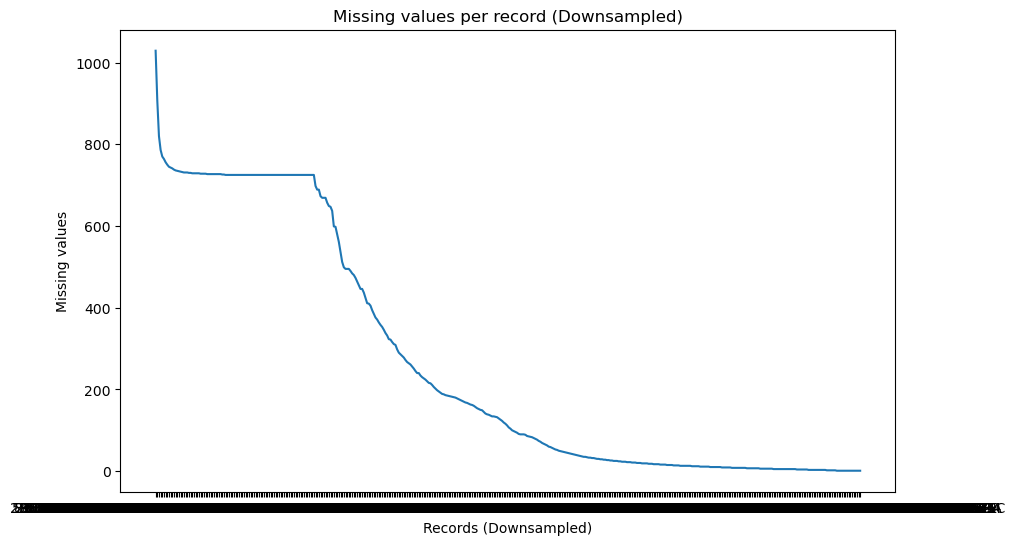

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Downsample to every 100th record
downsampled_nan_count = nan_count[::100]

plt.figure(figsize=(10, 6))
sns.lineplot(x=downsampled_nan_count.index, y=downsampled_nan_count.values)
plt.title('Missing values per record (Downsampled)')
plt.xlabel('Records (Downsampled)')
plt.ylabel('Missing values')
plt.show()

c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

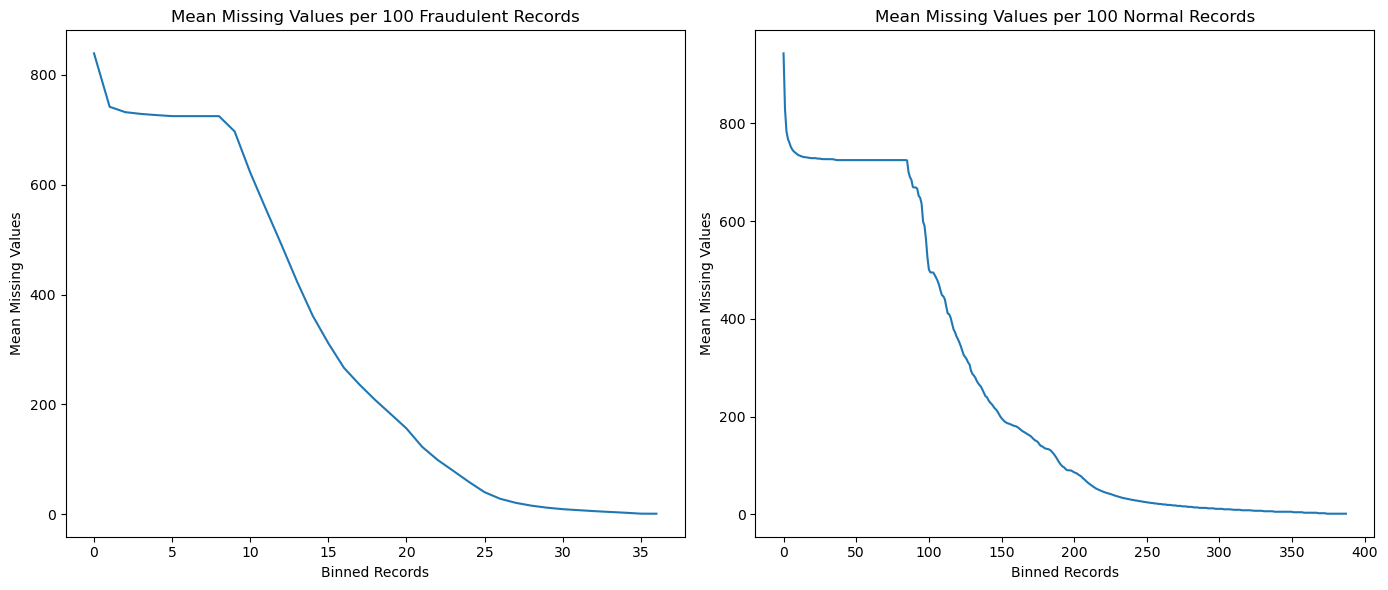

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Bin the data by every 1000 records and take the mean number of missing values
# Sum the number of missing values for each row
fraudulent_nan_count = df[label == 1].isna().sum(axis=1).sort_values(ascending=False)
normal_nan_count = df[label == 0].isna().sum(axis=1).sort_values(ascending=False)

fraudulent_binned_nan_count = fraudulent_nan_count.groupby(np.arange(len(fraudulent_nan_count)) // 100).mean()
normal_binned_nan_count = normal_nan_count.groupby(np.arange(len(normal_nan_count)) // 100).mean()

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Mean Missing Values per 1000 Records
sns.lineplot(x=fraudulent_binned_nan_count.index, y=fraudulent_binned_nan_count.values, ax=axes[0])
axes[0].set_title('Mean Missing Values per 100 Fraudulent Records')
axes[0].set_xlabel('Binned Records')
axes[0].set_ylabel('Mean Missing Values')

# Plot 2: Histogram of Missing Values
sns.lineplot(x=normal_binned_nan_count.index, y=normal_binned_nan_count.values, ax=axes[1])
axes[1].set_title('Mean Missing Values per 100 Normal Records')
axes[1].set_xlabel('Binned Records')
axes[1].set_ylabel('Mean Missing Values')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


We observe the same behaviour for both types of record

In [25]:
def plot_nulls_or_zeros(serie, max_value, title="title", xlabel="xlabel", ylabel="ylabel"):
    # Convert null counts to percentages
    percentage_series = (serie / max_value) * 100

    # Histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(percentage_series, bins=50, kde=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


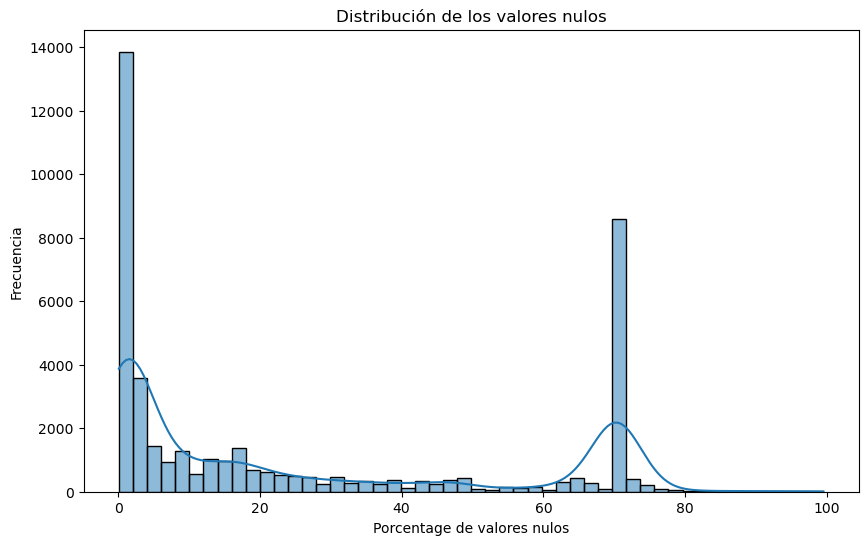

In [26]:
plot_nulls_or_zeros(nan_count, max_value=1034, title="Distribución de los valores nulos", xlabel="Porcentage de valores nulos", ylabel="Frecuencia")

We can observe two peaks in the data. The first one (left side) indicates there are a big number of records that has a low percentage (<3%) of null values. This decrease dramatically when the percentage is increase until around the 70% where there's the second peak. The latter shows there a big group of records where have 70% or more of missing data. As the paper says they use all data, we can perform two experiments: first, using all data, and then removing the records with more than, for example, 50%.

## Nulls by type of consumption

In [27]:
threshold = 0.71
threshold_days = int(threshold * df.shape[1])
print(f"Threshold: {threshold}. Days: {threshold_days}")

Threshold: 0.71. Days: 730


In [28]:
filtered_null_rows = nan_count[nan_count >= threshold_days]
filtered_null_f_rows = fraudulent_nan_count[fraudulent_nan_count >= threshold_days]
filtered_null_n_rows = normal_nan_count[normal_nan_count >= threshold_days]

print(f"Total of records with {int(threshold*100)}% or more missing values: {len(filtered_null_rows)}")
print(f"% of records with {int(threshold*100)}% or more missing values: {len(filtered_null_rows) / nan_count.shape[0] * 100:.2f}%")
print("")
print(f"Fradulent records with {int(threshold*100)}% or more missing values: {len(filtered_null_f_rows)}")
print(f"Normal records with {int(threshold*100)}% or more missing values: {len(filtered_null_n_rows)}")
print("")
print(f"% of fraudulent records with {int(threshold*100)}% or more missing values: {len(filtered_null_f_rows) / fraudulent_nan_count.shape[0] * 100:.2f}%")
print(f"% of normal records with {int(threshold*100)}% or more missing values: {len(filtered_null_n_rows) / normal_nan_count.shape[0] * 100:.2f}%")
print("------")

Total of records with 71% or more missing values: 2187
% of records with 71% or more missing values: 5.16%

Fradulent records with 71% or more missing values: 330
Normal records with 71% or more missing values: 1857

% of fraudulent records with 71% or more missing values: 9.13%
% of normal records with 71% or more missing values: 4.79%
------


The percentage of records that have 71% or more null values ​​in their records is 5.16% (2187 records) of the total dataset. 330 fraudulent records would have this amount of null values, which represents 9.13% of the total fraudulent records. On the other hand, 1857 normal records have this amount of null values, 4.79% of the total normal records.

Since it is a small amount, they are removed from the dataset.

There is a noticeable difference between 71% and 70%. The total number of records with 70% or more null values ​​is 9,521 records (22.47% of the total dataset): 925 fraudulent records and 8,596 normal records. These values ​​represent 25.29% of fraudulent records and 22.18% of normal records with that number of null values.

In [29]:
min = 0.1
max = 0.7

min_days = int(min * df.shape[1])
max_days = int(max * df.shape[1])

print(f"Minimum days: {min_days}")
print(f"Maximum days: {max_days}")

nan_count_filtered = nan_count[(nan_count >= min_days) & (nan_count <= max_days)]
fraudulent_nan_count_filtered = fraudulent_nan_count[(fraudulent_nan_count >= min_days) & (fraudulent_nan_count <= max_days)]
normal_nan_count_filtered = normal_nan_count[(normal_nan_count >= min_days) & (normal_nan_count <= max_days)]

Minimum days: 102
Maximum days: 720


In [30]:
print(f"Total of records between {int(min*100)}% and {int(max*100)}% missing values: {len(nan_count_filtered)}")
print(f"% of records between {int(min*100)}% and {int(max*100)}% missing values: {len(nan_count_filtered) / nan_count.shape[0] * 100:.2f}%")
print("")
print(f"Fradulent records between {int(min*100)}% and {int(max*100)}% missing values: {len(fraudulent_nan_count_filtered)}")
print(f"Normal records between {int(min*100)}% and {int(max*100)}% missing values: {len(normal_nan_count_filtered)}")
print("")
print(f"% of fraudulent records between {int(min*100)}% and {int(max*100)}% missing values: {len(fraudulent_nan_count_filtered) / fraudulent_nan_count.shape[0] * 100:.2f}%")
print(f"% of normal records between {int(min*100)}% and {int(max*100)}% missing values: {len(normal_nan_count_filtered) / normal_nan_count.shape[0] * 100:.2f}%")
print("------")

Total of records between 10% and 70% missing values: 11856
% of records between 10% and 70% missing values: 27.98%

Fradulent records between 10% and 70% missing values: 1313
Normal records between 10% and 70% missing values: 10543

% of fraudulent records between 10% and 70% missing values: 36.32%
% of normal records between 10% and 70% missing values: 27.20%
------


In [31]:
labels_with_idx = label.reset_index().drop('CONS_NO', axis=1)
labels_with_idx

FLAG
0         1
1         1
2         1
3         1
4         1
...     ...
42367     0
42368     0
42369     0
42370     0
42371     0

[42372 rows x 1 columns]

Train with data that is mostly complete or can be filled with techniques such as interpolation. Since there is data that has a large percentage of null values ​​but contains segments with information, you could use these segments to test them. Obviously, the algorithm should be able to process a smaller time window.

In [32]:
print(f"Threshold: {threshold} - threshold_days: {threshold_days}")
labels_filtered = label.loc[nan_count[nan_count >= threshold_days].index]

Threshold: 0.71 - threshold_days: 730


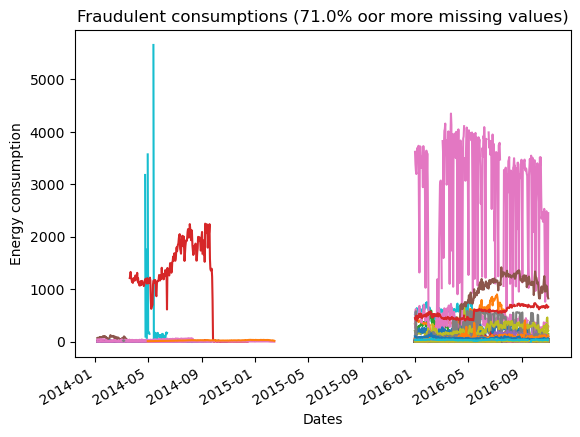

In [33]:
# df_filtered.iloc[:,-304:].T.plot(legend=False)
df_filtered = df.loc[labels_filtered[label == 1].index]

df_filtered.T.plot(legend=False)
plt.xlabel('Dates')
plt.ylabel('Energy consumption')
plt.title(f'Fraudulent consumptions ({threshold*100}% oor more missing values)')
plt.show()

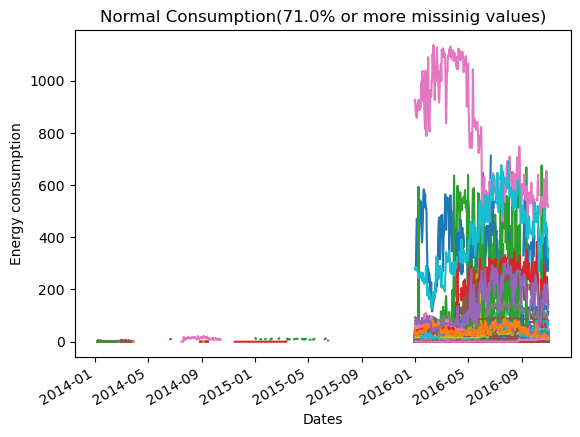

In [34]:
df_filtered = df.loc[labels_filtered[label == 0].index]
# df_filtered.iloc[:,-304:].T.plot(legend=False)
df_filtered.T.plot(legend=False)
plt.xlabel('Dates')
plt.ylabel('Energy consumption')
plt.title(f'Normal Consumption({threshold*100}% or more missinig values)')
plt.show()

Although we can remove the records with 71% or more nulls from the dataset, there's still some interesting information we can gather from the latest days, particularly from 2016-01

## How is the behaviour among the records with 10 and 70% of null values?

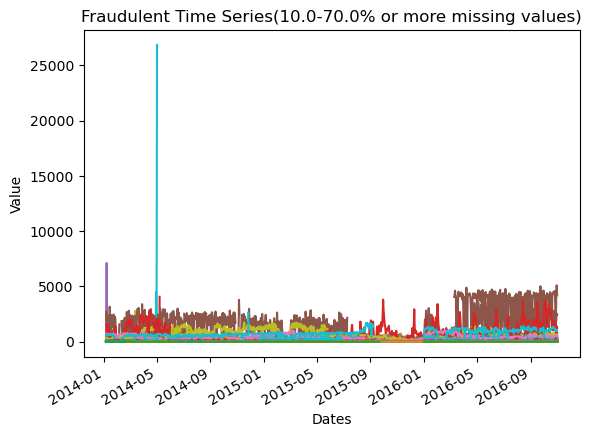

Total of fraudulent records plotted:  1313


In [35]:
# df_filtered.iloc[:,-304:].T.plot(legend=False)
# fraudulent_nan_count_filtered
# normal_nan_count_filtered
df_filtered = df.loc[fraudulent_nan_count_filtered.index]

df_filtered.T.plot(legend=False)
plt.xlabel('Dates')
plt.ylabel('Value')
plt.title(f'Fraudulent Time Series({min*100}-{max*100}% or more missing values)')
plt.show()
print("Total of fraudulent records plotted: ", len(df_filtered))

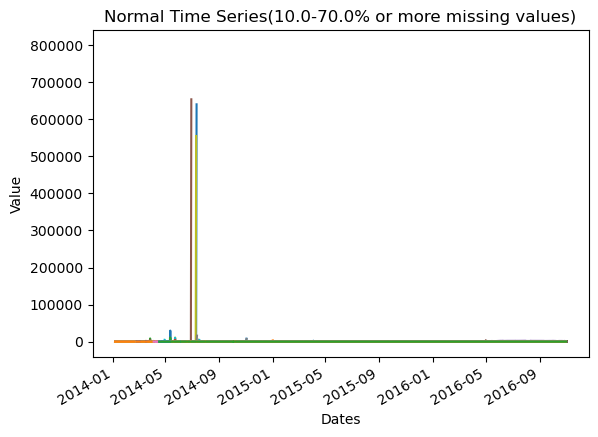

Total of normal records plotted:  10543


In [36]:
df_filtered = df.loc[normal_nan_count_filtered.index]
# df_filtered.iloc[:,-304:].T.plot(legend=False)
df_filtered.T.plot(legend=False)
plt.xlabel('Dates')
plt.ylabel('Value')
plt.title(f'Normal Time Series({min*100}-{max*100}% or more missing values)')
plt.show()
print("Total of normal records plotted: ", len(df_filtered))

## What about the zeros?

<Axes: title={'center': 'Distribution of Zero Values per User'}, ylabel='Frequency'>

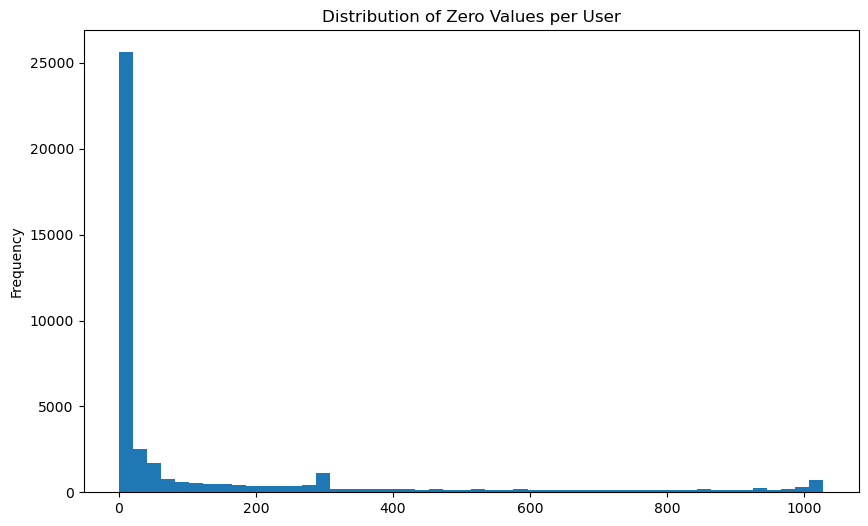

In [37]:
# Sum the number of missing values for each row
zero_count = df.eq(0).sum(axis=1).sort_values(ascending=False)
zero_count.plot(kind='hist', bins=50, figsize=(10, 6), title='Distribution of Zero Values per User')

In [38]:
threshold = 0.95
threshold_days = int(threshold * df.shape[1])
print(f"Threshold: {threshold}. Days: {threshold_days}")

zero_count_f = df[label==1].eq(0).sum(axis=1).sort_values(ascending=False)
zero_count_n = df[label==0].eq(0).sum(axis=1).sort_values(ascending=False)

rows_with_zeros = zero_count[zero_count >= threshold_days]
rows_with_zeros_f = zero_count_f[zero_count_f >= threshold_days]
rows_with_zeros_n = zero_count_n[zero_count_n >= threshold_days]

rows_with_zeros

Threshold: 0.95. Days: 977


CONS_NO
022B0FF14F341954155628CF8DB17FAC    1028
82882C11BEC81BCDFB6B538A0BA8D271    1028
B0D1816C3BF078D0911734366BC66CC7    1028
061AA5A92FD0CDF6A2741209CF3C06F5    1028
1A589B2D2F42EB08304000922910A97E    1028
                                    ... 
E581B1ED7CCBE462A9162D4703BDB17B     977
7BA85B6FD6985AA1376F8E2BC5B3FA56     977
EB7F9985BEF177B58514624671FD1359     977
C41529E80CF9AE0B9225ACB5B667E673     977
C007748CBF8E7FBBA62B69E9E71613FB     977
Length: 1168, dtype: int64

In [39]:
df_filtered_zeros = df.loc[rows_with_zeros.index]
df_filtered_zeros_f = df.loc[rows_with_zeros_f.index]
df_filtered_zeros_n = df.loc[rows_with_zeros_n.index]

df_filtered_zeros

2014-01-06  2014-01-07  2014-01-08  \
CONS_NO                                                                
022B0FF14F341954155628CF8DB17FAC        0.00         0.0        0.00   
82882C11BEC81BCDFB6B538A0BA8D271        0.00         0.0        0.00   
B0D1816C3BF078D0911734366BC66CC7        0.00         0.0        0.00   
061AA5A92FD0CDF6A2741209CF3C06F5        0.00         0.0        0.00   
1A589B2D2F42EB08304000922910A97E        0.00         0.0        0.00   
...                                      ...         ...         ...   
E581B1ED7CCBE462A9162D4703BDB17B         NaN         NaN         NaN   
7BA85B6FD6985AA1376F8E2BC5B3FA56        0.00         0.0        0.00   
EB7F9985BEF177B58514624671FD1359        0.00         0.0        0.00   
C41529E80CF9AE0B9225ACB5B667E673        8.49         7.6       10.42   
C007748CBF8E7FBBA62B69E9E71613FB        0.00         0.0        0.00   

                                  2014-01-09  2014-01-10  2014-01-11  \
CONS_NO                                                                
022B0FF14F341954155628CF8DB17FAC        0.00        0.00        0.00   
82882C11BEC81BCDFB6B538A0BA8D271        0.00        0.00        0.00   
B0D1816C3BF078D0911734366BC66CC7        0.00        0.00        0.00   
061AA5A92FD0CDF6A2741209CF3C06F5        0.00        0.00        0.00   
1A589B2D2F42EB08304000922910A97E        0.00        0.00        0.00   
...                                      ...         ...         ...   
E581B1ED7CCBE462A9162D4703BDB17B         NaN         NaN         NaN   
7BA85B6FD6985AA1376F8E2BC5B3FA56        0.00        0.00        0.00   
EB7F9985BEF177B58514624671FD1359        0.00        0.00        0.00   
C41529E80CF9AE0B9225ACB5B667E673       10.41       10.49       10.43   
C007748CBF8E7FBBA62B69E9E71613FB        0.00        0.00        0.09   

                                  2014-01-12  2014-01-13  2014-01-14  \
CONS_NO                                                                
022B0FF14F341954155628CF8DB17FAC         0.0        0.00        0.00   
82882C11BEC81BCDFB6B538A0BA8D271         0.0        0.00        0.00   
B0D1816C3BF078D0911734366BC66CC7         0.0        0.00        0.00   
061AA5A92FD0CDF6A2741209CF3C06F5         0.0        0.00        0.00   
1A589B2D2F42EB08304000922910A97E         0.0        0.00        0.00   
...                                      ...         ...         ...   
E581B1ED7CCBE462A9162D4703BDB17B         NaN         NaN         NaN   
7BA85B6FD6985AA1376F8E2BC5B3FA56         0.0        0.00        0.00   
EB7F9985BEF177B58514624671FD1359         0.0        0.00        0.00   
C41529E80CF9AE0B9225ACB5B667E673         0.0       10.37        7.37   
C007748CBF8E7FBBA62B69E9E71613FB         0.0        0.00        0.00   

                                  2014-01-15  ...  2016-10-22  2016-10-23  \
CONS_NO                                       ...                           
022B0FF14F341954155628CF8DB17FAC        0.00  ...         0.0         0.0   
82882C11BEC81BCDFB6B538A0BA8D271        0.00  ...         0.0         0.0   
B0D1816C3BF078D0911734366BC66CC7        0.00  ...         0.0         0.0   
061AA5A92FD0CDF6A2741209CF3C06F5        0.00  ...         0.0         0.0   
1A589B2D2F42EB08304000922910A97E        0.00  ...         0.0         0.0   
...                                      ...  ...         ...         ...   
E581B1ED7CCBE462A9162D4703BDB17B         NaN  ...         0.0         0.0   
7BA85B6FD6985AA1376F8E2BC5B3FA56        0.00  ...         0.0         0.0   
EB7F9985BEF177B58514624671FD1359        0.00  ...         0.0         0.0   
C41529E80CF9AE0B9225ACB5B667E673        3.99  ...         0.0         0.0   
C007748CBF8E7FBBA62B69E9E71613FB        0.00  ...         0.0         0.0   

                                  2016-10-24  2016-10-25  2016-10-26  \
CONS_NO                                                                
022B0FF14F341954155628CF8DB17FAC         0.0         0.0         0.0   
82882

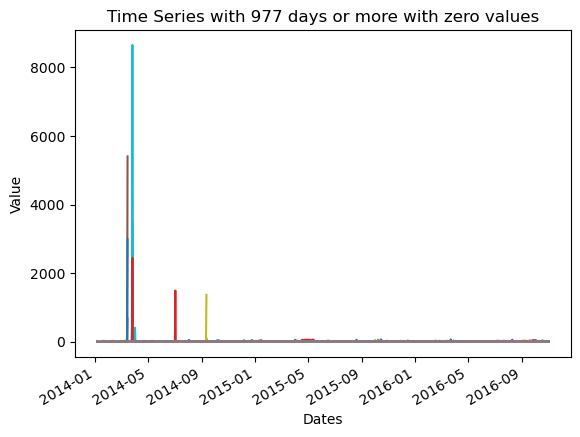

Total of normal records plotted:  1168


In [40]:
df_filtered_zeros.T.plot(legend=False)
plt.xlabel('Dates')
plt.ylabel('Value')
plt.title(f'Time Series with {threshold_days} days or more with zero values')
plt.show()
print("Total of normal records plotted: ", len(df_filtered_zeros))

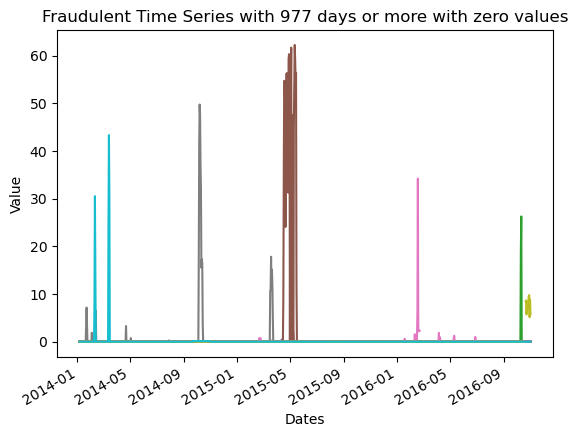

Total of records plotted:  10


In [41]:
df_filtered_zeros_f.T.plot(legend=False)
plt.xlabel('Dates')
plt.ylabel('Value')
plt.title(f'Fraudulent Time Series with {threshold_days} days or more with zero values')
plt.show()
print("Total of records plotted: ", len(df_filtered_zeros_f))

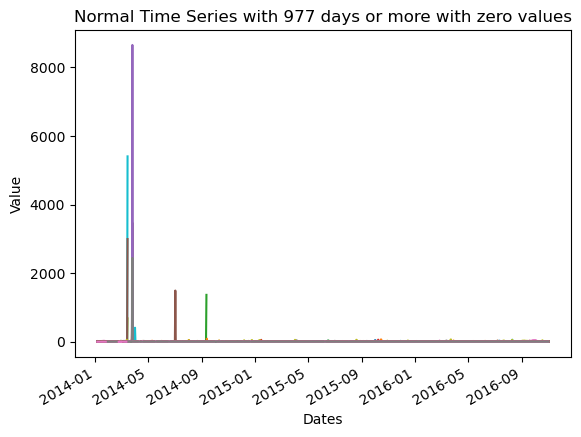

Total of records plotted:  1158


In [42]:
df_filtered_zeros_n.T.plot(legend=False)
plt.xlabel('Dates')
plt.ylabel('Value')
plt.title(f'Normal Time Series with {threshold_days} days or more with zero values')
plt.show()
print("Total of records plotted: ", len(df_filtered_zeros_n))

There are 1610 with a 90% of their values at zero. 18 belongs to the fraudulent records while 1592 to the normal ones. We can observe in both charts that there are some peaks, notoriously in the fraudulent records. It could because the nature of the data.

## Null values by date

In [43]:
nulls_by_date = df.isnull().sum()
nulls_by_date_fraud = df.loc[label[label == 1].index].isnull().sum()
nulls_by_date_normal = df.loc[label[label == 0].index].isnull().sum()

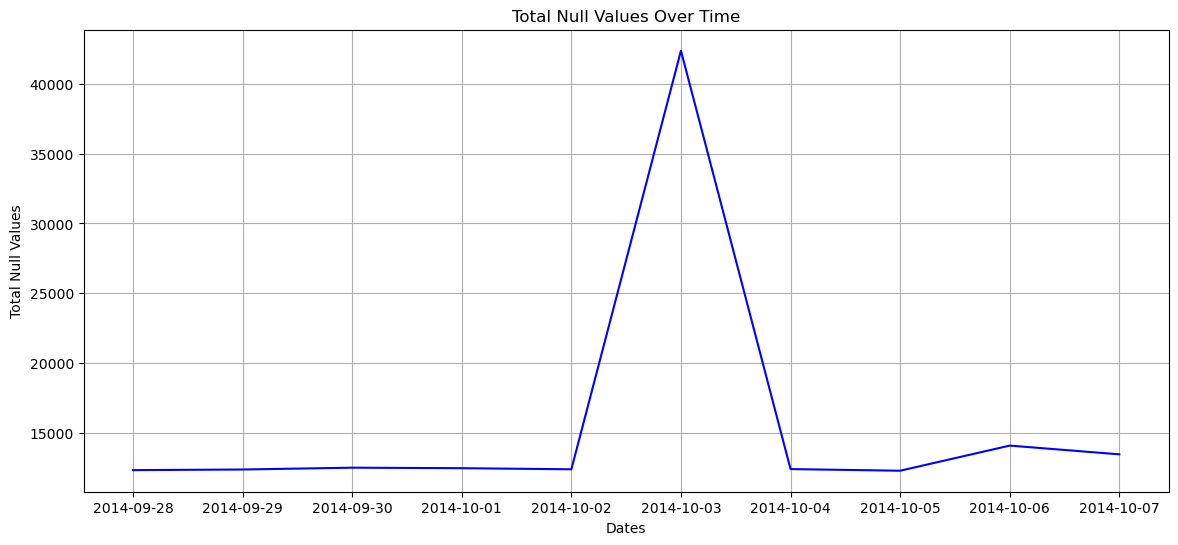

In [44]:
# Plotting the Series
plt.figure(figsize=(14, 6))
plt.plot(nulls_by_date.index[265:275], nulls_by_date.values[265:275], color='blue', linestyle='-')
plt.xlabel('Dates')
plt.ylabel('Total Null Values')
plt.title('Total Null Values Over Time')
plt.grid(True)

# Show the plot
plt.show()

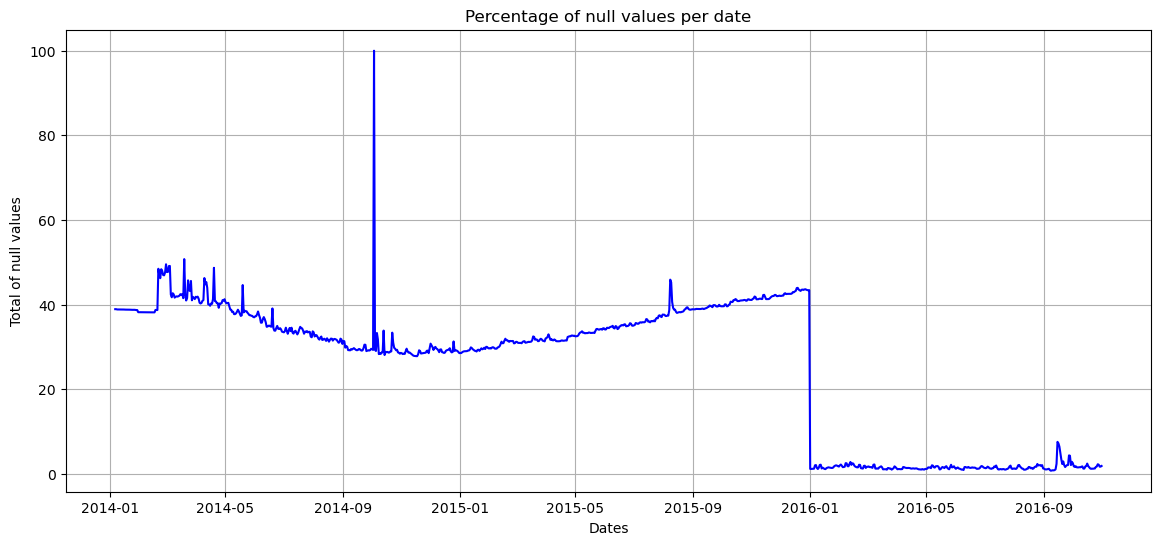

In [45]:
nulls_by_date_percentage = (nulls_by_date / df.shape[0]) * 100

# Plotting the Series
plt.figure(figsize=(14, 6))
plt.plot(nulls_by_date_percentage.index, nulls_by_date_percentage.values, color='blue', linestyle='-')
plt.xlabel('Dates')
plt.ylabel('Total of null values')
plt.title('Percentage of null values per date')
plt.grid(True)

# Show the plot
plt.show()

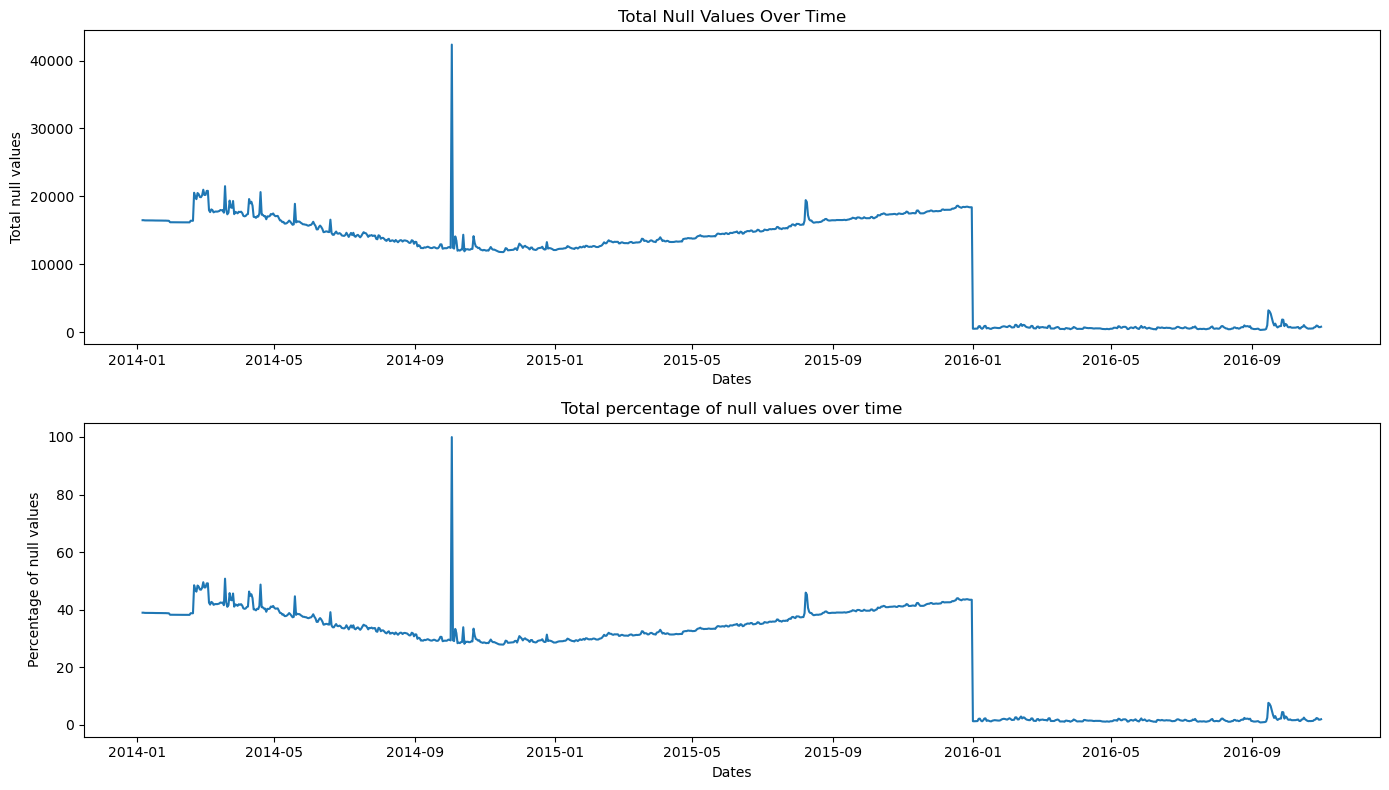

In [46]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14,8))

axes[0].plot(nulls_by_date.index, nulls_by_date.values)
axes[0].set_title('Total Null Values Over Time')
axes[0].set_xlabel('Dates')
axes[0].set_ylabel('Total null values')

axes[1].plot(nulls_by_date_percentage.index, nulls_by_date_percentage.values)
axes[1].set_title('Total percentage of null values over time')
axes[1].set_xlabel('Dates')
axes[1].set_ylabel('Percentage of null values')

plt.tight_layout()

plt.show()

## Nulls from 2016-01

In [47]:
df.iloc[:,-302:]

2016-01-03  2016-01-04  2016-01-05  \
CONS_NO                                                                
0387DD8A07E07FDA6271170F86AD9151        9.73        5.10        5.34   
01D6177B5D4FFE0CABA9EF17DAFC2B84        0.00        0.00        0.00   
4B75AC4F2D8434CFF62DB64D0BB43103       13.86       12.91       13.11   
B32AC8CC6D5D805AC053557AB05F5343       22.63       17.00       19.02   
EDFC78B07BA2908B3395C4EB2304665E        5.43        4.32        4.46   
...                                      ...         ...         ...   
F1472871E1AFF49D4289564B6377D76C        4.81        3.38        4.10   
F3C8BBCD2DC26C1E0249DEEF6A4256B7         NaN        3.95        3.11   
A9A0FE83467A680FBFB0DBFC910DF227        0.99        0.70        0.70   
D9A6ADA018FA46A55D5438370456AA45       10.94       13.91       14.02   
F3406636BAD1E6E0826E8EDDC9A1BF00        7.18        6.79        5.97   

                                  2016-01-06  2016-01-07  2016-01-08  \
CONS_NO                                                                
0387DD8A07E07FDA6271170F86AD9151        4.36        4.76       10.32   
01D6177B5D4FFE0CABA9EF17DAFC2B84        0.00        0.00        0.00   
4B75AC4F2D8434CFF62DB64D0BB43103       12.31       13.64       13.47   
B32AC8CC6D5D805AC053557AB05F5343       27.69       18.62       23.78   
EDFC78B07BA2908B3395C4EB2304665E        4.94        4.14        4.46   
...                                      ...         ...         ...   
F1472871E1AFF49D4289564B6377D76C        4.50        3.09        4.44   
F3C8BBCD2DC26C1E0249DEEF6A4256B7        2.85        2.88        3.41   
A9A0FE83467A680FBFB0DBFC910DF227        0.80        1.21        0.92   
D9A6ADA018FA46A55D5438370456AA45       13.94       13.10       14.08   
F3406636BAD1E6E0826E8EDDC9A1BF00        6.21        6.60        5.24   

                                  2016-01-09  2016-01-10  2016-01-11  \
CONS_NO                                                                
0387DD8A07E07FDA6271170F86AD9151        7.03       12.65        6.72   
01D6177B5D4FFE0CABA9EF17DAFC2B84        0.00        0.00        0.00   
4B75AC4F2D8434CFF62DB64D0BB43103       13.56       15.18       11.65   
B32AC8CC6D5D805AC053557AB05F5343       20.10       25.90       24.50   
EDFC78B07BA2908B3395C4EB2304665E        5.88        5.18        4.52   
...                                      ...         ...         ...   
F1472871E1AFF49D4289564B6377D76C        4.71        4.87        3.73   
F3C8BBCD2DC26C1E0249DEEF6A4256B7        5.10        3.72        3.29   
A9A0FE83467A680FBFB0DBFC910DF227        0.88        1.13        1.35   
D9A6ADA018FA46A55D5438370456AA45       14.78       11.76        8.87   
F3406636BAD1E6E0826E8EDDC9A1BF00        4.27        5.57        4.59   

                                  2016-01-12  ...  2016-10-22  2016-10-23  \
CONS_NO                                       ...                           
0387DD8A07E07FDA6271170F86AD9151        6.69  ...        7.18        8.07   
01D6177B5D4FFE0CABA9EF17DAFC2B84        0.00  ...        0.00        0.00   
4B75AC4F2D8434CFF62DB64D0BB43103       12.53  ...       10.95       17.95   
B32AC8CC6D5D805AC053557AB05F5343       30.66  ...       12.81       15.12   
EDFC78B07BA2908B3395C4EB2304665E        4.26  ...       14.21       10.22   
...                                      ...  ...         ...         ...   
F1472871E1AFF49D4289564B6377D76C        3.96  ...        3.27        3.10   
F3C8BBCD2DC26C1E0249DEEF6A4256B7        4.38  ...        3.84        6.62   
A9A0FE83467A680FBFB0DBFC910DF227        0.92  ...        0.99        0.61   
D9A6ADA018FA46A55D5438370456AA45        8.63  ...       15.64       16.48   
F3406636BAD1E6E0826E8EDDC9A1BF00        4.37  ...       10.56       17.14   

                                  2016-10-24  2016-10-25  2016-10-26  \
CONS_NO                                                                
0387DD8A07E07FDA6271170F86AD9151        8.09        9.53        5.48   
01D61

<Axes: xlabel='CONS_NO'>

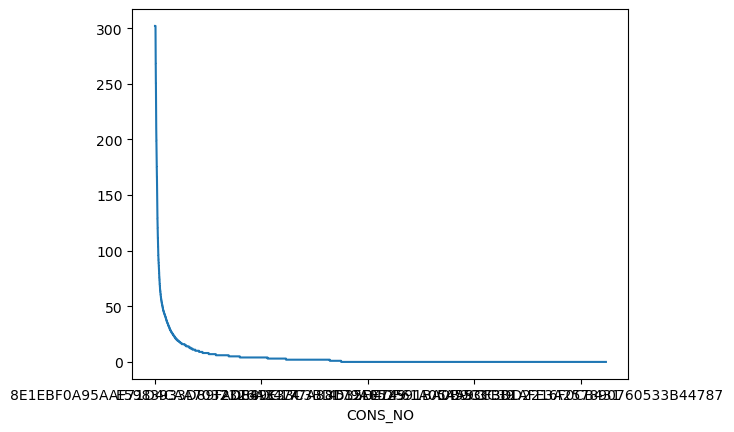

In [48]:
nan_count_per_record = df.iloc[:,-302:].isnull().sum(axis=1).sort_values(ascending=False)
nan_count_per_record.plot()

In [49]:
threshold = 0.2
threshold_days = int(threshold* df.iloc[:,-302:].shape[1])
print(f"Threshold: {threshold}. Days: {threshold_days}")
nan_count_per_record[nan_count_per_record >= threshold_days]

Threshold: 0.2. Days: 60


CONS_NO
8E1EBF0A95AAF71D4CAA7032326A3474    302
004B9D81ED2FA83D2B3EE36D1570A498    302
88DBDB3C7E1667932491E80E45CF5F4B    302
B44EDA8B189181D4E9F8220CE093DB47    302
5A98AF2B26182DCE446E111AE8AE0EDE    302
                                   ... 
23B170B23F5184E3DFA2987DB167500E     60
E0FCCDAF9F8C7EF4F2724A6DAC7E5725     60
8A313FEDD9B0371D97B0485348084178     60
EBD30E823423BF7404529DF691531EDE     60
BE13FD5FD4DDE6083F4E8B9A3278F910     60
Length: 542, dtype: int64

## Removing nulls

I reduce the 5.16% of the total of records of this dataset

In [50]:
def remove_nulls(df, labels, threshold=0.71):
    threshold_days = int(threshold * df.shape[1])
    nan_count = df.isna().sum(axis=1).sort_values(ascending=False)
    filtered_null_rows = nan_count[nan_count >= threshold_days]
    df_red = df.drop(filtered_null_rows.index, axis=0)
    label_red = labels.drop(filtered_null_rows.index, axis=0)
    return df_red, label_red

In [51]:
df_red, label_red = remove_nulls(df, label, 0.71)
df_red

2014-01-06  2014-01-07  2014-01-08  \
CONS_NO                                                                
0387DD8A07E07FDA6271170F86AD9151         NaN         NaN         NaN   
01D6177B5D4FFE0CABA9EF17DAFC2B84         NaN         NaN         NaN   
B32AC8CC6D5D805AC053557AB05F5343         NaN         NaN         NaN   
EDFC78B07BA2908B3395C4EB2304665E        5.35        4.73        3.68   
34C1954AA3703C4F8BD8EAEA7C4B7B83        0.20        0.14        0.34   
...                                      ...         ...         ...   
F1472871E1AFF49D4289564B6377D76C         NaN         NaN         NaN   
F3C8BBCD2DC26C1E0249DEEF6A4256B7        5.81        3.07        4.04   
A9A0FE83467A680FBFB0DBFC910DF227        1.38        0.89        0.70   
D9A6ADA018FA46A55D5438370456AA45       17.48       17.86       23.99   
F3406636BAD1E6E0826E8EDDC9A1BF00         NaN         NaN         NaN   

                                  2014-01-09  2014-01-10  2014-01-11  \
CONS_NO                                                                
0387DD8A07E07FDA6271170F86AD9151         NaN         NaN         NaN   
01D6177B5D4FFE0CABA9EF17DAFC2B84         NaN         NaN         NaN   
B32AC8CC6D5D805AC053557AB05F5343         NaN         NaN         NaN   
EDFC78B07BA2908B3395C4EB2304665E        3.53        3.42        3.81   
34C1954AA3703C4F8BD8EAEA7C4B7B83        0.23        0.53        0.45   
...                                      ...         ...         ...   
F1472871E1AFF49D4289564B6377D76C         NaN         NaN         NaN   
F3C8BBCD2DC26C1E0249DEEF6A4256B7        5.68        4.39        3.95   
A9A0FE83467A680FBFB0DBFC910DF227        1.23        0.84        1.61   
D9A6ADA018FA46A55D5438370456AA45       12.34       13.84       13.50   
F3406636BAD1E6E0826E8EDDC9A1BF00         NaN         NaN         NaN   

                                  2014-01-12  2014-01-13  2014-01-14  \
CONS_NO                                                                
0387DD8A07E07FDA6271170F86AD9151         NaN         NaN         NaN   
01D6177B5D4FFE0CABA9EF17DAFC2B84         NaN         NaN         NaN   
B32AC8CC6D5D805AC053557AB05F5343         NaN         NaN         NaN   
EDFC78B07BA2908B3395C4EB2304665E        4.58        3.56        4.25   
34C1954AA3703C4F8BD8EAEA7C4B7B83        0.51        1.32        0.71   
...                                      ...         ...         ...   
F1472871E1AFF49D4289564B6377D76C         NaN         NaN         NaN   
F3C8BBCD2DC26C1E0249DEEF6A4256B7        0.00        0.00        0.00   
A9A0FE83467A680FBFB0DBFC910DF227        0.90        0.60        0.82   
D9A6ADA018FA46A55D5438370456AA45       14.60       14.46       12.34   
F3406636BAD1E6E0826E8EDDC9A1BF00         NaN         NaN         NaN   

                                  2014-01-15  ...  2016-10-22  2016-10-23  \
CONS_NO                                       ...                           
0387DD8A07E07FDA6271170F86AD9151         NaN  ...        7.18        8.07   
01D6177B5D4FFE0CABA9EF17DAFC2B84         NaN  ...        0.00        0.00   
B32AC8CC6D5D805AC053557AB05F5343         NaN  ...       12.81       15.12   
EDFC78B07BA2908B3395C4EB2304665E        3.86  ...       14.21       10.22   
34C1954AA3703C4F8BD8EAEA7C4B7B83        0.12  ...        1.85        3.36   
...                                      ...  ...         ...         ...   
F1472871E1AFF49D4289564B6377D76C         NaN  ...        3.27        3.10   
F3C8BBCD2DC26C1E0249DEEF6A4256B7        0.00  ...        3.84        6.62   
A9A0FE83467A680FBFB0DBFC910DF227        0.89  ...        0.99        0.61   
D9A6ADA018FA46A55D5438370456AA45       15.37  ...       15.64       16.48   
F3406636BAD1E6E0826E8EDDC9A1BF00         NaN  ...       10.56       17.14   

                                  2016-10-24  2016-10-25  2016-10-26  \
CONS_NO                                                                
0387DD8A07E07FDA6271170F86AD9151        8.09        9.53        5.48   
01D61

In [52]:
#Before
label.value_counts()

FLAG
0    38757
1     3615
Name: count, dtype: int64

In [53]:
#After
label_red.value_counts()

FLAG
0    36900
1     3285
Name: count, dtype: int64

In [54]:
labels_with_idx = label_red.reset_index().drop('CONS_NO', axis=1)

# Outliers

In [55]:
# 3δ principle
def process_outliers(row):
    mean = row.mean()
    std = row.std()
    threshold = mean + (3 * std)
    return pd.Series(np.where(row > threshold, threshold, row))

In [56]:
df_red_processed = df_red.apply(process_outliers, axis=1)
df_red_processed

0      1      2      3      4      5     \
CONS_NO                                                                      
0387DD8A07E07FDA6271170F86AD9151    NaN    NaN    NaN    NaN    NaN    NaN   
01D6177B5D4FFE0CABA9EF17DAFC2B84    NaN    NaN    NaN    NaN    NaN    NaN   
B32AC8CC6D5D805AC053557AB05F5343    NaN    NaN    NaN    NaN    NaN    NaN   
EDFC78B07BA2908B3395C4EB2304665E   5.35   4.73   3.68   3.53   3.42   3.81   
34C1954AA3703C4F8BD8EAEA7C4B7B83   0.20   0.14   0.34   0.23   0.53   0.45   
...                                 ...    ...    ...    ...    ...    ...   
F1472871E1AFF49D4289564B6377D76C    NaN    NaN    NaN    NaN    NaN    NaN   
F3C8BBCD2DC26C1E0249DEEF6A4256B7   5.81   3.07   4.04   5.68   4.39   3.95   
A9A0FE83467A680FBFB0DBFC910DF227   1.38   0.89   0.70   1.23   0.84   1.61   
D9A6ADA018FA46A55D5438370456AA45  17.48  17.86  23.99  12.34  13.84  13.50   
F3406636BAD1E6E0826E8EDDC9A1BF00    NaN    NaN    NaN    NaN    NaN    NaN   

                                   6      7      8      9     ...   1019  \
CONS_NO                                                       ...          
0387DD8A07E07FDA6271170F86AD9151    NaN    NaN    NaN    NaN  ...   7.18   
01D6177B5D4FFE0CABA9EF17DAFC2B84    NaN    NaN    NaN    NaN  ...   0.00   
B32AC8CC6D5D805AC053557AB05F5343    NaN    NaN    NaN    NaN  ...  12.81   
EDFC78B07BA2908B3395C4EB2304665E   4.58   3.56   4.25   3.86  ...  14.21   
34C1954AA3703C4F8BD8EAEA7C4B7B83   0.51   1.32   0.71   0.12  ...   1.85   
...                                 ...    ...    ...    ...  ...    ...   
F1472871E1AFF49D4289564B6377D76C    NaN    NaN    NaN    NaN  ...   3.27   
F3C8BBCD2DC26C1E0249DEEF6A4256B7   0.00   0.00   0.00   0.00  ...   3.84   
A9A0FE83467A680FBFB0DBFC910DF227   0.90   0.60   0.82   0.89  ...   0.99   
D9A6ADA018FA46A55D5438370456AA45  14.60  14.46  12.34  15.37  ...  15.64   
F3406636BAD1E6E0826E8EDDC9A1BF00    NaN    NaN    NaN    NaN  ...  10.56   

                                   1020   1021   1022   1023   1024   1025  \
CONS_NO                                                                      
0387DD8A07E07FDA6271170F86AD9151   8.07   8.09   9.53   5.48   8.75   9.30   
01D6177B5D4FFE0CABA9EF17DAFC2B84   0.00   0.00   0.00   0.00   0.00   0.00   
B32AC8CC6D5D805AC053557AB05F5343  15.12  17.26  14.91  19.59  20.79  17.95   
EDFC78B07BA2908B3395C4EB2304665E  10.22   8.47   6.11   6.10   6.73   7.52   
34C1954AA3703C4F8BD8EAEA7C4B7B83   3.36   1.45   2.12   1.55   1.18   1.13   
...                                 ...    ...    ...    ...    ...    ...   
F1472871E1AFF49D4289564B6377D76C   3.10   2.75   3.01   2.99   2.83   2.54   
F3C8BBCD2DC26C1E0249DEEF6A4256B7   6.62   3.12   5.16   3.62   4.64   3.71   
A9A0FE83467A680FBFB0DBFC910DF227   0.61   0.65   0.55   0.49   0.51   0.79   
D9A6ADA018FA46A55D5438370456AA45  16.48  13.04  10.39  12.00  11.15  12.22   
F3406636BAD1E6E0826E8EDDC9A1BF00  17.14   8.35   8.68   6.39   7.96   8.13   

                                   1026   1027   1028  
CONS_NO                                                
0387DD8A07E07FDA6271170F86AD9151   7.54   9.16   6.74  
01D6177B5D4FFE0CABA9EF17DAFC2B84   0.00   0.00   0.00  
B32AC8CC6D5D805AC053557AB05F5343  19.26  14.46  11.72  
EDFC78B07BA2908B3395C4EB2304665E  10.89   9.86   8.72  
34C1954AA3703C4F8BD8EAEA7C4B7B83   1.34   1.26   1.40  
...                                 ...    ...    ...  
F1472871E1AFF49D4289564B6377D76C   3.40   3.59   2.54  
F3C8BBCD2DC26C1E0249DEEF6A4256B7   6.22   6.05   4.77  
A9A0FE83467A680FBFB0DBFC910DF227   0.66   0.39   0.65  
D9A6ADA018FA46A55D5438370456AA45  13.16  13.33  10.39  
F3406636BAD1E6E0826E8EDDC9A1BF00  11.50   7.16   5.25  

[40185 rows x 1029 columns]

# Interpolation

In [57]:
def optimized_interpolation(row):
    
    values = row.values
    result = values.copy()

    # Create a mask for NaN values
    nan_mask = np.isnan(values)

    if nan_mask[0]:
        result[0] = 0
        
    if nan_mask[-1]:
        result[-1] = 0

    # Find valid interpolation points (excluding first and last columns)
    if len(values) > 2:  # Ensure there are at least three columns to interpolate
        valid_interp = nan_mask & np.roll(~nan_mask, 1) & np.roll(~nan_mask, -1)
        valid_interp[0] = False  # Exclude first column
        valid_interp[-1] = False  # Exclude last column
        
        # Perform interpolation where valid
        result[valid_interp] = (np.roll(values, 1)[valid_interp] + np.roll(values, -1)[valid_interp]) / 2
    
    # Set remaining NaNs to 0
    result[nan_mask & ~valid_interp] = 0
    
    return pd.Series(result, index=row.index)

In [58]:
# df_red_processed = df_red_processed.apply(optimized_interpolation, axis=1)
# df_red_processed.head()

df_red_processed = df_red.apply(optimized_interpolation, axis=1)
df_red_processed.head()

2014-01-06  2014-01-07  2014-01-08  \
CONS_NO                                                                
0387DD8A07E07FDA6271170F86AD9151        0.00        0.00        0.00   
01D6177B5D4FFE0CABA9EF17DAFC2B84        0.00        0.00        0.00   
B32AC8CC6D5D805AC053557AB05F5343        0.00        0.00        0.00   
EDFC78B07BA2908B3395C4EB2304665E        5.35        4.73        3.68   
34C1954AA3703C4F8BD8EAEA7C4B7B83        0.20        0.14        0.34   

                                  2014-01-09  2014-01-10  2014-01-11  \
CONS_NO                                                                
0387DD8A07E07FDA6271170F86AD9151        0.00        0.00        0.00   
01D6177B5D4FFE0CABA9EF17DAFC2B84        0.00        0.00        0.00   
B32AC8CC6D5D805AC053557AB05F5343        0.00        0.00        0.00   
EDFC78B07BA2908B3395C4EB2304665E        3.53        3.42        3.81   
34C1954AA3703C4F8BD8EAEA7C4B7B83        0.23        0.53        0.45   

                                  2014-01-12  2014-01-13  2014-01-14  \
CONS_NO                                                                
0387DD8A07E07FDA6271170F86AD9151        0.00        0.00        0.00   
01D6177B5D4FFE0CABA9EF17DAFC2B84        0.00        0.00        0.00   
B32AC8CC6D5D805AC053557AB05F5343        0.00        0.00        0.00   
EDFC78B07BA2908B3395C4EB2304665E        4.58        3.56        4.25   
34C1954AA3703C4F8BD8EAEA7C4B7B83        0.51        1.32        0.71   

                                  2014-01-15  ...  2016-10-22  2016-10-23  \
CONS_NO                                       ...                           
0387DD8A07E07FDA6271170F86AD9151        0.00  ...        7.18        8.07   
01D6177B5D4FFE0CABA9EF17DAFC2B84        0.00  ...        0.00        0.00   
B32AC8CC6D5D805AC053557AB05F5343        0.00  ...       12.81       15.12   
EDFC78B07BA2908B3395C4EB2304665E        3.86  ...       14.21       10.22   
34C1954AA3703C4F8BD8EAEA7C4B7B83        0.12  ...        1.85        3.36   

                                  2016-10-24  2016-10-25  2016-10-26  \
CONS_NO                                                                
0387DD8A07E07FDA6271170F86AD9151        8.09        9.53        5.48   
01D6177B5D4FFE0CABA9EF17DAFC2B84        0.00        0.00        0.00   
B32AC8CC6D5D805AC053557AB05F5343       17.26       14.91       19.59   
EDFC78B07BA2908B3395C4EB2304665E        8.47        6.11        6.10   
34C1954AA3703C4F8BD8EAEA7C4B7B83        1.45        2.12        1.55   

                                  2016-10-27  2016-10-28  2016-10-29  \
CONS_NO                                                                
0387DD8A07E07FDA6271170F86AD9151        8.75        9.30        7.54   
01D6177B5D4FFE0CABA9EF17DAFC2B84        0.00        0.00        0.00   
B32AC8CC6D5D805AC053557AB05F5343       20.79       17.95       19.26   
EDFC78B07BA2908B3395C4EB2304665E        6.73        7.52       10.89   
34C1954AA3703C4F8BD8EAEA7C4B7B83        1.18        1.13        1.34   

                                  2016-10-30  2016-10-31  
CONS_NO                                                   
0387DD8A07E07FDA6271170F86AD9151        9.16        6.74  
01D6177B5D4FFE0CABA9EF17DAFC2B84        0.00        0.00  
B32AC8CC6D5D805AC053557AB05F5343       14.46       11.72  
EDFC78B07BA2908B3395C4EB2304665E        9.86        8.72  
34C1954AA3703C4F8BD8EAEA7C4B7B83        1.26        1.40  

[5 rows x 1029 columns]

# Normalization

In [59]:
def minmax_normalization(row):
    min_val = row.min()
    max_val = row.max()
    
    # Calculate the range
    range_val = max_val - min_val
    
    # Check for division by zero and apply normalization
    if range_val != 0:
        return (row - min_val) / range_val
    else:
        return pd.Series(0, index=row.index)

In [60]:
df_red_processed = df_red_processed.apply(minmax_normalization, axis=1)

# Summary data processing

In [61]:
def process_dataset(df, binary_mask=False):
    df_processed = df.apply(process_outliers, axis=1)
    if(binary_mask):
        df_processed = df_processed.applymap(lambda x: 1 if x > 0 else 0)
    df_processed = df_processed.apply(optimized_interpolation, axis=1)
    df_processed = df_processed.apply(minmax_normalization, axis=1)
    return df_processed

In [62]:
df_red_processed = process_dataset(df_red)
df_red_processed.columns = df_red.columns
df_red_processed

2014-01-06  2014-01-07  2014-01-08  \
CONS_NO                                                                
0387DD8A07E07FDA6271170F86AD9151    0.000000    0.000000    0.000000   
01D6177B5D4FFE0CABA9EF17DAFC2B84    0.000000    0.000000    0.000000   
B32AC8CC6D5D805AC053557AB05F5343    0.000000    0.000000    0.000000   
EDFC78B07BA2908B3395C4EB2304665E    0.204839    0.181100    0.140898   
34C1954AA3703C4F8BD8EAEA7C4B7B83    0.027877    0.019514    0.047391   
...                                      ...         ...         ...   
F1472871E1AFF49D4289564B6377D76C    0.000000    0.000000    0.000000   
F3C8BBCD2DC26C1E0249DEEF6A4256B7    0.604810    0.319581    0.420556   
A9A0FE83467A680FBFB0DBFC910DF227    0.197196    0.127177    0.100027   
D9A6ADA018FA46A55D5438370456AA45    0.463416    0.473491    0.636004   
F3406636BAD1E6E0826E8EDDC9A1BF00    0.000000    0.000000    0.000000   

                                  2014-01-09  2014-01-10  2014-01-11  \
CONS_NO                                                                
0387DD8A07E07FDA6271170F86AD9151    0.000000    0.000000    0.000000   
01D6177B5D4FFE0CABA9EF17DAFC2B84    0.000000    0.000000    0.000000   
B32AC8CC6D5D805AC053557AB05F5343    0.000000    0.000000    0.000000   
EDFC78B07BA2908B3395C4EB2304665E    0.135155    0.130944    0.145876   
34C1954AA3703C4F8BD8EAEA7C4B7B83    0.032059    0.073875    0.062724   
...                                      ...         ...         ...   
F1472871E1AFF49D4289564B6377D76C    0.000000    0.000000    0.000000   
F3C8BBCD2DC26C1E0249DEEF6A4256B7    0.591277    0.456991    0.411187   
A9A0FE83467A680FBFB0DBFC910DF227    0.175762    0.120033    0.230062   
D9A6ADA018FA46A55D5438370456AA45    0.327149    0.366915    0.357902   
F3406636BAD1E6E0826E8EDDC9A1BF00    0.000000    0.000000    0.000000   

                                  2014-01-12  2014-01-13  2014-01-14  \
CONS_NO                                                                
0387DD8A07E07FDA6271170F86AD9151    0.000000    0.000000    0.000000   
01D6177B5D4FFE0CABA9EF17DAFC2B84    0.000000    0.000000    0.000000   
B32AC8CC6D5D805AC053557AB05F5343    0.000000    0.000000    0.000000   
EDFC78B07BA2908B3395C4EB2304665E    0.175357    0.136304    0.162722   
34C1954AA3703C4F8BD8EAEA7C4B7B83    0.071087    0.183990    0.098964   
...                                      ...         ...         ...   
F1472871E1AFF49D4289564B6377D76C    0.000000    0.000000    0.000000   
F3C8BBCD2DC26C1E0249DEEF6A4256B7    0.000000    0.000000    0.000000   
A9A0FE83467A680FBFB0DBFC910DF227    0.128606    0.085738    0.117175   
D9A6ADA018FA46A55D5438370456AA45    0.387064    0.383352    0.327149   
F3406636BAD1E6E0826E8EDDC9A1BF00    0.000000    0.000000    0.000000   

                                  2014-01-15  ...  2016-10-22  2016-10-23  \
CONS_NO                                       ...                           
0387DD8A07E07FDA6271170F86AD9151    0.000000  ...    0.177590    0.199603   
01D6177B5D4FFE0CABA9EF17DAFC2B84    0.000000  ...    0.000000    0.000000   
B32AC8CC6D5D805AC053557AB05F5343    0.000000  ...    0.262073    0.309332   
EDFC78B07BA2908B3395C4EB2304665E    0.147790  ...    0.544067    0.391299   
34C1954AA3703C4F8BD8EAEA7C4B7B83    0.016726  ...    0.257864    0.468337   
...                                      ...  ...         ...         ...   
F1472871E1AFF49D4289564B6377D76C    0.000000  ...    0.367551    0.348443   
F3C8BBCD2DC26C1E0249DEEF6A4256B7    0.000000  ...    0.399737    0.689129   
A9A0FE83467A680FBFB0DBFC910DF227    0.127177  ...    0.141467    0.087166   
D9A6ADA018FA46A55D5438370456AA45    0.407478  ...    0.414636    0.436905   
F3406636BAD1E6E0826E8EDDC9A1BF00    0.000000  ...    0.481346    0.781275   

                                  2016-10-24  2016-10-25  2016-10-26  \
CONS_NO                                                                
0387DD8A07E07FDA6271170F86AD9151    0.200098    0.235715    0.135542   
01D61

____

In [63]:
df_red_processed.columns = pd.to_datetime(df_red_processed.columns)
dayofweek_chanel = df_red_processed.columns.dayofweek

In [64]:
dayofweek_chanel_repeated = np.tile(dayofweek_chanel, (40185, 1))
dayofweek_chanel_repeated

array([[0, 1, 2, ..., 5, 6, 0],
       [0, 1, 2, ..., 5, 6, 0],
       [0, 1, 2, ..., 5, 6, 0],
       ...,
       [0, 1, 2, ..., 5, 6, 0],
       [0, 1, 2, ..., 5, 6, 0],
       [0, 1, 2, ..., 5, 6, 0]])

In [65]:
dayofweek_chanel_repeated = dayofweek_chanel_repeated / 6
dayofweek_chanel_repeated

array([[0.        , 0.16666667, 0.33333333, ..., 0.83333333, 1.        ,
        0.        ],
       [0.        , 0.16666667, 0.33333333, ..., 0.83333333, 1.        ,
        0.        ],
       [0.        , 0.16666667, 0.33333333, ..., 0.83333333, 1.        ,
        0.        ],
       ...,
       [0.        , 0.16666667, 0.33333333, ..., 0.83333333, 1.        ,
        0.        ],
       [0.        , 0.16666667, 0.33333333, ..., 0.83333333, 1.        ,
        0.        ],
       [0.        , 0.16666667, 0.33333333, ..., 0.83333333, 1.        ,
        0.        ]])

In [66]:
dayofweek_chanel_repeated[0,:40]

array([0.        , 0.16666667, 0.33333333, 0.5       , 0.66666667,
       0.83333333, 1.        , 0.        , 0.16666667, 0.33333333,
       0.5       , 0.66666667, 0.83333333, 1.        , 0.        ,
       0.16666667, 0.33333333, 0.5       , 0.66666667, 0.83333333,
       1.        , 0.        , 0.16666667, 0.33333333, 0.5       ,
       0.66666667, 0.83333333, 1.        , 0.        , 0.16666667,
       0.33333333, 0.5       , 0.66666667, 0.83333333, 1.        ,
       0.        , 0.16666667, 0.33333333, 0.5       , 0.66666667])

In [67]:
len(dayofweek_chanel_repeated)

40185

In [68]:
# Binary mask just with the energy consumption data and the day of the week
data_np = df_red_processed.to_numpy()
combined_bin = np.stack((data_np, dayofweek_chanel_repeated), axis = 1)
combined_bin

array([[[0.        , 0.        , 0.        , ..., 0.18649419,
         0.22656323, 0.166707  ],
        [0.        , 0.16666667, 0.33333333, ..., 0.83333333,
         1.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.16666667, 0.33333333, ..., 0.83333333,
         1.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.39402946,
         0.29582897, 0.23977286],
        [0.        , 0.16666667, 0.33333333, ..., 0.83333333,
         1.        , 0.        ]],

       ...,

       [[0.19719626, 0.1271773 , 0.10002709, ..., 0.09431126,
         0.05572938, 0.0928823 ],
        [0.        , 0.16666667, 0.33333333, ..., 0.83333333,
         1.        , 0.        ]],

       [[0.46341626, 0.47349053, 0.63600435, ..., 0.34888776,
         0.35339467, 0.27545166],
        [0.        , 0.16666667, 0.33333333, ..., 0.83333333,
         1.        , 0.        ]],

       [[0.      

In [69]:
df_red.shape

(40185, 1029)

In [70]:
data_np.shape , bin_mask.shape , dayofweek_chanel_repeated.shape

NameError: name 'bin_mask' is not defined

In [71]:
# Get the binary mask for the raw dataset
df_test_mask = df_red.isnull().astype(int)
df_test_mask.columns = df_red.columns

# Combine the processed data with the binary mask
bin_mask = df_test_mask.to_numpy()
data_np = df_red_processed.to_numpy()
combined = np.stack((data_np, bin_mask, dayofweek_chanel_repeated), axis = 1)
combined

array([[[0.        , 0.        , 0.        , ..., 0.18649419,
         0.22656323, 0.166707  ],
        [1.        , 1.        , 1.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.16666667, 0.33333333, ..., 0.83333333,
         1.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [1.        , 1.        , 1.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.16666667, 0.33333333, ..., 0.83333333,
         1.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.39402946,
         0.29582897, 0.23977286],
        [1.        , 1.        , 1.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.16666667, 0.33333333, ..., 0.83333333,
         1.        , 0.        ]],

       ...,

       [[0.19719626, 0.1271773 , 0.10002709, ..., 0.09431126,
         0.05572938, 0.0928823 ],
        [0.        , 

In [72]:
combined.shape

(40185, 3, 1029)

In [75]:
label_red.shape

(40185,)

In [77]:
# save_file(combined, '../Datasets/sgcc_processed', 'data_triple_mask_normalized')
save_file(label_red, '../Datasets/sgcc_processed', 'labels')

Data saved to ../Datasets/sgcc_processed\labels.pkl


# ⭐ Checkpoint

In [2]:
df_red_processed = load_file('datasets/sgcc_processed', 'data')
label_red = load_file('datasets/sgcc_processed', 'labels')
important_features = load_file('features', 'tsfresh_important_features')
df_processedq = load_file('datasets/sgcc_processed_quantile', 'data')
# df_red_processed_week = load_file('datasets/sgcc_processed_week', 'data')

# Reshape by Week

In [ ]:
'''
    Format: instances, timeSteps, features
'''
weeks = df_red_processed.to_numpy().reshape(df_red_processed.shape[0],-1, 7)
weeks.shape

In [21]:
'''
    Format: instances, features, timeSteps
'''

df_red_processed_weekly = np.reshape(df_red_processed.values, (df_red_processed.shape[0], 7, -1))
df_red_processed_weekly.shape

Shape of df_red_processed_weekly: 
(instance, variable, time) - (40185, 7, 147)


# Fradulent vs honest records

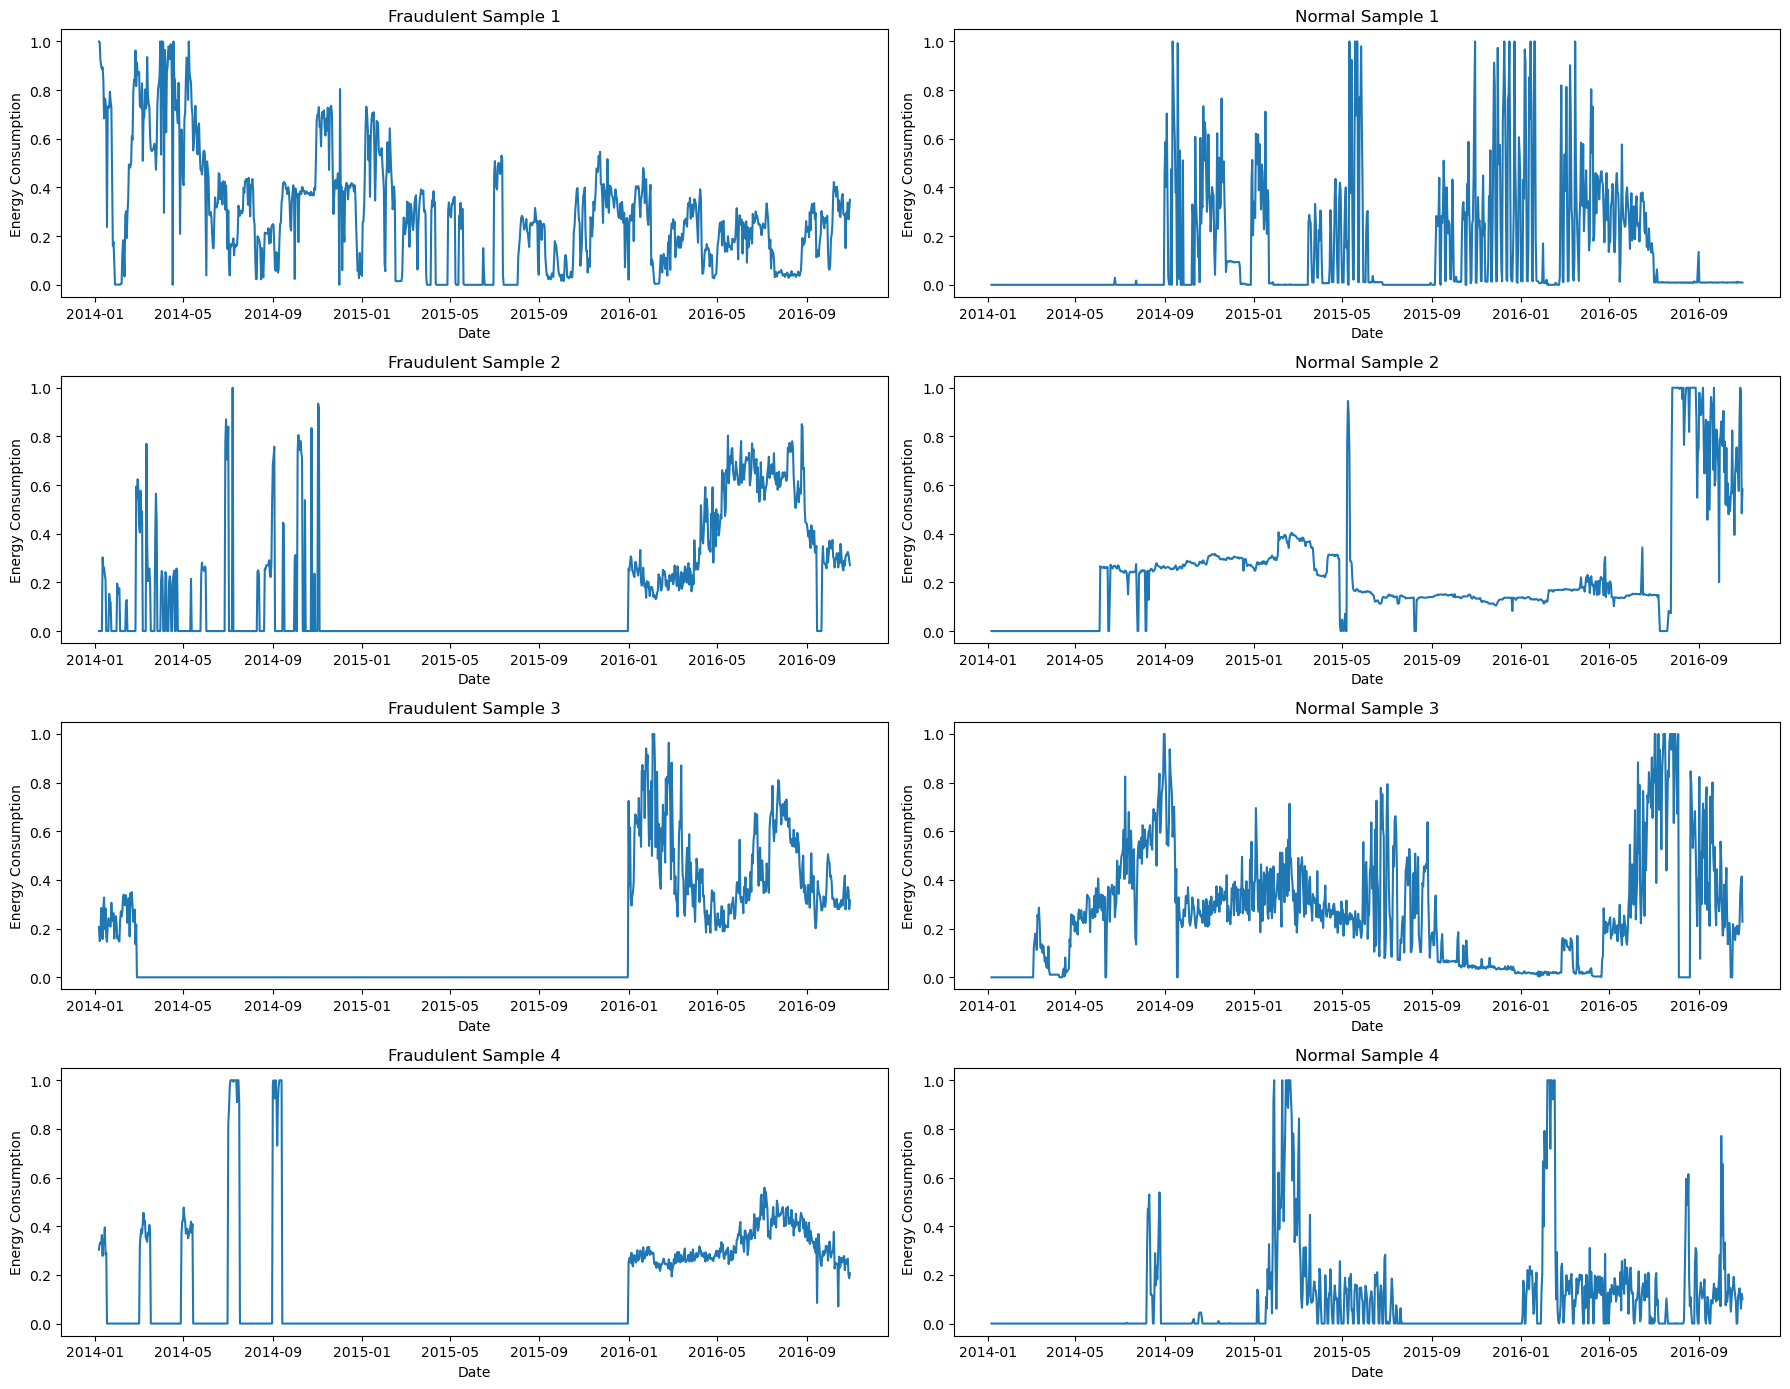

In [98]:
import matplotlib.pyplot as plt

number_samples = 4

# Get 6 samples with label 1
fraudulent_samples = df_red_processed.loc[label_red[label_red == 1].index].sample(number_samples)

# Get 6 samples with label 0
normal_samples = df_red_processed.loc[label_red[label_red == 0].index].sample(number_samples)

# Create a grid of figures
fig, axes = plt.subplots(nrows=number_samples, ncols=2, figsize=(18, 14))

# Plot fraudulent samples
for i, sample in enumerate(fraudulent_samples.iterrows()):
    ax = axes[i, 0]
    ax.plot(sample[1].index[:-1], sample[1].values[:-1])
    ax.set_title(f"Fraudulent Sample {i+1}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Energy Consumption")

# Plot normal samples
for i, sample in enumerate(normal_samples.iterrows()):
    ax = axes[i, 1]
    ax.plot(sample[1].index[:-1], sample[1].values[:-1])
    ax.set_title(f"Normal Sample {i+1}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Energy Consumption")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [776]:
df_red_processed.columns = pd.to_datetime(df_red_processed.columns)
df_red_processed

2014-01-06  2014-01-07  2014-01-08  \
CONS_NO                                                                
0387DD8A07E07FDA6271170F86AD9151    0.000000    0.000000    0.000000   
01D6177B5D4FFE0CABA9EF17DAFC2B84    0.000000    0.000000    0.000000   
B32AC8CC6D5D805AC053557AB05F5343    0.000000    0.000000    0.000000   
EDFC78B07BA2908B3395C4EB2304665E    0.204839    0.181100    0.140898   
34C1954AA3703C4F8BD8EAEA7C4B7B83    0.027877    0.019514    0.047391   
...                                      ...         ...         ...   
F1472871E1AFF49D4289564B6377D76C    0.000000    0.000000    0.000000   
F3C8BBCD2DC26C1E0249DEEF6A4256B7    0.604810    0.319581    0.420556   
A9A0FE83467A680FBFB0DBFC910DF227    0.197196    0.127177    0.100027   
D9A6ADA018FA46A55D5438370456AA45    0.463416    0.473491    0.636004   
F3406636BAD1E6E0826E8EDDC9A1BF00    0.000000    0.000000    0.000000   

                                  2014-01-09  2014-01-10  2014-01-11  \
CONS_NO                                                                
0387DD8A07E07FDA6271170F86AD9151    0.000000    0.000000    0.000000   
01D6177B5D4FFE0CABA9EF17DAFC2B84    0.000000    0.000000    0.000000   
B32AC8CC6D5D805AC053557AB05F5343    0.000000    0.000000    0.000000   
EDFC78B07BA2908B3395C4EB2304665E    0.135155    0.130944    0.145876   
34C1954AA3703C4F8BD8EAEA7C4B7B83    0.032059    0.073875    0.062724   
...                                      ...         ...         ...   
F1472871E1AFF49D4289564B6377D76C    0.000000    0.000000    0.000000   
F3C8BBCD2DC26C1E0249DEEF6A4256B7    0.591277    0.456991    0.411187   
A9A0FE83467A680FBFB0DBFC910DF227    0.175762    0.120033    0.230062   
D9A6ADA018FA46A55D5438370456AA45    0.327149    0.366915    0.357902   
F3406636BAD1E6E0826E8EDDC9A1BF00    0.000000    0.000000    0.000000   

                                  2014-01-12  2014-01-13  2014-01-14  \
CONS_NO                                                                
0387DD8A07E07FDA6271170F86AD9151    0.000000    0.000000    0.000000   
01D6177B5D4FFE0CABA9EF17DAFC2B84    0.000000    0.000000    0.000000   
B32AC8CC6D5D805AC053557AB05F5343    0.000000    0.000000    0.000000   
EDFC78B07BA2908B3395C4EB2304665E    0.175357    0.136304    0.162722   
34C1954AA3703C4F8BD8EAEA7C4B7B83    0.071087    0.183990    0.098964   
...                                      ...         ...         ...   
F1472871E1AFF49D4289564B6377D76C    0.000000    0.000000    0.000000   
F3C8BBCD2DC26C1E0249DEEF6A4256B7    0.000000    0.000000    0.000000   
A9A0FE83467A680FBFB0DBFC910DF227    0.128606    0.085738    0.117175   
D9A6ADA018FA46A55D5438370456AA45    0.387064    0.383352    0.327149   
F3406636BAD1E6E0826E8EDDC9A1BF00    0.000000    0.000000    0.000000   

                                  2014-01-15  ...  2016-10-22  2016-10-23  \
CONS_NO                                       ...                           
0387DD8A07E07FDA6271170F86AD9151    0.000000  ...    0.177590    0.199603   
01D6177B5D4FFE0CABA9EF17DAFC2B84    0.000000  ...    0.000000    0.000000   
B32AC8CC6D5D805AC053557AB05F5343    0.000000  ...    0.262073    0.309332   
EDFC78B07BA2908B3395C4EB2304665E    0.147790  ...    0.544067    0.391299   
34C1954AA3703C4F8BD8EAEA7C4B7B83    0.016726  ...    0.257864    0.468337   
...                                      ...  ...         ...         ...   
F1472871E1AFF49D4289564B6377D76C    0.000000  ...    0.367551    0.348443   
F3C8BBCD2DC26C1E0249DEEF6A4256B7    0.000000  ...    0.399737    0.689129   
A9A0FE83467A680FBFB0DBFC910DF227    0.127177  ...    0.141467    0.087166   
D9A6ADA018FA46A55D5438370456AA45    0.407478  ...    0.414636    0.436905   
F3406636BAD1E6E0826E8EDDC9A1BF00    0.000000  ...    0.481346    0.781275   

                                  2016-10-24  2016-10-25  2016-10-26  \
CONS_NO                                                                
0387DD8A07E07FDA6271170F86AD9151    0.200098    0.235715    0.135542   
01D61

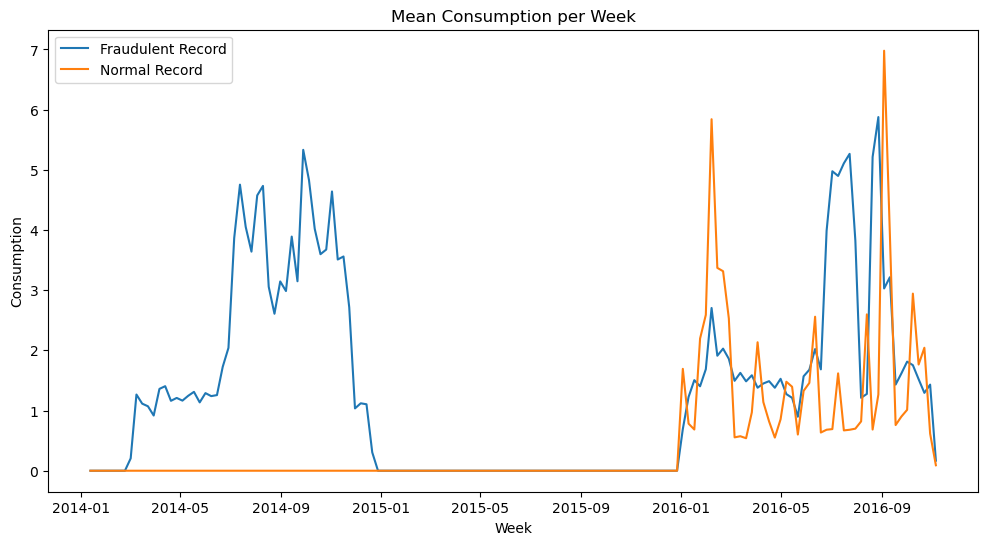

In [87]:
# Resample the fraudulent record on a weekly basis
fraudulent_record = df_red_processed.loc[label_red[label_red == 1].index[0]]
fraudulent_record_weekly = fraudulent_record.resample('W').sum()

# Resample the normal record on a weekly basis
normal_record = df_red_processed.loc[label_red[label_red == 0].index[0]]
normal_record_weekly = normal_record.resample('W').sum()

plt.figure(figsize=(12, 6))
plt.plot(fraudulent_record_weekly.index, fraudulent_record_weekly.values, label='Fraudulent Record')
plt.plot(normal_record_weekly.index, normal_record_weekly.values, label='Normal Record')

plt.xlabel('Week')
plt.ylabel('Consumption')
plt.title('Mean Consumption per Week')
plt.legend()

# Show the plot
plt.show()

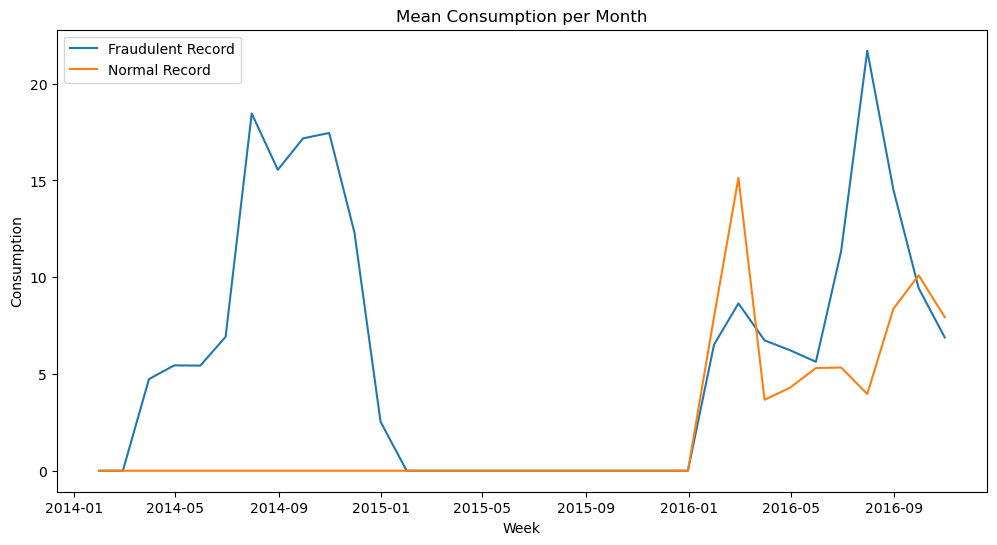

In [88]:
# Resample the fraudulent record on a weekly basis
fraudulent_record = df_red_processed.loc[label_red[label_red == 1].index[0]]
fraudulent_record_weekly = fraudulent_record.resample('M').sum()

# Resample the normal record on a weekly basis
normal_record = df_red_processed.loc[label_red[label_red == 0].index[0]]
normal_record_weekly = normal_record.resample('M').sum()

plt.figure(figsize=(12, 6))
plt.plot(fraudulent_record_weekly.index, fraudulent_record_weekly.values, label='Fraudulent Record')
plt.plot(normal_record_weekly.index, normal_record_weekly.values, label='Normal Record')

plt.xlabel('Week')
plt.ylabel('Consumption')
plt.title('Mean Consumption per Month')
plt.legend()

# Show the plot
plt.show()

 # Feature engineering

Let's take a sample to identify what how is the behavior of each consumption group

In [814]:
fraudulent_samples = df_red_processed.loc[label_red[label_red == 1].index].sample(500)
normal_samples = df_red_processed.loc[label_red[label_red == 0].index].sample(500)

In [821]:
fraudulent_samples

2014-01-06  2014-01-07  2014-01-08  \
CONS_NO                                                                
B24C27ED02A602EEF1E2AA8AEB039654    0.000000    0.000000    0.000000   
C25CA5B4689A1981E6C6C3D07D994812    0.000000    0.000000    0.633679   
F942BDB4498BAF4ED6A77572CB270537    0.623807    0.545053    0.469023   
0BEDE661208A56392BBC4BAB71CD58E8    0.000000    0.000000    0.000000   
F1D26619E4BC428924BAF5261F705D18    0.141753    0.071930    0.004216   
...                                      ...         ...         ...   
05CC1F5D982A0BE43DBEB2357865A76E    0.353106    0.133296    0.174630   
EF2A8763241D49D8D41B1E6F4A8E4354    0.288425    0.412388    0.358753   
5E689B3EB2C4A5999062C0DC16AF790E    0.000000    0.000000    0.000000   
F1AA6562BCF36FF56935AD19878830DD    0.216130    0.177557    0.298785   
051E90FD022D35A18959645887A4452D    0.507236    0.460808    0.365109   

                                  2014-01-09  2014-01-10  2014-01-11  \
CONS_NO                                                                
B24C27ED02A602EEF1E2AA8AEB039654    0.000000    0.000000    0.000000   
C25CA5B4689A1981E6C6C3D07D994812    0.000000    0.000000    0.000000   
F942BDB4498BAF4ED6A77572CB270537    0.831821    0.678982    0.632368   
0BEDE661208A56392BBC4BAB71CD58E8    0.000000    0.000000    0.000000   
F1D26619E4BC428924BAF5261F705D18    0.086422    0.211576    0.213683   
...                                      ...         ...         ...   
05CC1F5D982A0BE43DBEB2357865A76E    0.140345    0.127528    0.247046   
EF2A8763241D49D8D41B1E6F4A8E4354    0.247925    0.135456    0.394875   
5E689B3EB2C4A5999062C0DC16AF790E    0.000000    0.000000    0.000000   
F1AA6562BCF36FF56935AD19878830DD    0.243069    0.207558    0.156434   
051E90FD022D35A18959645887A4452D    0.397956    0.386902    0.595671   

                                  2014-01-12  2014-01-13  2014-01-14  \
CONS_NO                                                                
B24C27ED02A602EEF1E2AA8AEB039654    0.000000    0.000000    0.000000   
C25CA5B4689A1981E6C6C3D07D994812    0.000000    0.000000    0.000000   
F942BDB4498BAF4ED6A77572CB270537    0.671044    0.631278    0.675013   
0BEDE661208A56392BBC4BAB71CD58E8    0.000000    0.000000    0.000000   
F1D26619E4BC428924BAF5261F705D18    0.065080    0.039786    0.021342   
...                                      ...         ...         ...   
05CC1F5D982A0BE43DBEB2357865A76E    0.228461    0.194817    0.041014   
EF2A8763241D49D8D41B1E6F4A8E4354    0.464381    0.475874    0.306212   
5E689B3EB2C4A5999062C0DC16AF790E    0.000000    0.000000    0.000000   
F1AA6562BCF36FF56935AD19878830DD    0.119086    0.122147    0.146944   
051E90FD022D35A18959645887A4452D    0.287729    0.579247    0.308258   

                                  2014-01-15  ...  2016-10-22  2016-10-23  \
CONS_NO                                       ...                           
B24C27ED02A602EEF1E2AA8AEB039654    0.000000  ...    0.554883    0.553354   
C25CA5B4689A1981E6C6C3D07D994812    0.000000  ...    0.265824    0.000000   
F942BDB4498BAF4ED6A77572CB270537    0.445677  ...    0.000000    0.000000   
0BEDE661208A56392BBC4BAB71CD58E8    0.000000  ...    0.434077    0.695847   
F1D26619E4BC428924BAF5261F705D18    0.013438  ...    0.316705    0.355700   
...                                      ...  ...         ...         ...   
05CC1F5D982A0BE43DBEB2357865A76E    0.000000  ...    0.401810    0.445708   
EF2A8763241D49D8D41B1E6F4A8E4354    0.324000  ...    0.404452    0.674543   
5E689B3EB2C4A5999062C0DC16AF790E    0.000000  ...    0.264400    0.520774   
F1AA6562BCF36FF56935AD19878830DD    0.192557  ...    0.167761    0.549508   
051E90FD022D35A18959645887A4452D    0.579247  ...    0.391324    0.381533   

                                  2016-10-24  2016-10-25  2016-10-26  \
CONS_NO                                                                
B24C27ED02A602EEF1E2AA8AEB039654    0.560525    0.566982    0.568205   
C25CA

## Slice by x days

In [879]:
n_days = 28
1029 / n_days

36.75

In [880]:
# if days are != than 7.
if(n_days > 7):
    fraudulent_reduced = fraudulent_samples.iloc[:,:-(n_days-7)]
else:
    fraudulent_reduced = fraudulent_samples

fraudulent_samples_r = fraudulent_reduced.values.reshape(fraudulent_reduced.shape[0] , -1, n_days)
print("Shape of the reshaped array:", fraudulent_samples_r.shape)

row_ids = np.repeat(np.arange(fraudulent_reduced.shape[0]), fraudulent_samples_r.shape[1])
week_numbers = np.tile(np.arange(fraudulent_samples_r.shape[1]), fraudulent_reduced.shape[0])

fraudulent_samples_df = pd.DataFrame(
    fraudulent_samples_r.reshape(fraudulent_reduced.shape[0] * fraudulent_samples_r.shape[1], n_days),  # Flatten the first two dimensions
    columns=[f'Day_{i+1}' for i in range(n_days)]  # Name the columns as Day_1 to Day_7
)

# fraudulent_samples_df['ID'] = row_ids
# fraudulent_samples_df['Week'] = week_numbers

fraudulent_samples_df

Shape of the reshaped array: (500, 36, 28)


Day_1     Day_2     Day_3     Day_4     Day_5     Day_6     Day_7  \
0      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
17995  0.377427  0.364477  0.254566  0.385954  0.457965  0.405220  0.513237   
17996  0.721374  0.775383  0.946567  1.000000  0.940882  0.750432  0.264041   
17997  0.394798  0.584301  0.545137  0.521133  0.381848  0.320892  0.232141   
17998  0.955095  1.000000  0.734955  0.610515  0.694528  0.661681  0.756748   
17999  0.391324  0.427645  0.450069  0.278253  0.061904  0.341105  0.515448   

          Day_8     Day_9    Day_10  ...    Day_19    Day_20    Day_21  \
0      0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
1      0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
2      0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
3      0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
4      0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
...         ...       ...       ...  ...       ...       ...       ...   
17995  0.605778  0.524923  0.548611  ...  0.593776  0.569140  0.455754   
17996  0.234036  0.344579  0.546716  ...  0.494918  0.556507  0.572930   
17997  0.578931  1.000000  0.647152  ...  1.000000  0.866976  0.988889   
17998  0.751695  0.997101  0.879609  ...  0.669577  0.550190  0.902034   
17999  0.379953  0.431119  0.382164  ...  0.396377  0.298467  0.573562   

         Day_22    Day_23    Day_24    Day_25    Day_26    Day_27    Day_28  
0      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
1      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
2      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
3      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
4      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
...         ...       ...       ...       ...       ...       ...       ...  
17995  0.537557  0.403325  0.561876  0.587775  0.479127  0.507552  0.555244  
17996  0.419433  0.405852  0.403641  0.524291  0.450069  0.532819  0.400799  
17997  0.811388  0.615884  1.000000  0.691054  0.643047  0.686632  1.000000  
17998  0.493971  0.511974  0.555875  0.585564  0.476916  0.595987  0.615569  
17999  0.569456  0.450701  0.191398  0.282991  0.469336  0.202768  0.378690  

[18000 rows x 28 columns]

In [891]:
len(fraudulent_samples_df)

18000

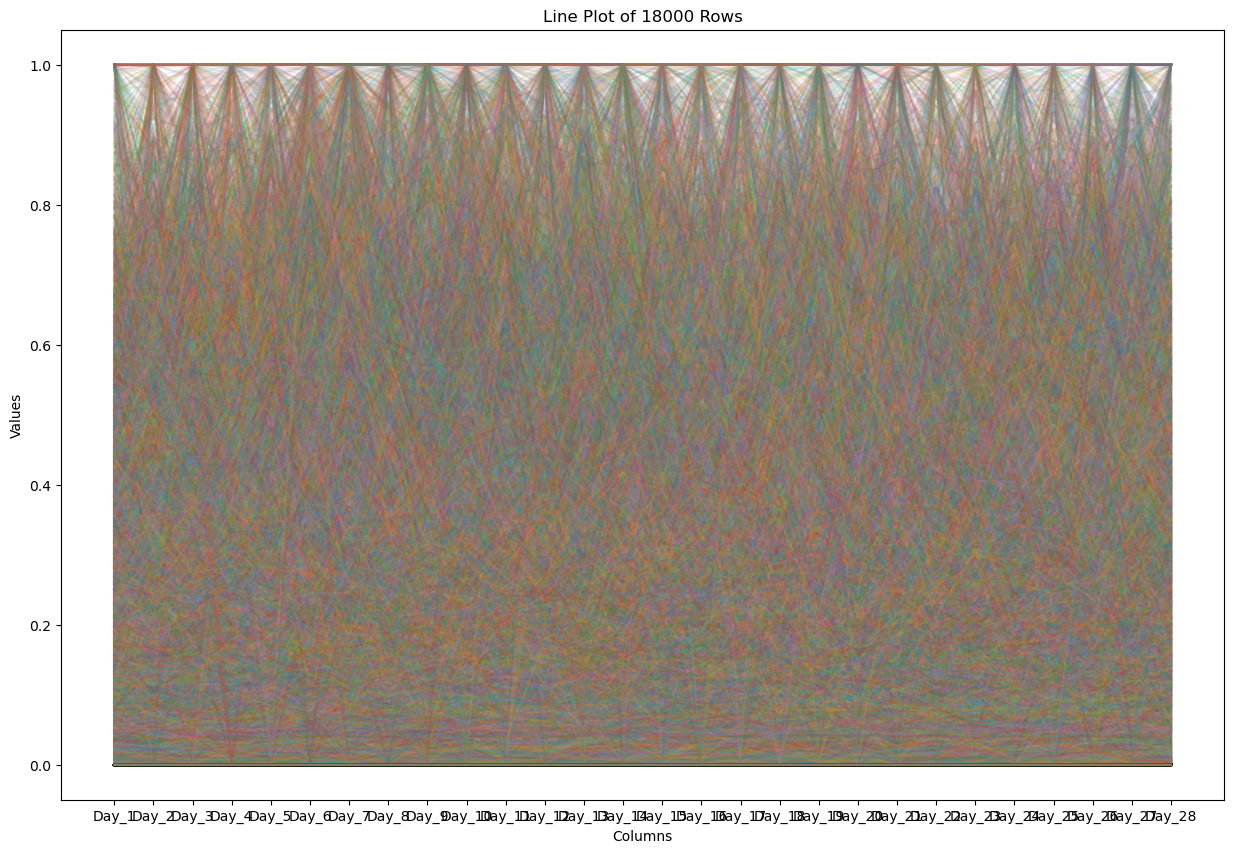

In [892]:
# Assuming your DataFrame is named df
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed

for i in range(len(fraudulent_samples_df)):
    plt.plot(fraudulent_samples_df.columns, fraudulent_samples_df.iloc[i], alpha=0.1)  # Set alpha for transparency

plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Line Plot of 18000 Rows')
plt.show()

Let's see the normal records

In [882]:
# if days are != than 7.
if(n_days > 7):
    normal_reduced = normal_samples.iloc[:,:-(n_days-7)]
else:
    normal_reduced = normal_samples

normal_samples_r = normal_reduced.values.reshape(normal_reduced.shape[0] , -1, n_days)
print("Shape of the reshaped array:", normal_samples_r.shape)

row_ids = np.repeat(np.arange(normal_reduced.shape[0]), normal_samples_r.shape[1])
week_numbers = np.tile(np.arange(normal_samples_r.shape[1]), normal_reduced.shape[0])

normal_samples_df = pd.DataFrame(
    normal_samples_r.reshape(normal_reduced.shape[0] * normal_samples_r.shape[1], n_days),  # Flatten the first two dimensions
    columns=[f'Day_{i+1}' for i in range(n_days)]  # Name the columns as Day_1 to Day_7
)

# normal_samples_df['ID'] = row_ids
# normal_samples_df['Week'] = week_numbers

normal_samples_df

Shape of the reshaped array: (500, 36, 28)


Day_1     Day_2     Day_3     Day_4     Day_5     Day_6     Day_7  \
0      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
17995  0.514085  0.561287  0.604315  0.619086  0.646058  0.836151  0.615233   
17996  0.743353  0.796334  0.719912  0.803078  0.792481  0.702573  0.873078   
17997  0.862803  0.791197  0.711563  0.708352  0.782527  0.849316  0.869225   
17998  0.553902  0.714453  0.562251  0.673031  0.630003  0.615554  0.605600   
17999  0.606884  0.585370  0.675279  0.709637  0.694545  0.756518  0.579911   

          Day_8     Day_9    Day_10  ...    Day_19    Day_20    Day_21  \
0      0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
1      0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
2      0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
3      0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
4      0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
...         ...       ...       ...  ...       ...       ...       ...   
17995  0.674315  0.689086  0.756839  ...  0.739499  0.693903  0.557434   
17996  0.768720  0.734041  0.776426  ...  0.857986  0.791197  0.696793   
17997  0.839041  0.801151  0.789270  ...  0.747206  0.761013  0.654728   
17998  0.712848  0.720233  0.682343  ...  0.720233  0.612664  0.614590   
17999  0.607847  0.550691  0.568994  ...  0.647985  0.644132  0.544269   

         Day_22    Day_23    Day_24    Day_25    Day_26    Day_27    Day_28  
0      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
1      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
2      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
3      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
4      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
...         ...       ...       ...       ...       ...       ...       ...  
17995  0.632572  0.707068  0.300873  0.649591  0.637389  0.739178  0.745279  
17996  0.647664  0.722481  0.711242  0.770967  0.900051  0.809821  0.924776  
17997  0.656655  0.679453  0.697756  0.698398  0.664040  0.637068  0.559361  
17998  0.649591  0.671747  0.732435  0.612343  0.611379  0.641242  0.650233  
17999  0.609453  0.660508  0.617480  0.680416  0.568352  0.565783  0.485186  

[18000 rows x 28 columns]

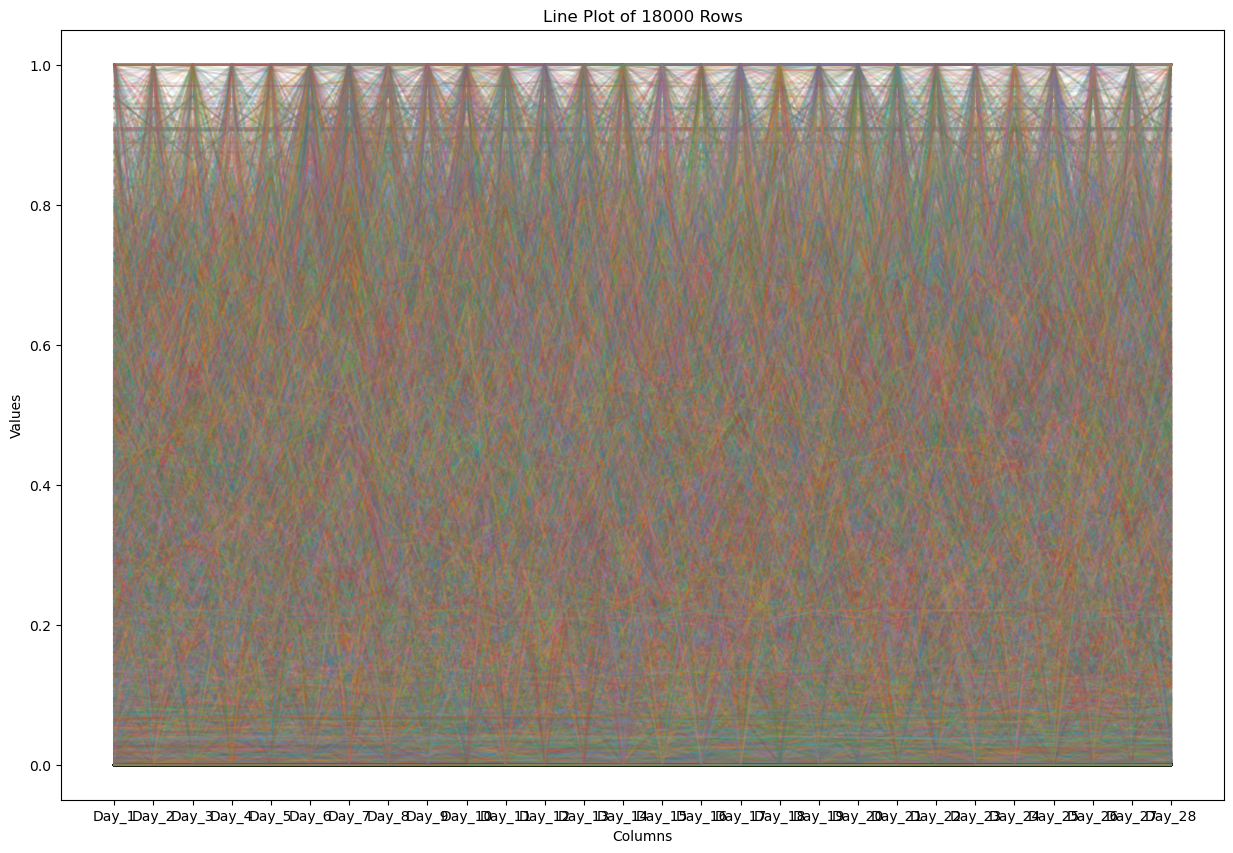

In [893]:
# Assuming your DataFrame is named df
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed

for i in range(len(normal_samples_df)):
    plt.plot(normal_samples_df.columns, normal_samples_df.iloc[i], alpha=0.1)  # Set alpha for transparency

plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Line Plot of 18000 Rows')
plt.show()

## Statistics per user group

In [897]:
normal_group = df_red_processed.loc[label_red[label_red == 0].index]
fraudulent_group = df_red_processed.loc[label_red[label_red == 1].index]

In [1145]:
'''
    General statistics per month
'''
monthly_sum = df_red_processed.resample('M', axis=1).sum()
monthly_min = df_red_processed.resample('M', axis=1).min()
monthly_max = df_red_processed.resample('M', axis=1).max()
monthly_std = df_red_processed.resample('M', axis=1).std()
monthly_mean = df_red_processed.resample('M', axis=1).mean()
monthly_mode = df_red_processed.resample('M', axis=1).apply(lambda x: x.mode(axis=1)[0])
monthly_diff = monthly_max - monthly_min

C:\Users\DAIMA Researcher\AppData\Local\Temp\ipykernel_16140\1305968073.py:5: FutureWarning: DataFrame.resample with axis=1 is deprecated. Do `frame.T.resample(...)` without axis instead.
  monthly_sum = df_red_processed.resample('M', axis=1).sum()
C:\Users\DAIMA Researcher\AppData\Local\Temp\ipykernel_16140\1305968073.py:6: FutureWarning: DataFrame.resample with axis=1 is deprecated. Do `frame.T.resample(...)` without axis instead.
  monthly_min = df_red_processed.resample('M', axis=1).min()
C:\Users\DAIMA Researcher\AppData\Local\Temp\ipykernel_16140\1305968073.py:7: FutureWarning: DataFrame.resample with axis=1 is deprecated. Do `frame.T.resample(...)` without axis instead.
  monthly_max = df_red_processed.resample('M', axis=1).max()
C:\Users\DAIMA Researcher\AppData\Local\Temp\ipykernel_16140\1305968073.py:8: FutureWarning: DataFrame.resample with axis=1 is deprecated. Do `frame.T.resample(...)` without axis instead.
  monthly_std = df_red_processed.resample('M', axis=1).std()
C:\U

In [1150]:
monthly_sum_prefx = monthly_sum.add_prefix('sum_')
monthly_min_prefx = monthly_min.add_prefix('min_')
monthly_max_prefx = monthly_max.add_prefix('max_')
monthly_std_prefx = monthly_std.add_prefix('std_')
monthly_mean_prefx = monthly_mean.add_prefix('mean_')
monthly_mode_prefx = monthly_mode.add_prefix('mode_')
monthly_diff_prefx = monthly_diff.add_prefix('diff_')

In [1147]:
'''
    General statistics per week
'''
weekly_sum = df_red_processed.resample('W', axis=1).sum()
weekly_min = df_red_processed.resample('W', axis=1).min()
weekly_max = df_red_processed.resample('W', axis=1).max()
weekly_mean = df_red_processed.resample('W', axis=1).mean()
weekly_mode = df_red_processed.resample('W', axis=1).apply(lambda x: x.mode(axis=1)[0])
weekly_diff = weekly_max - weekly_min

C:\Users\DAIMA Researcher\AppData\Local\Temp\ipykernel_16140\1685046582.py:1: FutureWarning: DataFrame.resample with axis=1 is deprecated. Do `frame.T.resample(...)` without axis instead.
  weekly_sum = df_red_processed.resample('W', axis=1).sum()
C:\Users\DAIMA Researcher\AppData\Local\Temp\ipykernel_16140\1685046582.py:2: FutureWarning: DataFrame.resample with axis=1 is deprecated. Do `frame.T.resample(...)` without axis instead.
  weekly_min = df_red_processed.resample('W', axis=1).min()
C:\Users\DAIMA Researcher\AppData\Local\Temp\ipykernel_16140\1685046582.py:3: FutureWarning: DataFrame.resample with axis=1 is deprecated. Do `frame.T.resample(...)` without axis instead.
  weekly_max = df_red_processed.resample('W', axis=1).max()
C:\Users\DAIMA Researcher\AppData\Local\Temp\ipykernel_16140\1685046582.py:4: FutureWarning: DataFrame.resample with axis=1 is deprecated. Do `frame.T.resample(...)` without axis instead.
  weekly_std = df_red_processed.resample('W', axis=1).std()
C:\Users

In [ ]:
weekly_std

C:\Users\DAIMA Researcher\AppData\Local\Temp\ipykernel_16140\2078406839.py:1: FutureWarning: DataFrame.resample with axis=1 is deprecated. Do `frame.T.resample(...)` without axis instead.
  weekly_std = df_red_processed.resample('W', axis=1).std()


2014-01-12  2014-01-19  2014-01-26  \
CONS_NO                                                                
0387DD8A07E07FDA6271170F86AD9151    0.000000    0.000000    0.000000   
01D6177B5D4FFE0CABA9EF17DAFC2B84    0.000000    0.000000    0.000000   
B32AC8CC6D5D805AC053557AB05F5343    0.000000    0.000000    0.000000   
EDFC78B07BA2908B3395C4EB2304665E    0.028026    0.054415    0.062788   
34C1954AA3703C4F8BD8EAEA7C4B7B83    0.021946    0.051709    0.104089   
...                                      ...         ...         ...   
F1472871E1AFF49D4289564B6377D76C    0.000000    0.000000    0.000000   
F3C8BBCD2DC26C1E0249DEEF6A4256B7    0.203631    0.000000    0.305402   
A9A0FE83467A680FBFB0DBFC910DF227    0.047532    0.074168    0.060442   
D9A6ADA018FA46A55D5438370456AA45    0.105708    0.069215    0.044386   
F3406636BAD1E6E0826E8EDDC9A1BF00    0.000000    0.000000    0.000000   

                                  2014-02-02  2014-02-09  2014-02-16  \
CONS_NO                                                                
0387DD8A07E07FDA6271170F86AD9151    0.000000    0.000000    0.000000   
01D6177B5D4FFE0CABA9EF17DAFC2B84    0.000000    0.000000    0.000000   
B32AC8CC6D5D805AC053557AB05F5343    0.000000    0.000000    0.000000   
EDFC78B07BA2908B3395C4EB2304665E    0.044325    0.025209    0.032293   
34C1954AA3703C4F8BD8EAEA7C4B7B83    0.043313    0.068003    0.087564   
...                                      ...         ...         ...   
F1472871E1AFF49D4289564B6377D76C    0.000000    0.000000    0.000000   
F3C8BBCD2DC26C1E0249DEEF6A4256B7    0.218760    0.255351    0.374389   
A9A0FE83467A680FBFB0DBFC910DF227    0.127635    0.037003    0.051485   
D9A6ADA018FA46A55D5438370456AA45    0.175119    0.134490    0.063059   
F3406636BAD1E6E0826E8EDDC9A1BF00    0.000000    0.000000    0.000000   

                                  2014-02-23  2014-03-02  2014-03-09  \
CONS_NO                                                                
0387DD8A07E07FDA6271170F86AD9151    0.000000    0.077593    0.032490   
01D6177B5D4FFE0CABA9EF17DAFC2B84    0.000000    0.000000    0.000000   
B32AC8CC6D5D805AC053557AB05F5343    0.000000    0.000000    0.000000   
EDFC78B07BA2908B3395C4EB2304665E    0.022204    0.023403    0.035403   
34C1954AA3703C4F8BD8EAEA7C4B7B83    0.026868    0.008429    0.046109   
...                                      ...         ...         ...   
F1472871E1AFF49D4289564B6377D76C    0.000000    0.000000    0.000000   
F3C8BBCD2DC26C1E0249DEEF6A4256B7    0.135697    0.217249    0.387069   
A9A0FE83467A680FBFB0DBFC910DF227    0.111594    0.102715    0.045711   
D9A6ADA018FA46A55D5438370456AA45    0.070133    0.088669    0.069244   
F3406636BAD1E6E0826E8EDDC9A1BF00    0.000000    0.000000    0.000000   

                                  2014-03-16  ...  2016-09-04  2016-09-11  \
CONS_NO                                       ...                           
0387DD8A07E07FDA6271170F86AD9151    0.018052  ...    0.156785    0.092412   
01D6177B5D4FFE0CABA9EF17DAFC2B84    0.000000  ...    0.000000    0.000000   
B32AC8CC6D5D805AC053557AB05F5343    0.000000  ...    0.126308    0.084302   
EDFC78B07BA2908B3395C4EB2304665E    0.014209  ...    0.119685    0.078988   
34C1954AA3703C4F8BD8EAEA7C4B7B83    0.008429  ...    0.068917    0.090127   
...                                      ...  ...         ...         ...   
F1472871E1AFF49D4289564B6377D76C    0.000000  ...    0.030222    0.067546   
F3C8BBCD2DC26C1E0249DEEF6A4256B7    0.294534  ...    0.055459    0.093797   
A9A0FE83467A680FBFB0DBFC910DF227    0.040171  ...    0.234888    0.264803   
D9A6ADA018FA46A55D5438370456AA45    0.045380  ...    0.104056    0.057307   
F3406636BAD1E6E0826E8EDDC9A1BF00    0.000000  ...    0.118122    0.086375   

                                  2016-09-18  2016-09-25  2016-10-02  \
CONS_NO                                                                
0387DD8A07E07FDA6271170F86AD9151    0.063053    0.060403    0.089526   
01D61

In [1187]:
# There's a column with all nun values. It is the last columns
weekly_std.iloc[:,:-1].isna().sum().sum()

# weekly_diff.isna().sum().sum()

0

In [1188]:
weekly_sum_prefx = weekly_sum.add_prefix('sum_')
weekly_min_prefx = weekly_min.add_prefix('min_')
weekly_max_prefx = weekly_max.add_prefix('max_')
weekly_std_prefx = weekly_std.iloc[:,:-1].add_prefix('std_')
weekly_mean_prefx = weekly_mean.add_prefix('mean_')
weekly_mode_prefx = weekly_mode.add_prefix('mode_')
weekly_diff_prefx = weekly_diff.add_prefix('diff_')

In [1189]:
manual_features = pd.concat([monthly_sum_prefx,
                             monthly_min_prefx,
                             monthly_max_prefx,
                             monthly_std_prefx,
                             monthly_mean_prefx,
                             monthly_mode_prefx,
                             monthly_diff_prefx,
                             weekly_sum_prefx,
                             weekly_min_prefx,
                             weekly_max_prefx,
                             weekly_std_prefx,
                             weekly_mean_prefx,
                             weekly_mode_prefx,
                             weekly_diff_prefx
                             ], axis=1)

In [1204]:
manual_features

sum_2014-01-31 00:00:00  \
CONS_NO                                                     
0387DD8A07E07FDA6271170F86AD9151                 0.000000   
01D6177B5D4FFE0CABA9EF17DAFC2B84                 0.000000   
B32AC8CC6D5D805AC053557AB05F5343                 0.000000   
EDFC78B07BA2908B3395C4EB2304665E                 5.157337   
34C1954AA3703C4F8BD8EAEA7C4B7B83                 3.529253   
...                                                   ...   
F1472871E1AFF49D4289564B6377D76C                 0.000000   
F3C8BBCD2DC26C1E0249DEEF6A4256B7                 6.840284   
A9A0FE83467A680FBFB0DBFC910DF227                 3.803887   
D9A6ADA018FA46A55D5438370456AA45                10.337523   
F3406636BAD1E6E0826E8EDDC9A1BF00                 0.000000   

                                  sum_2014-02-28 00:00:00  \
CONS_NO                                                     
0387DD8A07E07FDA6271170F86AD9151                 0.000000   
01D6177B5D4FFE0CABA9EF17DAFC2B84                 0.000000   
B32AC8CC6D5D805AC053557AB05F5343                 0.000000   
EDFC78B07BA2908B3395C4EB2304665E                 7.687763   
34C1954AA3703C4F8BD8EAEA7C4B7B83                 3.805238   
...                                                   ...   
F1472871E1AFF49D4289564B6377D76C                 0.000000   
F3C8BBCD2DC26C1E0249DEEF6A4256B7                 9.611374   
A9A0FE83467A680FBFB0DBFC910DF227                 5.291433   
D9A6ADA018FA46A55D5438370456AA45                 9.339640   
F3406636BAD1E6E0826E8EDDC9A1BF00                 0.000000   

                                  sum_2014-03-31 00:00:00  \
CONS_NO                                                     
0387DD8A07E07FDA6271170F86AD9151                 4.736309   
01D6177B5D4FFE0CABA9EF17DAFC2B84                 0.000000   
B32AC8CC6D5D805AC053557AB05F5343                 0.000000   
EDFC78B07BA2908B3395C4EB2304665E                 8.801166   
34C1954AA3703C4F8BD8EAEA7C4B7B83                 1.276776   
...                                                   ...   
F1472871E1AFF49D4289564B6377D76C                 0.000000   
F3C8BBCD2DC26C1E0249DEEF6A4256B7                 8.207750   
A9A0FE83467A680FBFB0DBFC910DF227                 3.897484   
D9A6ADA018FA46A55D5438370456AA45                 9.843884   
F3406636BAD1E6E0826E8EDDC9A1BF00                 0.000000   

                                  sum_2014-04-30 00:00:00  \
CONS_NO                                                     
0387DD8A07E07FDA6271170F86AD9151                 5.443206   
01D6177B5D4FFE0CABA9EF17DAFC2B84                 0.000000   
B32AC8CC6D5D805AC053557AB05F5343                 0.000000   
EDFC78B07BA2908B3395C4EB2304665E                 6.431548   
34C1954AA3703C4F8BD8EAEA7C4B7B83                14.281902   
...                                                   ...   
F1472871E1AFF49D4289564B6377D76C                 0.000000   
F3C8BBCD2DC26C1E0249DEEF6A4256B7                18.480529   
A9A0FE83467A680FBFB0DBFC910DF227                 4.995639   
D9A6ADA018FA46A55D5438370456AA45                 9.055175   
F3406636BAD1E6E0826E8EDDC9A1BF00                 0.000000   

                                  sum_2014-05-31 00:00:00  \
CONS_NO                                                     
0387DD8A07E07FDA6271170F86AD9151                 5.432571   
01D6177B5D4FFE0CABA9EF17DAFC2B84                 0.000000   
B32AC8CC6D5D805AC053557AB05F5343                 0.000000   
EDFC78B07BA2908B3395C4EB2304665E                 6.205651   
34C1954AA3703C4F8BD8EAEA7C4B7B83                15.354796   
...                                                   ...   
F1472871E1AFF49D4289564B6377D76C                 0.000000   
F3C8BBCD2DC26C1E0249DEEF6A4256B7                 9.460050   
A9A0FE83467A680FBFB0DBFC910DF227                 0.847372   
D9A6ADA018FA46A55D5438370456AA45                12.043786   
F3406636BAD1E6E0826E8EDDC9A1BF00                 0.000000   

                                  sum_2014-06-30 00:00:00  \
CON

In [924]:
normal_monthly = normal_group.resample('M', axis=1).sum()

normal_monthly_mean = normal_monthly.mean(axis=1)
normal_monthly_variance = normal_monthly.var(axis=1)

normal_weekly = normal_group.resample('W', axis=1).sum()
normal_weekly_mean = normal_weekly.mean(axis=1)
normal_weekly_variance = normal_weekly.var(axis=1)

fraudulent_monthly = fraudulent_group.resample('M', axis=1).sum()
fraudulent_monthly_mean = fraudulent_monthly.mean(axis=1)
fraudulent_monthly_variance = fraudulent_monthly.var(axis=1)

fraudulent_weekly = fraudulent_group.resample('W', axis=1).sum()
fraudulent_weekly_mean = fraudulent_weekly.mean(axis=1)
fraudulent_weekly_variance = fraudulent_weekly.var(axis=1)

C:\Users\DAIMA Researcher\AppData\Local\Temp\ipykernel_16140\3809035075.py:1: FutureWarning: DataFrame.resample with axis=1 is deprecated. Do `frame.T.resample(...)` without axis instead.
  normal_monthly = normal_group.resample('M', axis=1).sum()
C:\Users\DAIMA Researcher\AppData\Local\Temp\ipykernel_16140\3809035075.py:5: FutureWarning: DataFrame.resample with axis=1 is deprecated. Do `frame.T.resample(...)` without axis instead.
  normal_weekly = normal_group.resample('W', axis=1).sum()
C:\Users\DAIMA Researcher\AppData\Local\Temp\ipykernel_16140\3809035075.py:9: FutureWarning: DataFrame.resample with axis=1 is deprecated. Do `frame.T.resample(...)` without axis instead.
  fraudulent_monthly = fraudulent_group.resample('M', axis=1).sum()
C:\Users\DAIMA Researcher\AppData\Local\Temp\ipykernel_16140\3809035075.py:13: FutureWarning: DataFrame.resample with axis=1 is deprecated. Do `frame.T.resample(...)` without axis instead.
  fraudulent_weekly = fraudulent_group.resample('W', axis=1)

In [1134]:
# Print or analyze the summary statistics
print("Summary Statistics for Normal Users:\n", normal_monthly.describe())
print("Mean consumption for normal users:\n", normal_monthly_mean.describe())
print("Variance in consumption for normal users:\n", normal_monthly_variance.describe())


Summary Statistics for Normal Users:
          2014-01-31    2014-02-28    2014-03-31    2014-04-30    2014-05-31  \
count  36900.000000  36900.000000  36900.000000  36900.000000  36900.000000   
mean       4.679149      5.174701      5.567935      5.075657      5.502788   
std        5.785194      6.275087      6.552898      5.928903      6.172033   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        1.008410      1.324237      2.090766      2.105047      3.207385   
75%        9.005341     10.007984     10.670715      9.651396     10.322932   
max       26.000000     27.899531     30.791045     30.000000     30.724622   

         2014-06-30    2014-07-31    2014-08-31    2014-09-30    2014-10-31  \
count  36900.000000  36900.000000  36900.000000  36900.000000  36900.000000   
mean       6.286038      8.623278      8.619382      8.032123      6.232510   
std        6.

In [1135]:
# Print or analyze the summary statistics
print("Summary Statistics for fraudulent Users:\n", fraudulent_monthly.describe())
print("Mean consumption for fraudulent users:\n", fraudulent_monthly_mean.describe())
print("Variance in consumption for fraudulent users:\n", fraudulent_monthly_variance.describe())

Summary Statistics for fraudulent Users:
         2014-01-31   2014-02-28   2014-03-31   2014-04-30   2014-05-31  \
count  3285.000000  3285.000000  3285.000000  3285.000000  3285.000000   
mean      3.624983     3.914514     4.308305     4.001091     4.299839   
std       4.712116     5.128098     5.298367     4.691537     4.866776   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       1.379066     1.407043     2.312271     2.420264     2.841779   
75%       6.120689     6.513057     7.150647     6.670654     7.203162   
max      24.686820    25.811447    27.675331    27.909589    25.111738   

        2014-06-30   2014-07-31   2014-08-31   2014-09-30   2014-10-31  ...  \
count  3285.000000  3285.000000  3285.000000  3285.000000  3285.000000  ...   
mean      4.921732     6.830234     6.800720     6.163678     4.752648  ...   
std       5.435737     7.404403     7.243682     6.527

### By month

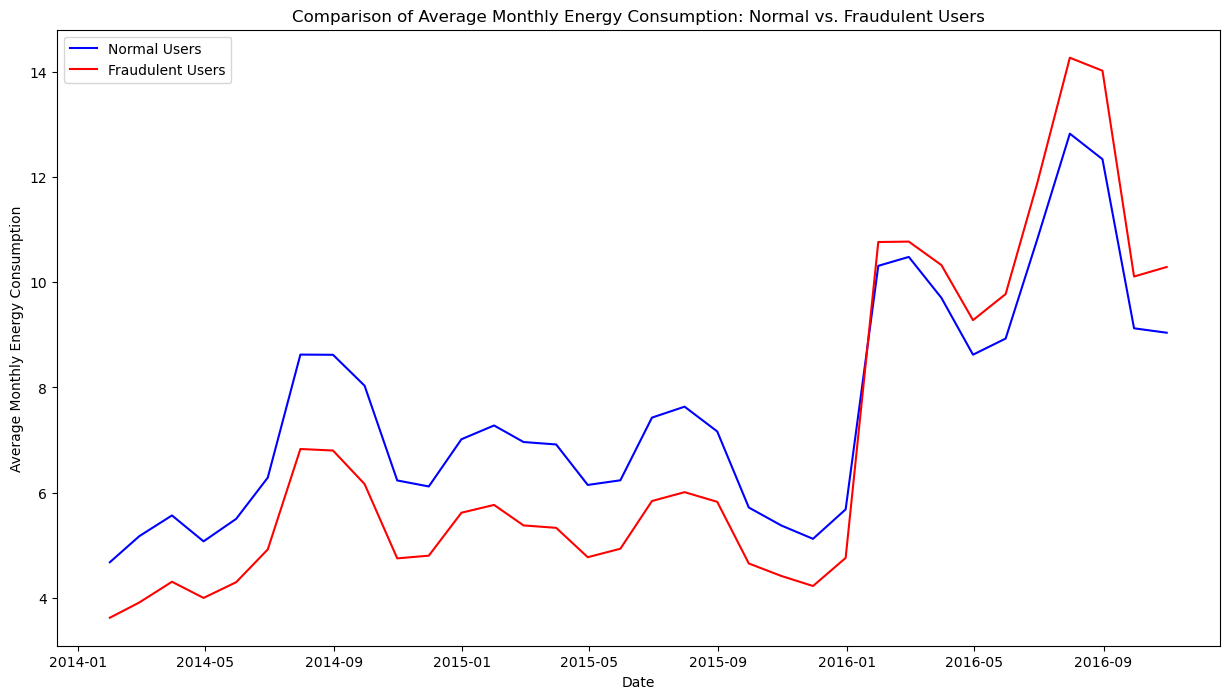

In [926]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

# Plot average monthly consumption for normal users
plt.plot(normal_monthly.mean(), label='Normal Users', color='blue')

# Plot average monthly consumption for fraudulent users
plt.plot(fraudulent_monthly.mean(), label='Fraudulent Users', color='red')

plt.xlabel('Date')
plt.ylabel('Average Monthly Energy Consumption')
plt.title('Comparison of Average Monthly Energy Consumption: Normal vs. Fraudulent Users')
plt.legend()
plt.show()

Quick observation: Fraudulent records are lower than normal consumption patter till the end of 2015. In 2016, the patter change and then the fraudulent users are in average per month higher than the values reported to normal users

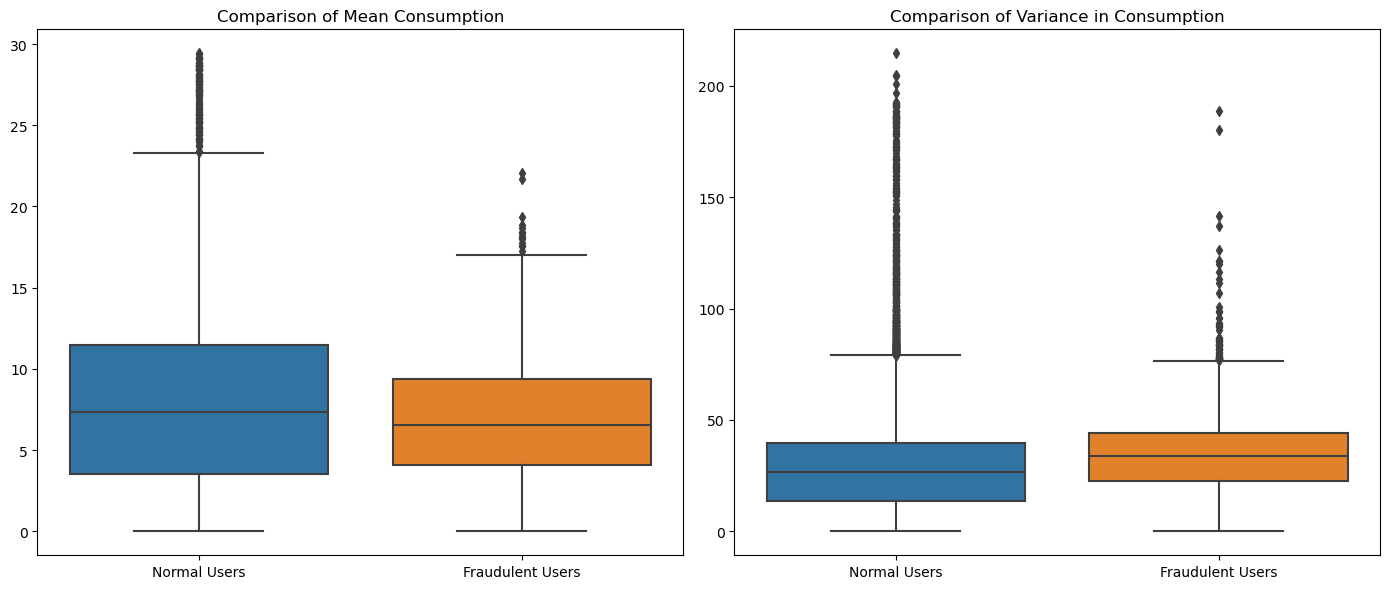

In [930]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine the data into a single DataFrame for plotting
combined_mean = pd.DataFrame({
    'Normal Users': normal_monthly_mean,
    'Fraudulent Users': fraudulent_monthly_mean
})

combined_variance = pd.DataFrame({
    'Normal Users': normal_monthly_variance,
    'Fraudulent Users': fraudulent_monthly_variance
})

plt.figure(figsize=(14, 6))

# Box plot for Mean Consumption
plt.subplot(1, 2, 1)
sns.boxplot(data=combined_mean)
plt.title('Comparison of Mean Consumption')

# Box plot for Variance in Consumption
plt.subplot(1, 2, 2)
sns.boxplot(data=combined_variance)
plt.title('Comparison of Variance in Consumption')

plt.tight_layout()
plt.show()


* The mean consumption is of normal users higher compared to fraudulent users.
* The interquartile range (IQR) is wider, indicating more variability in the central 50% of consumption data. Unlike fraudulent records, the IQR is narrower, showing less variability in the central 50% of the data.
* There are several outliers with much higher consumption values. In the fraudulent there are also outliers, but fewer and less extreme than those in the normal user group.

Right plot
* The median variance for normal users is lower, indicating more consistent consumption patterns. The IQR is also narrow, but there are many outliers, some with very high variance.
* The median variance is higher than in normal users, suggesting more inconsistent or erratic consumption behavior.
* There are fewer outliers compared to normal users, but they are still present.


* Normal users tend to have a higher and more variable mean consumption compared to fraudulent users.
* Fraudulent users tend to have a higher variance in their consumption



c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

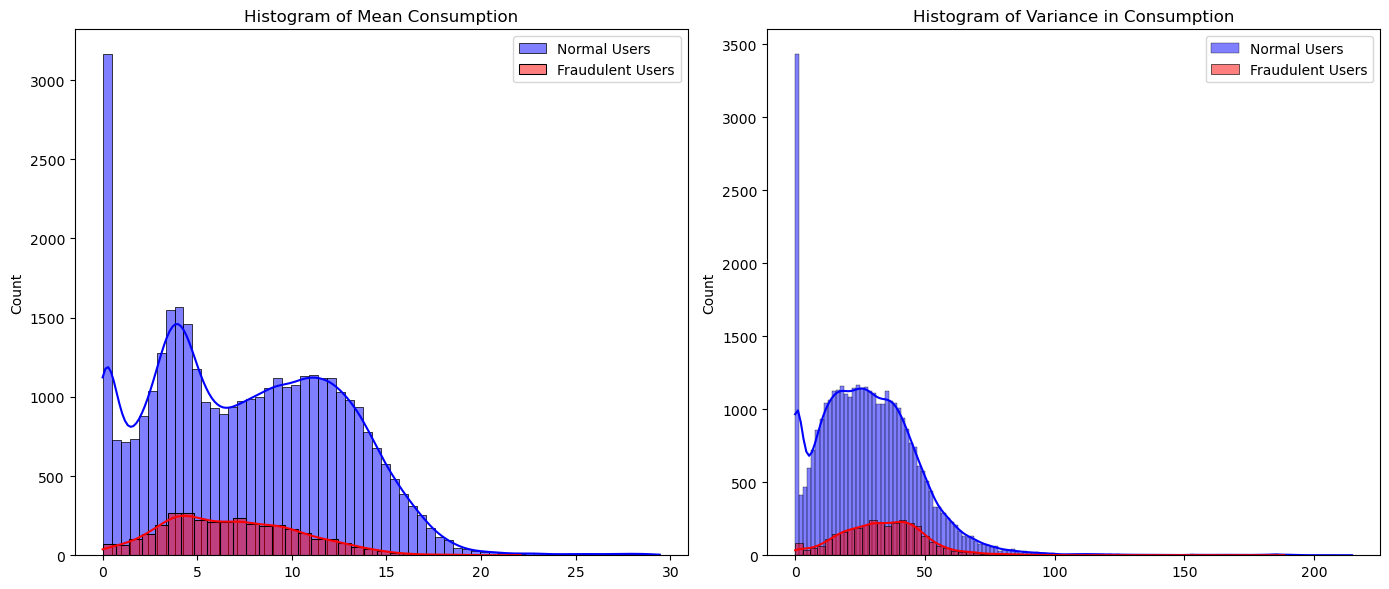

In [931]:
plt.figure(figsize=(14, 6))

# Histogram for Mean Consumption
plt.subplot(1, 2, 1)
sns.histplot(normal_monthly_mean, color='blue', kde=True, label='Normal Users')
sns.histplot(fraudulent_monthly_mean, color='red', kde=True, label='Fraudulent Users')
plt.title('Histogram of Mean Consumption')
plt.legend()

# Histogram for Variance in Consumption
plt.subplot(1, 2, 2)
sns.histplot(normal_monthly_variance, color='blue', kde=True, label='Normal Users')
sns.histplot(fraudulent_monthly_variance, color='red', kde=True, label='Fraudulent Users')
plt.title('Histogram of Variance in Consumption')
plt.legend()

plt.tight_layout()
plt.show()


Along with the bloxplot, there's a noticeable trend in the normal users that difference from fraudulent users. The mean consumption  of normal users are higher and with  less variance in comparison with the

### By Week

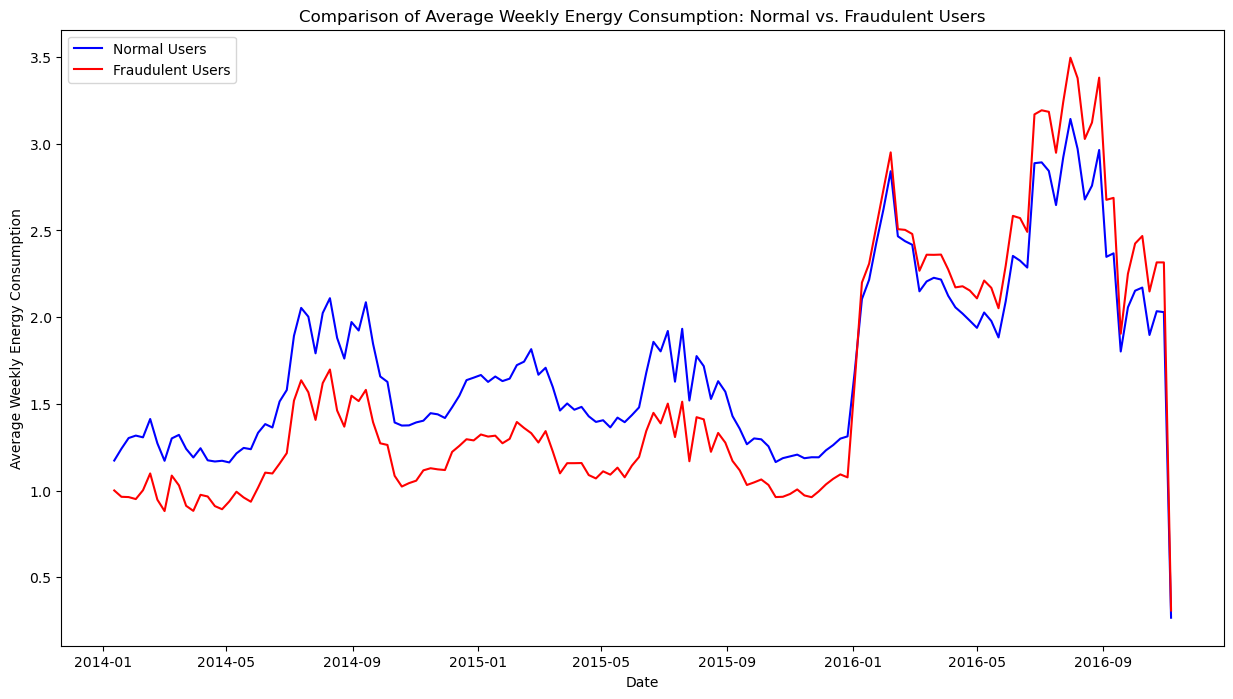

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

# Plot average monthly consumption for normal users
plt.plot(normal_weekly.mean(), label='Normal Users', color='blue')

# Plot average monthly consumption for fraudulent users
plt.plot(fraudulent_weekly.mean(), label='Fraudulent Users', color='red')

plt.xlabel('Date')
plt.ylabel('Average Weekly Energy Consumption')
plt.title('Comparison of Average Weekly Energy Consumption: Normal vs. Fraudulent Users')
plt.legend()
plt.show()

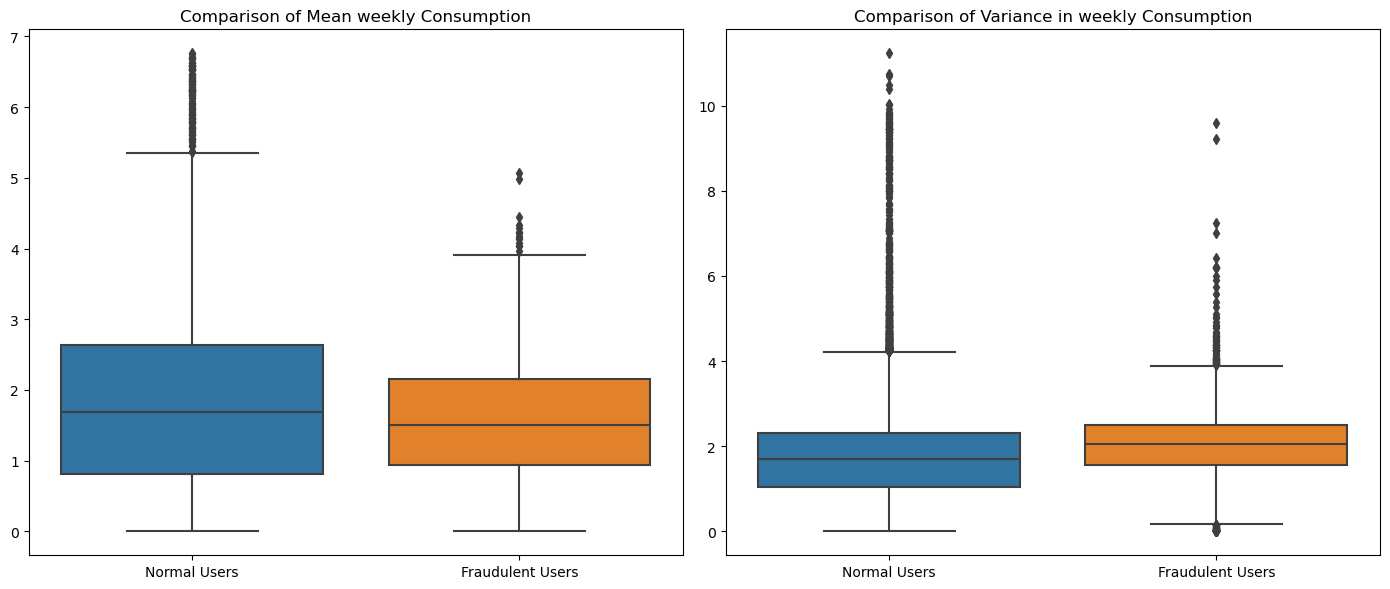

In [932]:
# Combine the data into a single DataFrame for plotting
combined_mean = pd.DataFrame({
    'Normal Users': normal_weekly_mean,
    'Fraudulent Users': fraudulent_weekly_mean
})

combined_variance = pd.DataFrame({
    'Normal Users': normal_weekly_variance,
    'Fraudulent Users': fraudulent_weekly_variance
})

plt.figure(figsize=(14, 6))

# Box plot for Mean Consumption
plt.subplot(1, 2, 1)
sns.boxplot(data=combined_mean)
plt.title('Comparison of Mean weekly Consumption')

# Box plot for Variance in Consumption
plt.subplot(1, 2, 2)
sns.boxplot(data=combined_variance)
plt.title('Comparison of Variance in weekly Consumption')

plt.tight_layout()
plt.show()


c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

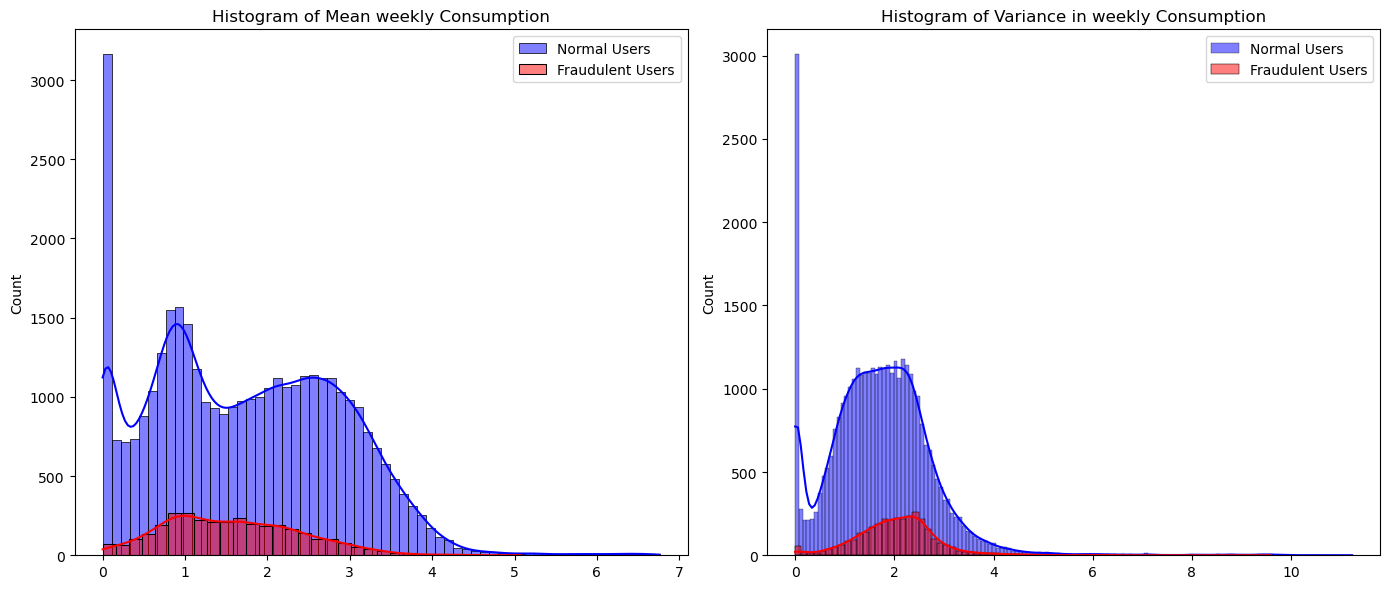

In [933]:
plt.figure(figsize=(14, 6))

# Histogram for Mean Consumption
plt.subplot(1, 2, 1)
sns.histplot(normal_weekly_mean, color='blue', kde=True, label='Normal Users')
sns.histplot(fraudulent_weekly_mean, color='red', kde=True, label='Fraudulent Users')
plt.title('Histogram of Mean weekly Consumption')
plt.legend()

# Histogram for Variance in Consumption
plt.subplot(1, 2, 2)
sns.histplot(normal_weekly_variance, color='blue', kde=True, label='Normal Users')
sns.histplot(fraudulent_weekly_variance, color='red', kde=True, label='Fraudulent Users')
plt.title('Histogram of Variance in weekly Consumption')
plt.legend()

plt.tight_layout()
plt.show()

In [941]:
import numpy as np

# Function to detect spikes
def detect_spikes(data, threshold=0.5):
    # Calculate the percentage change from the previous day
    pct_change = data.pct_change(axis=1)
    
    # Identify where the percentage change exceeds the threshold
    spikes = pct_change > threshold
    
    # Sum the spikes across all days to get the total number of spikes per record
    spike_count = spikes.sum(axis=1)
    
    return spike_count

# Detect spikes for normal and fraudulent users


normal_spikes = detect_spikes(normal_group)
fraudulent_spikes = detect_spikes(fraudulent_group)

# Display the average number of spikes
print("Average number of spikes for normal users:", normal_spikes.mean())
print("Average number of spikes for fraudulent users:", fraudulent_spikes.mean())


Average number of spikes for normal users: 71.72948509485094
Average number of spikes for fraudulent users: 67.3607305936073


c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


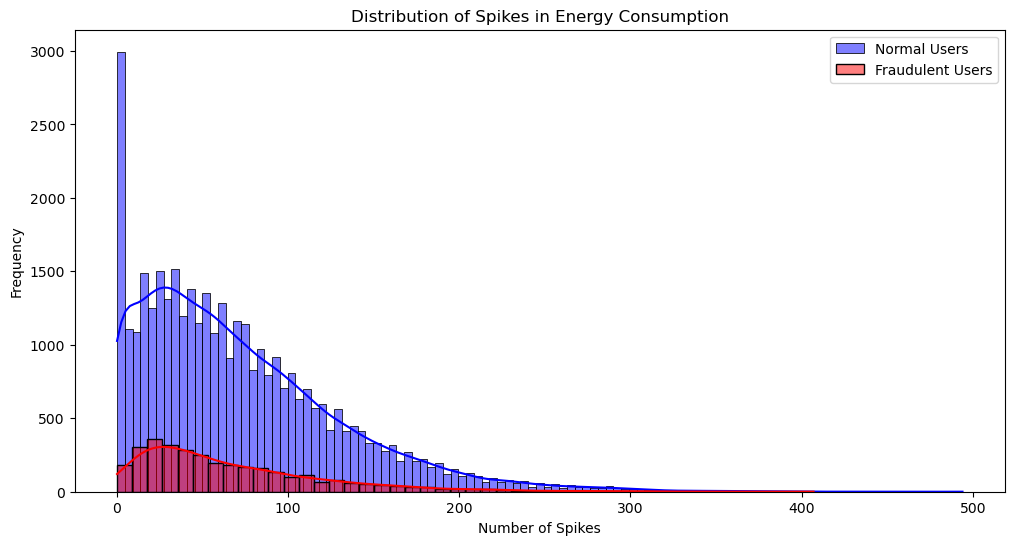

In [942]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine the spike data into a DataFrame for plotting
combined_spikes = pd.DataFrame({
    'Normal Users': normal_spikes,
    'Fraudulent Users': fraudulent_spikes
})

# Plot the distribution of spikes
plt.figure(figsize=(12, 6))

sns.histplot(normal_spikes, color='blue', kde=True, label='Normal Users')
sns.histplot(fraudulent_spikes, color='red', kde=True, label='Fraudulent Users')

plt.title('Distribution of Spikes in Energy Consumption')
plt.xlabel('Number of Spikes')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [8]:
import pandas as pd
import numpy as np

fraudulent_samples_r = fraudulent_samples.values.reshape(fraudulent_samples.shape[0] , -1, 7)  # Shape becomes (42372, 147, 7)

# Step 2: Create the ID column and week number column
row_ids = np.repeat(np.arange(42372), 147)
labels = np.repeat(label.values, 147)
week_numbers = np.tile(np.arange(147), 42372)

# Step 3: Convert the reshaped array into a DataFrame
reshaped_df = pd.DataFrame(
    reshaped_array.reshape(42372 * 147, 7),  # Flatten the first two dimensions
    columns=[f'Day_{i+1}' for i in range(7)]  # Name the columns as Day_1 to Day_7
)

# Step 4: Add the ID and week number columns
reshaped_df['ID'] = row_ids
reshaped_df['Week'] = week_numbers

# Step 5: Reorder the columns to have 'ID', 'Week', followed by 'Day_1' to 'Day_7'
reshaped_df = reshaped_df[['ID', 'Week'] + [f'Day_{i+1}' for i in range(7)]]

# Display the first few rows to verify
reshaped_df


ID  Week     Day_1     Day_2     Day_3     Day_4     Day_5  \
0            0     0  0.000000  0.000000  0.000000  0.000000  0.000000   
1            0     1  0.000000  0.000000  0.000000  0.000000  0.000000   
2            0     2  0.000000  0.000000  0.000000  0.000000  0.000000   
3            0     3  0.000000  0.000000  0.000000  0.000000  0.000000   
4            0     4  0.000000  0.000000  0.000000  0.000000  0.000000   
...        ...   ...       ...       ...       ...       ...       ...   
6228679  42371   142  0.559190  0.397107  0.485450  0.516825  0.697470   
6228680  42371   143  0.822851  0.805737  0.778624  0.804689  0.736375   
6228681  42371   144  0.483092  0.609788  0.581090  0.579861  0.740741   
6228682  42371   145  0.784142  0.837463  0.836025  0.868875  0.787571   
6228683  42371   146  0.746099  0.618357  0.688317  0.689558  0.829563   

            Day_6     Day_7  
0        0.000000  0.000000  
1        0.000000  0.000000  
2        0.000000  0.000000  
3        0.000000  0.000000  
4        0.000000  0.000000  
...           ...       ...  
6228679  0.808845  0.702858  
6228680  0.688073  0.571044  
6228681  0.797448  0.888898  
6228682  0.888901  0.742727  
6228683  0.679293  0.573611  

[6228684 rows x 9 columns]

In [9]:
len(labels)

6228684

In [19]:
# save_file(reshaped_df, 'datasets/sgcc_interpolation_byweek', 'full_dataset')
# save_file(labels, 'datasets/sgcc_interpolation_byweek', 'full_dataset_label')

save_file(extracted_features, 'datasets/sgcc_interpolation_byweek', 'tsfresh_features')

Data saved to datasets/sgcc_interpolation_byweek\tsfresh_features.pkl


In [87]:
# df = load_file('datasets/sgcc_rows50removed_interpolation_quantiletransform', 'full_dataset')
# label = load_file('datasets/sgcc_rows50removed_interpolation_quantiletransform', 'full_dataset_label')

features = load_file('D:\TFM\Datasets\sgcc_interpolation', 'full_dataset')
reshaped_df = load_file('D:\TFM\Datasets\sgcc_interpolation_byweek', 'full_dataset')
label = load_file('D:\TFM\Datasets\sgcc_interpolation', 'full_dataset_label')

In [54]:
reshaped_df['ID'].unique()

array([    0,     1,     2, ..., 42369, 42370, 42371])

## Extract features with TSFRESH [All sequence]

For extraction, we need to reshape the dataset. This dataset contains the value of a single measuremente (energy consumption) along 1029 days (time steps) per each user. So, we change the shape to 3 columns: id, Day, Value. Then, we run the extract_feature to get the features from all the sequence.

In [67]:
df_red_processed_tsfresh = X_test.copy()
df_red_processed_tsfresh.columns = range(1, len(X_train_aug.columns)+1)
df_red_processed_tsfresh

1         2         3         4     \
CONS_NO                                                                    
0A25E8A9222403E20480C8B5392EF244  0.000000  0.000000  0.000000  0.000000   
E8F9050C987F7DC63F5C128C0E244BE0  0.468626  0.237974  0.541849  0.091529   
D4F06660FE8F58A222CE49793C786488  0.000000  0.000000  0.000000  0.000000   
A380D4F0CC1AA8F550AEAF30EFD3086E  0.000000  0.000000  0.000000  0.000000   
8A5E2CF45E1928C5BE658FB4B344F604  0.000000  0.000000  0.000000  0.000000   
...                                    ...       ...       ...       ...   
F82FFFB92EEC6CBB0E308FC812AADB61  0.000000  0.000000  0.000000  0.000000   
F71ACF5D9448DD3CEB1891DEC6FE9DAF  0.000000  0.000000  0.000000  0.000000   
73AB30A34E2110C36F11D55533303A9D  0.000000  0.000000  0.000000  0.000000   
33DC09D91E7570C38B414D3297618FB0  0.479149  0.635918  0.836367  0.533817   
BCBD43FB29A252F48FB5D6E2DFE0C5EB  0.000000  0.000000  0.000000  0.000000   

                                      5         6         7         8     \
CONS_NO                                                                    
0A25E8A9222403E20480C8B5392EF244  0.000000  0.000000  0.000000  0.000000   
E8F9050C987F7DC63F5C128C0E244BE0  0.076884  0.054917  0.058578  0.054917   
D4F06660FE8F58A222CE49793C786488  0.000000  0.000000  0.000000  0.000000   
A380D4F0CC1AA8F550AEAF30EFD3086E  0.000000  0.000000  0.000000  0.000000   
8A5E2CF45E1928C5BE658FB4B344F604  0.000000  0.000000  0.000000  0.000000   
...                                    ...       ...       ...       ...   
F82FFFB92EEC6CBB0E308FC812AADB61  0.000000  0.000000  0.000000  0.000000   
F71ACF5D9448DD3CEB1891DEC6FE9DAF  0.000000  0.000000  0.000000  0.000000   
73AB30A34E2110C36F11D55533303A9D  0.000000  0.000000  0.000000  0.000000   
33DC09D91E7570C38B414D3297618FB0  0.627878  0.701037  0.582858  0.641545   
BCBD43FB29A252F48FB5D6E2DFE0C5EB  0.000000  0.000000  0.000000  0.000000   

                                      9         10    ...      1020      1021  \
CONS_NO                                               ...                       
0A25E8A9222403E20480C8B5392EF244  0.000000  0.000000  ...  0.070697  0.072808   
E8F9050C987F7DC63F5C128C0E244BE0  0.109834  0.073223  ...  0.281908  0.252619   
D4F06660FE8F58A222CE49793C786488  0.000000  0.000000  ...  0.401264  0.367984   
A380D4F0CC1AA8F550AEAF30EFD3086E  0.000000  0.000000  ...  0.454152  0.452576   
8A5E2CF45E1928C5BE658FB4B344F604  0.000000  0.000000  ...  0.663272  0.559403   
...                                    ...       ...  ...       ...       ...   
F82FFFB92EEC6CBB0E308FC812AADB61  0.000000  0.000000  ...  0.406967  0.501889   
F71ACF5D9448DD3CEB1891DEC6FE9DAF  0.000000  0.000000  ...  0.000000  0.000000   
73AB30A34E2110C36F11D55533303A9D  0.000000  0.000000  ...  0.720869  0.236318   
33DC09D91E7570C38B414D3297618FB0  0.712560  0.828596  ...  0.414834  0.380800   
BCBD43FB29A252F48FB5D6E2DFE0C5EB  0.000000  0.000000  ...  0.341854  0.334117   

                                      1022      1023      1024      1025  \
CONS_NO                                                                    
0A25E8A9222403E20480C8B5392EF244  0.071753  0.069642  0.070697  0.070697   
E8F9050C987F7DC63F5C128C0E244BE0  0.212346  0.245297  0.259941  0.263602   
D4F06660FE8F58A222CE49793C786488  0.389854  0.299522  0.260536  0.282406   
A380D4F0CC1AA8F550AEAF30EFD3086E  0.464652  0.520130  0.440851  0.481628   
8A5E2CF45E1928C5BE658FB4B344F604  0.608282  0.676171  0.537678  0.524100   
...                                    ...       ...       ...       ...   
F82FFFB92EEC6CBB0E308FC812AADB61  0.507345  0.409149  0.354596  0.457156   
F71ACF5D9448DD3CEB1891DEC6FE9DAF  0.000000  0.000000  0.000000  0.000000   
73AB30A34E2110C36F11D55533303A9D  0.227051  0.469326  0.307147  0.303837   
33DC09D91E7570C38B414D3297618FB0  0.377852  0.437344  0.449403  0.418853   
BCBD43FB29A252F48FB5D6E2DFE0C5EB  0.374975  0.259654  0.199938  0.257478   

                 

In [68]:
df_red_processed_tsfresh.reset_index(inplace=True)
df_red_processed_tsfresh

CONS_NO         1         2         3  \
0     0A25E8A9222403E20480C8B5392EF244  0.000000  0.000000  0.000000   
1     E8F9050C987F7DC63F5C128C0E244BE0  0.468626  0.237974  0.541849   
2     D4F06660FE8F58A222CE49793C786488  0.000000  0.000000  0.000000   
3     A380D4F0CC1AA8F550AEAF30EFD3086E  0.000000  0.000000  0.000000   
4     8A5E2CF45E1928C5BE658FB4B344F604  0.000000  0.000000  0.000000   
...                                ...       ...       ...       ...   
8032  F82FFFB92EEC6CBB0E308FC812AADB61  0.000000  0.000000  0.000000   
8033  F71ACF5D9448DD3CEB1891DEC6FE9DAF  0.000000  0.000000  0.000000   
8034  73AB30A34E2110C36F11D55533303A9D  0.000000  0.000000  0.000000   
8035  33DC09D91E7570C38B414D3297618FB0  0.479149  0.635918  0.836367   
8036  BCBD43FB29A252F48FB5D6E2DFE0C5EB  0.000000  0.000000  0.000000   

             4         5         6         7         8         9  ...  \
0     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  ...   
1     0.091529  0.076884  0.054917  0.058578  0.054917  0.109834  ...   
2     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  ...   
3     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  ...   
4     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  ...   
...        ...       ...       ...       ...       ...       ...  ...   
8032  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  ...   
8033  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  ...   
8034  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  ...   
8035  0.533817  0.627878  0.701037  0.582858  0.641545  0.712560  ...   
8036  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  ...   

          1020      1021      1022      1023      1024      1025      1026  \
0     0.070697  0.072808  0.071753  0.069642  0.070697  0.070697  0.072808   
1     0.281908  0.252619  0.212346  0.245297  0.259941  0.263602  0.285569   
2     0.401264  0.367984  0.389854  0.299522  0.260536  0.282406  0.379394   
3     0.454152  0.452576  0.464652  0.520130  0.440851  0.481628  0.435776   
4     0.663272  0.559403  0.608282  0.676171  0.537678  0.524100  0.413442   
...        ...       ...       ...       ...       ...       ...       ...   
8032  0.406967  0.501889  0.507345  0.409149  0.354596  0.457156  0.386237   
8033  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8034  0.720869  0.236318  0.227051  0.469326  0.307147  0.303837  0.413060   
8035  0.414834  0.380800  0.377852  0.437344  0.449403  0.418853  0.458247   
8036  0.341854  0.334117  0.374975  0.259654  0.199938  0.257478  0.181564   

          1027      1028      1029  
0     0.104463  0.096022  0.067532  
1     0.516221  0.717584  0.369775  
2     0.359426  0.315687  0.312834  
3     0.443476  0.481803  0.419325  
4     0.521385  0.599457  0.573659  
...        ...       ...       ...  
8032  0.453882  0.318591  0.583719  
8033  0.000000  0.000000  0.000000  
8034  0.630843  0.146292  0.170122  
8035  0.396611  0.447795  0.392859  
8036  0.190026  0.276094  0.232576  

[8037 rows x 1030 columns]

In [69]:
df_red_processed_tsfresh.drop('CONS_NO', axis=1, inplace=True)
df_red_processed_tsfresh.reset_index(inplace=True)
df_red_processed_tsfresh.rename(columns={'index': 'id'}, inplace=True)
df_red_processed_tsfresh

id         1         2         3         4         5         6  \
0        0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1        1  0.468626  0.237974  0.541849  0.091529  0.076884  0.054917   
2        2  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3        3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4        4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...    ...       ...       ...       ...       ...       ...       ...   
8032  8032  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8033  8033  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8034  8034  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8035  8035  0.479149  0.635918  0.836367  0.533817  0.627878  0.701037   
8036  8036  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

             7         8         9  ...      1020      1021      1022  \
0     0.000000  0.000000  0.000000  ...  0.070697  0.072808  0.071753   
1     0.058578  0.054917  0.109834  ...  0.281908  0.252619  0.212346   
2     0.000000  0.000000  0.000000  ...  0.401264  0.367984  0.389854   
3     0.000000  0.000000  0.000000  ...  0.454152  0.452576  0.464652   
4     0.000000  0.000000  0.000000  ...  0.663272  0.559403  0.608282   
...        ...       ...       ...  ...       ...       ...       ...   
8032  0.000000  0.000000  0.000000  ...  0.406967  0.501889  0.507345   
8033  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000   
8034  0.000000  0.000000  0.000000  ...  0.720869  0.236318  0.227051   
8035  0.582858  0.641545  0.712560  ...  0.414834  0.380800  0.377852   
8036  0.000000  0.000000  0.000000  ...  0.341854  0.334117  0.374975   

          1023      1024      1025      1026      1027      1028      1029  
0     0.069642  0.070697  0.070697  0.072808  0.104463  0.096022  0.067532  
1     0.245297  0.259941  0.263602  0.285569  0.516221  0.717584  0.369775  
2     0.299522  0.260536  0.282406  0.379394  0.359426  0.315687  0.312834  
3     0.520130  0.440851  0.481628  0.435776  0.443476  0.481803  0.419325  
4     0.676171  0.537678  0.524100  0.413442  0.521385  0.599457  0.573659  
...        ...       ...       ...       ...       ...       ...       ...  
8032  0.409149  0.354596  0.457156  0.386237  0.453882  0.318591  0.583719  
8033  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
8034  0.469326  0.307147  0.303837  0.413060  0.630843  0.146292  0.170122  
8035  0.437344  0.449403  0.418853  0.458247  0.396611  0.447795  0.392859  
8036  0.259654  0.199938  0.257478  0.181564  0.190026  0.276094  0.232576  

[8037 rows x 1030 columns]

In [54]:
reshaped_df = pd.melt(df_red_processed_tsfresh, id_vars='id', var_name='Day', value_name='Value')
reshaped_df

id   Day     Value
0             0     1  0.123286
1             1     1  0.000000
2             2     1  0.424938
3             3     1  0.621364
4             4     1  0.000000
...         ...   ...       ...
60752155  59035  1029  0.236269
60752156  59036  1029  0.304723
60752157  59037  1029  0.205822
60752158  59038  1029  0.237885
60752159  59039  1029  0.791012

[60752160 rows x 3 columns]

In [55]:
reshaped_df.sort_values(by=['id', 'Day'], inplace=True)
reshaped_df

id   Day     Value
0             0     1  0.123286
59040         0     2  0.063118
118080        0     3  0.106769
177120        0     4  0.139213
236160        0     5  0.185224
...         ...   ...       ...
60515999  59039  1025  0.784354
60575039  59039  1026  0.758463
60634079  59039  1027  0.784942
60693119  59039  1028  0.796495
60752159  59039  1029  0.791012

[60752160 rows x 3 columns]

In [56]:
reshaped_df.reset_index(drop=True, inplace=True)
reshaped_df

id   Day     Value
0             0     1  0.123286
1             0     2  0.063118
2             0     3  0.106769
3             0     4  0.139213
4             0     5  0.185224
...         ...   ...       ...
60752155  59039  1025  0.784354
60752156  59039  1026  0.758463
60752157  59039  1027  0.784942
60752158  59039  1028  0.796495
60752159  59039  1029  0.791012

[60752160 rows x 3 columns]

In [71]:
def reshape_for_tsfresh(df, isAugmented=False):
    df_red_processed_tsfresh = df.copy()
    df_red_processed_tsfresh.columns = range(1, len(df.columns)+1)
    df_red_processed_tsfresh.reset_index(inplace=True)
    
    if isAugmented == False:
        df_red_processed_tsfresh.drop('CONS_NO', axis=1, inplace=True)
        df_red_processed_tsfresh.reset_index(inplace=True)
    
    df_red_processed_tsfresh.rename(columns={'index': 'id'}, inplace=True)
    
    reshaped_df = pd.melt(df_red_processed_tsfresh, id_vars='id', var_name='Day', value_name='Value')
    reshaped_df.sort_values(by=['id', 'Day'], inplace=True)
    reshaped_df.reset_index(drop=True, inplace=True)
    
    return reshaped_df

In [72]:
reshaped_df = reshape_for_tsfresh(X_test)

In [73]:
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute

extracted_features_xtest = extract_features(reshaped_df, column_id="id", column_sort="Day", impute_function=impute)

Feature Extraction: 100%|██████████| 50/50 [28:52<00:00, 34.66s/it]   


In [75]:
extracted_features_xtest

Value__variance_larger_than_standard_deviation  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   
...                                              ...   
8032                                             0.0   
8033                                             0.0   
8034                                             0.0   
8035                                             0.0   
8036                                             0.0   

      Value__has_duplicate_max  Value__has_duplicate_min  \
0                          1.0                       1.0   
1                          1.0                       1.0   
2                          1.0                       1.0   
3                          0.0                       1.0   
4                          0.0                       1.0   
...                        ...                       ...   
8032                       1.0                       1.0   
8033                       1.0                       1.0   
8034                       1.0                       1.0   
8035                       1.0                       1.0   
8036                       1.0                       1.0   

      Value__has_duplicate  Value__sum_values  Value__abs_energy  \
0                      1.0          63.402190          27.794017   
1                      1.0         359.658513         157.610403   
2                      1.0         273.354954         148.796111   
3                      1.0         140.439414          71.867923   
4                      1.0         180.261371         117.540411   
...                    ...                ...                ...   
8032                   1.0         425.460630         253.105932   
8033                   1.0           0.000000           0.000000   
8034                   1.0         373.068712         186.134573   
8035                   1.0         349.540915         200.459516   
8036                   1.0         120.723166          58.593710   

      Value__mean_abs_change  Value__mean_change  \
0                   0.011197            0.000066   
1                   0.104604           -0.000096   
2                   0.070724            0.000304   
3                   0.027961            0.000408   
4                   0.025831            0.000558   
...                      ...                 ...   
8032                0.107257            0.000568   
8033                0.000000            0.000000   
8034                0.116671            0.000165   
8035                0.075973           -0.000084   
8036                0.026637            0.000226   

      Value__mean_second_derivative_central  Value__median  ...  \
0                                 -0.000014       0.000000  ...   
1                                 -0.000057       0.307536  ...   
2                                 -0.000001       0.271947  ...   
3                                 -0.000030       0.000000  ...   
4                                 -0.000013       0.000000  ...   
...                                     ...            ...  ...   
8032                               0.000129       0.486614  ...   
8033                               0.000000       0.000000  ...   
8034                               0.000012       0.379962  ...   
8035                              -0.000103       0.396343  ...   
8036                              -0.000021       0.000000  ...   

      Value__fourier_entropy__bins_5  Value__fourier_entropy__bins_10  \
0                           0.170467                         0.215617   
1                           0.297869                         0.630050   
2                           0.125256                         0.181214   
3                           0.215617                         0.226363   


In [74]:
extracted_features_xtest.shape, y_test.shape

((8037, 783), (8037,))

In [78]:
save_file(important_features_test, 'features', 'important_features_xtest')
save_file(y_test, 'features', 'features_extracted_xtest_labels')

Data saved to features\important_features_xtest.pkl
Data saved to features\features_extracted_xtest_labels.pkl


In [344]:
# Paso 1: Extraer características del conjunto de prueba
extracted_features_test = extract_features(reshaped_df, column_id="id", column_sort="Day", impute_function=impute)

Feature Extraction: 100%|██████████| 50/50 [13:16<00:00, 15.93s/it]  


In [345]:
extracted_features_test

Value__variance_larger_than_standard_deviation  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   
...                                              ...   
8032                                             0.0   
8033                                             0.0   
8034                                             0.0   
8035                                             0.0   
8036                                             0.0   

      Value__has_duplicate_max  Value__has_duplicate_min  \
0                          1.0                       1.0   
1                          1.0                       1.0   
2                          1.0                       1.0   
3                          0.0                       1.0   
4                          0.0                       1.0   
...                        ...                       ...   
8032                       1.0                       1.0   
8033                       1.0                       1.0   
8034                       1.0                       1.0   
8035                       1.0                       1.0   
8036                       1.0                       1.0   

      Value__has_duplicate  Value__sum_values  Value__abs_energy  \
0                      1.0          63.402190          27.794017   
1                      1.0         359.658513         157.610403   
2                      1.0         273.354954         148.796111   
3                      1.0         140.439414          71.867923   
4                      1.0         180.261371         117.540411   
...                    ...                ...                ...   
8032                   1.0         425.460630         253.105932   
8033                   1.0           0.000000           0.000000   
8034                   1.0         373.068712         186.134573   
8035                   1.0         349.540915         200.459516   
8036                   1.0         120.723166          58.593710   

      Value__mean_abs_change  Value__mean_change  \
0                   0.011197            0.000066   
1                   0.104604           -0.000096   
2                   0.070724            0.000304   
3                   0.027961            0.000408   
4                   0.025831            0.000558   
...                      ...                 ...   
8032                0.107257            0.000568   
8033                0.000000            0.000000   
8034                0.116671            0.000165   
8035                0.075973           -0.000084   
8036                0.026637            0.000226   

      Value__mean_second_derivative_central  Value__median  ...  \
0                                 -0.000014       0.000000  ...   
1                                 -0.000057       0.307536  ...   
2                                 -0.000001       0.271947  ...   
3                                 -0.000030       0.000000  ...   
4                                 -0.000013       0.000000  ...   
...                                     ...            ...  ...   
8032                               0.000129       0.486614  ...   
8033                               0.000000       0.000000  ...   
8034                               0.000012       0.379962  ...   
8035                              -0.000103       0.396343  ...   
8036                              -0.000021       0.000000  ...   

      Value__fourier_entropy__bins_5  Value__fourier_entropy__bins_10  \
0                           0.170467                         0.215617   
1                           0.297869                         0.630050   
2                           0.125256                         0.181214   
3                           0.215617                         0.226363   


### Selecting features

In [65]:
from tsfresh import select_features

important_features_xtraingau = select_features(extracted_features_xtrainaug, y_train_aug)
important_features_xtraingau

Value__change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.4  \
0                                               0.006808                  
1                                               0.004001                  
2                                               0.009337                  
3                                               0.006553                  
4                                               0.004338                  
...                                                  ...                  
59035                                           0.005812                  
59036                                           0.003880                  
59037                                           0.005319                  
59038                                           0.006409                  
59039                                           0.002068                  

       Value__fft_coefficient__attr_"abs"__coeff_86  \
0                                          0.276987   
1                                          1.879246   
2                                          8.837819   
3                                          1.468696   
4                                          3.461560   
...                                             ...   
59035                                      5.330958   
59036                                      8.131654   
59037                                      6.597195   
59038                                      1.530291   
59039                                      2.662739   

       Value__change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.4  \
0                                               0.015743                   
1                                               0.004775                   
2                                               0.018042                   
3                                               0.015509                   
4                                               0.009187                   
...                                                  ...                   
59035                                           0.013075                   
59036                                           0.007062                   
59037                                           0.012071                   
59038                                           0.011119                   
59039                                           0.002338                   

       Value__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.4  \
0                                               0.094546                   
1                                               0.027840                   
2                                               0.093407                   
3                                               0.094638                   
4                                               0.069642                   
...                                                  ...                   
59035                                           0.085230                   
59036                                           0.056417                   
59037                                           0.082171                   
59038                                           0.068636                   
59039                                           0.016444                   

       Value__linear_trend__attr_"stderr"  \
0                                0.000018   
1                                0.000017   
2                                0.000019   
3                                0.000018   
4                                0.000017   
...                                   ...   
59035                            0.000021   
59036                            0.000021   
59037                            0.000022   
59038                            0.000022   
59039                            0.000015   

       Value__fft_coefficient__attr_"abs"__coeff_84  \
0                      

In [77]:
important_features_test = extracted_features_xtest[important_features_xtraingau.columns]
important_features_test

Value__change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.4  \
0                                              0.001979                  
1                                              0.024219                  
2                                              0.012081                  
3                                              0.005069                  
4                                              0.004428                  
...                                                 ...                  
8032                                           0.010914                  
8033                                           0.000000                  
8034                                           0.010951                  
8035                                           0.007555                  
8036                                           0.003884                  

      Value__fft_coefficient__attr_"abs"__coeff_86  \
0                                         1.922194   
1                                         1.310309   
2                                         1.547942   
3                                         5.147942   
4                                         3.467066   
...                                            ...   
8032                                      1.899490   
8033                                      0.000000   
8034                                      7.029964   
8035                                      4.717994   
8036                                      2.559983   

      Value__change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.4  \
0                                              0.002104                   
1                                              0.039948                   
2                                              0.017083                   
3                                              0.005851                   
4                                              0.005095                   
...                                                 ...                   
8032                                           0.027605                   
8033                                           0.000000                   
8034                                           0.025001                   
8035                                           0.018213                   
8036                                           0.004594                   

      Value__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.4  \
0                                              0.011197                   
1                                              0.125419                   
2                                              0.070724                   
3                                              0.027961                   
4                                              0.025831                   
...                                                 ...                   
8032                                           0.129198                   
8033                                           0.000000                   
8034                                           0.118541                   
8035                                           0.103255                   
8036                                           0.026637                   

      Value__linear_trend__attr_"stderr"  \
0                               0.000014   
1                               0.000018   
2                               0.000027   
3                               0.000016   
4                               0.000021   
...                                  ...   
8032                            0.000023   
8033                            0.000000   
8034                            0.000022   
8035                            0.000029   
8036                            0.000016   

      Value__fft_coefficient__attr_"abs"__coeff_84  \
0                                         1.899910   
1                            

In [ ]:
# Paso 3: Usar el FeatureSelector para seleccionar las mismas características en el conjunto de prueba
important_features_test = feature_selector.transform(extracted_features_test)

In [ ]:
# Opcional: Si necesitas asegurarte de que las columnas están en el mismo orden
important_features_test = important_features_test[important_features.columns]

# Verificación
print(f"Características en conjunto de entrenamiento: {important_features.shape[1]}")
print(f"Características en conjunto de prueba: {important_features_test.shape[1]}")
print(f"¿Las columnas son idénticas? {list(important_features.columns) == list(important_features_test.columns)}")

In [335]:
important_features

Value__change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.4  \
0                                                              0.006808   
1                                                              0.004001   
2                                                              0.009337   
3                                                              0.006553   
4                                                              0.004338   
...                                                                 ...   
59035                                                          0.005812   
59036                                                          0.003880   
59037                                                          0.005319   
59038                                                          0.006409   
59039                                                          0.002068   

       Value__fft_coefficient__attr_"abs"__coeff_86  \
0                                          0.276987   
1                                          1.879246   
2                                          8.837819   
3                                          1.468696   
4                                          3.461560   
...                                             ...   
59035                                      5.330958   
59036                                      8.131654   
59037                                      6.597195   
59038                                      1.530291   
59039                                      2.662739   

       Value__change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.4  \
0                                                               0.015743   
1                                                               0.004775   
2                                                               0.018042   
3                                                               0.015509   
4                                                               0.009187   
...                                                                  ...   
59035                                                           0.013075   
59036                                                           0.007062   
59037                                                           0.012071   
59038                                                           0.011119   
59039                                                           0.002338   

       Value__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.4  \
0                                                               0.094546   
1                                                               0.027840   
2                                                               0.093407   
3                                                               0.094638   
4                                                               0.069642   
...                                                                  ...   
59035                                                           0.085230   
59036                                                           0.056417   
59037                                                           0.082171   
59038                                                           0.068636   
59039                                                           0.016444   

       Value__linear_trend__attr_"stderr"  \
0                                0.000018   
1                                0.000017   
2                                0.000019   
3                                0.000018   
4                                0.000017   
...                                   ...   
59035                            0.000021   
59036                            0.000021   
59037                            0.000022   
59038                            0.000022   
59039                            0.000015   

       Value__fft_coefficient__attr_"abs"__coeff_84  \
0                      

After selecting, the features decreased from 783 to 492

In [358]:
save_file(extracted_features_test, 'features', 'tsfresh_important_features_from_test')

Data saved to features\tsfresh_important_features_from_test.pkl


In [ ]:
load_file('features', 'tsfresh_important_features_from_test')

In [1054]:
# df_red_processed_tsfresh.drop('id', axis=1)
# df_red_processed
len(label_red_processed_tsfresh)

40185

In [1047]:
full_features = pd.concat([df_red_processed_tsfresh.drop('id', axis=1), extracted_features], axis=1)
full_features

1         2         3         4         5         6         7  \
0      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3      0.204839  0.181100  0.140898  0.135155  0.130944  0.145876  0.175357   
4      0.027877  0.019514  0.047391  0.032059  0.073875  0.062724  0.071087   
...         ...       ...       ...       ...       ...       ...       ...   
40180  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
40181  0.604810  0.319581  0.420556  0.591277  0.456991  0.411187  0.000000   
40182  0.197196  0.127177  0.100027  0.175762  0.120033  0.230062  0.128606   
40183  0.463416  0.473491  0.636004  0.327149  0.366915  0.357902  0.387064   
40184  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

              8         9        10  ...  Value__fourier_entropy__bins_5  \
0      0.000000  0.000000  0.000000  ...                        0.155665   
1      0.000000  0.000000  0.000000  ...                        0.136002   
2      0.000000  0.000000  0.000000  ...                        0.190068   
3      0.136304  0.162722  0.147790  ...                        0.136002   
4      0.183990  0.098964  0.016726  ...                        0.136002   
...         ...       ...       ...  ...                             ...   
40180  0.000000  0.000000  0.000000  ...                        0.090729   
40181  0.000000  0.000000  0.000000  ...                        0.367289   
40182  0.085738  0.117175  0.127177  ...                        0.090729   
40183  0.383352  0.327149  0.407478  ...                        0.170467   
40184  0.000000  0.000000  0.000000  ...                        0.090729   

       Value__fourier_entropy__bins_10  Value__fourier_entropy__bins_100  \
0                             0.215617                          0.785939   
1                             0.245901                          1.306531   
2                             0.260704                          1.195611   
3                             0.181214                          0.941461   
4                             0.215617                          1.599767   
...                                ...                               ...   
40180                         0.136002                          1.369528   
40181                         0.670268                          2.602705   
40182                         0.136002                          0.856980   
40183                         0.215617                          1.007181   
40184                         0.200814                          1.216406   

       Value__permutation_entropy__dimension_3__tau_1  \
0                                            1.452301   
1                                           -0.000000   
2                                            1.231463   
3                                            1.765519   
4                                            1.672325   
...                                               ...   
40180                                        1.671342   
40181                                        1.768505   
40182                                        1.771365   
40183                                        1.738764   
40184                                        0.938448   

       Value__permutation_entropy__dimension_4__tau_1  \
0                                            2.389984   
1                                           -0.000000   
2                                            1.972190   
3                                            3.088785   
4                                            2.871742   
...                                               ...   
40180                                        2.875062   
40181                                        3.108650   
40182                                    

In [1066]:
label_red.values[-90:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [1067]:
label_red_processed_tsfresh[-90:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

# ML Trainings

## Split dataset

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                                important_features,
                                                label_red.values,
                                                test_size=.2,
                                                random_state=42,
                                                stratify= label_red.values,
                                                shuffle=True)

In [4]:
y_train.sum(), y_test.sum()

(2628, 657)

## Pipeline

In [89]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

directory_data = 'datasets/sgcc_processed'
directory_labels = 'datasets/sgcc_processed'
dataset_name = 'data'
label_name = 'labels'

augmented = False

df_red_processed = load_file(directory_data, dataset_name)
label_red = load_file(directory_labels, label_name)

classifiers = [
    # RandomForestClassifier(random_state=42, class_weight = "balanced"),
    # XGBClassifier(random_state=42),
    # LogisticRegression(random_state=42, class_weight = "balanced"),
    # GradientBoostingClassifier(random_state=42),

    VotingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(random_state=42)),
            ('lr', LogisticRegression(random_state=42, class_weight='balanced')),
            ('xgb', XGBClassifier(random_state=42))
        ],
        # ('gb', GradientBoostingClassifier(random_state=42))],
        voting='hard'  # 'soft' for probability-based voting, 'hard' for majority voting
    )
]

print(f"Directory: {directory_data}")
print(f"Dataset name: {dataset_name} - Label name: {label_name}")
print(f'Dataset Shape: {df_red_processed.shape} - Label Shape: {label_red.shape}')

X_train, X_test, y_train, y_test = train_test_split(
                                                df_red_processed,
                                                label_red.values,
                                                test_size=.2,
                                                random_state=42,
                                                stratify= label_red.values,
                                                shuffle=True)

# important_features_xtraingau.shape, y_train_aug.shape, important_features_test.shape, y_test.shape
# X_train, X_test, y_train, y_test = important_features_xtraingau, important_features_test, y_train_aug, y_test

print(f'Augmented: {augmented}')
if(augmented):
    
    #Testing the same strategy as the article
    from collections import Counter
    from imblearn.over_sampling import SMOTE

    sm = SMOTE(random_state=42)
    X_train_aug, y_train_aug = sm.fit_resample(X_train, y_train)
    print(f"Original dataset shape {Counter(y_train)}")
    print(f"Resampled dataset shape {Counter(y_train_aug)}")
    X_train = X_train_aug
    y_train = y_train_aug
    
    

print(f"Train shape: {X_train.shape} - Test shape: {X_test.shape}")

for clf in classifiers:
    print(f'\nTraining classifier {clf.__class__.__name__} ...')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print('AUC:', roc_auc_score(y_test, y_pred))
    print("------")

Directory: datasets/sgcc_processed
Dataset name: data - Label name: labels
Dataset Shape: (40185, 1029) - Label Shape: (40185,)
Augmented: False
Train shape: (32148, 1029) - Test shape: (8037, 1029)

Training classifier VotingClassifier ...


c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      7380
           1       0.69      0.11      0.19       657

    accuracy                           0.92      8037
   macro avg       0.81      0.55      0.57      8037
weighted avg       0.91      0.92      0.90      8037

[[7348   32]
 [ 585   72]]
AUC: 0.5526264988677284
------


## Decision Tree

In [381]:
from sklearn.tree import DecisionTreeClassifier

classifier_full = DecisionTreeClassifier(random_state=42, class_weight='balanced')
classifier_full.fit(X_train, y_train)

y_pred = classifier_full.predict(X_test)

In [382]:
matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print('AUC: {:.3} --'.format(roc_auc_score(y_test,y_pred)), end='')

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      7347
           1       0.15      0.13      0.14       690

    accuracy                           0.86      8037
   macro avg       0.53      0.53      0.53      8037
weighted avg       0.85      0.86      0.86      8037

AUC: 0.53 --

Results with important_features for Fraudulent records:
* f1-score: 0.22
* recall: 0.24
* Precision: 0.21
* AUC: 0.579

<Axes: >

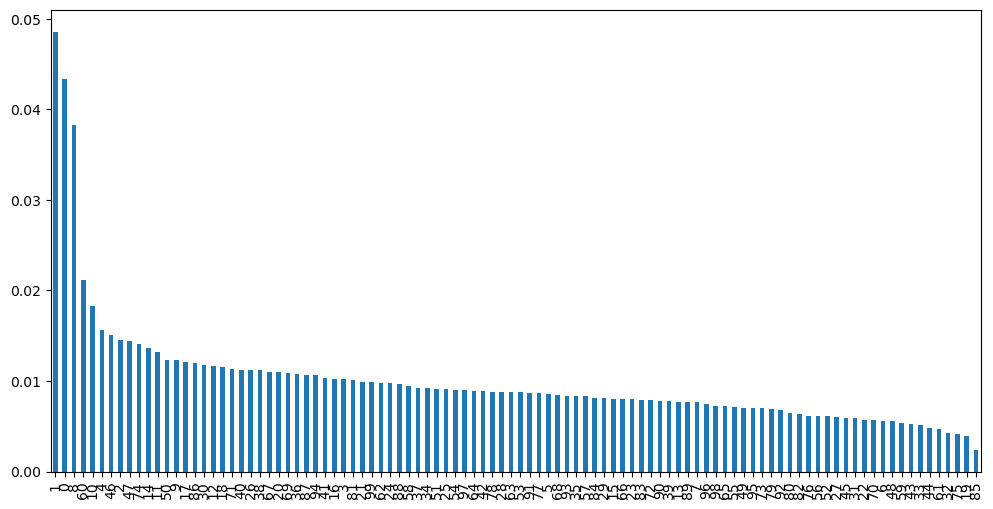

In [385]:
feature_importances_dt = pd.Series(classifier_full.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_importances_dt.plot(kind='bar', figsize=(12, 6))

In [ ]:
tp = matrix[1][1]
tn = matrix[0][0]
fp = matrix[0][1]
fn = matrix[1][0]

precision = tp/(tp+fp)
recall = tp/(tp+fn)
F1Score = 2*precision*recall/(precision+recall)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {F1Score}")
print('AUC: {:.3} --'.format(roc_auc_score(y_test,y_pred)), end='')

Precision: 0.23024830699774265
Recall: 0.2691292875989446
F1 Score: 0.24817518248175183
AUC: 0.59 --

## Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))
print('AUC: {:.3} --'.format(roc_auc_score(y_test,y_pred)), end='')

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7380
           1       0.76      0.08      0.14       657

    accuracy                           0.92      8037
   macro avg       0.84      0.54      0.55      8037
weighted avg       0.91      0.92      0.89      8037

AUC: 0.538 --

Results with important_features for Fraudulent records:
* f1-score: 0.23
* recall: 0.76
* Precision: 0.14
* AUC: 0.67

<Axes: >

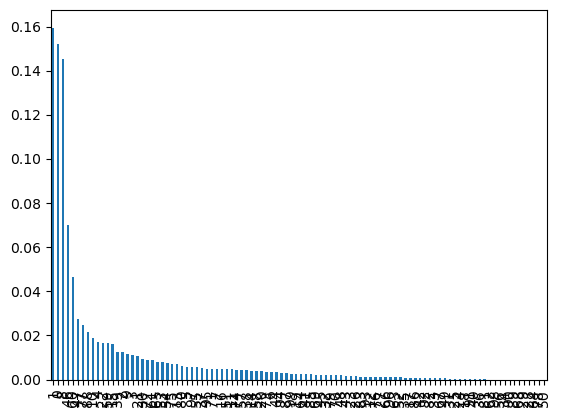

In [388]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(rf.feature_importances_, index=important_features.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar()

In [363]:
feature_importances.sort_values(ascending=False).head(20)

Value__sum_of_reoccurring_values                                     0.087673
Value__sum_of_reoccurring_data_points                                0.069558
Value__percentage_of_reoccurring_values_to_all_values                0.068350
Value__percentage_of_reoccurring_datapoints_to_all_datapoints        0.054959
Value__value_count__value_1                                          0.044054
Value__range_count__max_1__min_-1                                    0.043568
Value__maximum                                                       0.042577
Value__ratio_value_number_to_time_series_length                      0.032116
Value__absolute_maximum                                              0.028256
Value__fft_aggregated__aggtype_"centroid"                            0.024247
Value__mean_n_absolute_max__number_of_maxima_7                       0.022961
Value__change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.2    0.019693
Value__change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.

#### Hypertunning

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definir la cuadrícula de parámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'class_weight': [None,'balanced', 'balanced_subsample']
}

rf = RandomForestClassifier()
# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='f1')


grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Fitting 5 folds for each of 1458 candidates, totalling 7290 fits


c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
2430 fits failed out of a total of 7290.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1015 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
 

Best parameters:  {'bootstrap': True, 'class_weight': 'balanced_subsample', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score:  0.3619340075665245


Best parameters:  {'bootstrap': True, 'class_weight': 'balanced_subsample', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score:  0.3619340075665245

In [13]:
rf = RandomForestClassifier(bootstrap=False, max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=5, n_estimators=200)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, min_samples_split=5, n_estimators=200)

In [14]:
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))
print('AUC: {:.3} --'.format(roc_auc_score(y_test,y_pred)), end='')

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      7380
           1       0.81      0.10      0.17       657

    accuracy                           0.92      8037
   macro avg       0.87      0.55      0.57      8037
weighted avg       0.92      0.92      0.90      8037

AUC: 0.548 --

## XGBoost

In [162]:
# !pip install xgboost

In [168]:
from xgboost import XGBClassifier

model_xgb_full = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=5, reg_alpha=0, reg_lambda=0, subsample=0.8, random_state=42)

# Fit the model on the training data
model_xgb_full.fit(X_train, y_train)

y_pred = model_xgb_full.predict(X_test)

In [169]:
print(classification_report(y_test, y_pred))
print('AUC: {:.3} --'.format(roc_auc_score(y_test,y_pred)), end='')

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7380
           1       0.67      0.17      0.27       657

    accuracy                           0.93      8037
   macro avg       0.80      0.58      0.62      8037
weighted avg       0.91      0.93      0.90      8037

AUC: 0.582 --

### Tunning Hyperparameters

In [12]:
normal_instances = (y_train == 0).sum()
fraudulent_instances = (y_train == 1).sum()
scale_pos_weight = normal_instances / fraudulent_instances
normal_instances, fraudulent_instances, scale_pos_weight

(29520, 2628, 11.232876712328768)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 400, 500],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'scale_pos_weight': [1, scale_pos_weight, scale_pos_weight * 0.5, scale_pos_weight * 2]
}

# Initialize the XGBoost classifier
xgb = XGBClassifier(eval_metric='logloss')

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

In [1232]:
# Get the best hyperparameters
best_params = grid_search.best_params_

# Train a new XGBoost model using the best hyperparameters
best_xgb = XGBClassifier(**best_params)
best_xgb.fit(X_full_train, y_train)

y_pred = best_xgb.predict(X_full_test)

print(classification_report(y_test, y_pred))
print('AUC: {:.3} --'.format(roc_auc_score(y_test,y_pred)), end='')

# Evaluate the model on the validation set
# val_accuracy = best_xgb.score(X_full_test, y_test)

# print("Best hyperparameters:", best_params)
# print("Validation accuracy:", val_accuracy)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7380
           1       0.67      0.18      0.28       657

    accuracy                           0.93      8037
   macro avg       0.80      0.59      0.62      8037
weighted avg       0.91      0.93      0.91      8037

AUC: 0.585 --

     precision    recall  f1-score   support

           0       0.93      0.99      0.96      7380
           1       0.67      0.18      0.28       657

    accuracy                           0.93      8037
   macro avg       0.80      0.59      0.62      8037
weighted avg       0.91      0.93      0.91      8037

AUC: 0.585 --

In [1233]:
best_params

{'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 300,
 'reg_alpha': 0,
 'reg_lambda': 0,
 'subsample': 0.8}

{'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 300,
 'reg_alpha': 0,
 'reg_lambda': 0,
 'subsample': 0.8}

## Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(random_state=42, class_weight='balanced')
lg.fit(X_train, y_train)

y_pred = lg.predict(X_test)

c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
print(classification_report(y_test, y_pred))
print('AUC: {:.3} --'.format(roc_auc_score(y_test,y_pred)), end='')

              precision    recall  f1-score   support

           0       0.96      0.66      0.78      7380
           1       0.16      0.71      0.26       657

    accuracy                           0.66      8037
   macro avg       0.56      0.68      0.52      8037
weighted avg       0.90      0.66      0.74      8037

AUC: 0.683 --

The LogisticRegression trainned with important_features obtained the followin results for the fraudulent class
* F1: 0.26
* Recall: 0.71
* Precision 0.16
* AUC 0.69

### Tunning Hyperparameters

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Definir la cuadrícula de parámetros
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [100,200,300],
    'solver': ['lbfgs', 'liblinear','newton-cg','newton-cholesky'],
    'class_weight': [None,'balanced']
}

lr = LogisticRegression()
# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='f1')


grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1050 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\sklearn\linear_mode

Best parameters:  {'C': 100, 'class_weight': 'balanced', 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score:  0.29957213577060726


c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [7]:
from sklearn.linear_model import LogisticRegression

lg_ = LogisticRegression(random_state=42, C= 100, class_weight='balanced', max_iter= 200, penalty='l1', solver= 'liblinear')
lg_.fit(X_train, y_train)

y_pred = lg_.predict(X_test)

print(classification_report(y_test, y_pred))
print('AUC: {:.3} --'.format(roc_auc_score(y_test,y_pred)), end='')

              precision    recall  f1-score   support

           0       0.96      0.74      0.84      7380
           1       0.19      0.68      0.30       657

    accuracy                           0.74      8037
   macro avg       0.58      0.71      0.57      8037
weighted avg       0.90      0.74      0.79      8037

AUC: 0.712 --

c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## SVM

In [83]:
from sklearn import svm

svm_clf = svm.SVC(random_state=42)
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

In [86]:
print(classification_report(y_test, y_pred))
print('AUC: {:.3} --'.format(roc_auc_score(y_test,y_pred)), end='')

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7380
           1       1.00      0.01      0.01       657

    accuracy                           0.92      8037
   macro avg       0.96      0.50      0.48      8037
weighted avg       0.93      0.92      0.88      8037

AUC: 0.503 --

In [402]:
from sklearn.svm import LinearSVC

lsvc_clf = LinearSVC()
lsvc_clf.fit(X_train, y_train)

y_pred = lsvc_clf.predict(X_test)

In [403]:
print(classification_report(y_test, y_pred))
print('AUC: {:.3} --'.format(roc_auc_score(y_test,y_pred)), end='')

              precision    recall  f1-score   support

           0       0.91      1.00      0.96      7347
           1       1.00      0.00      0.01       690

    accuracy                           0.91      8037
   macro avg       0.96      0.50      0.48      8037
weighted avg       0.92      0.91      0.87      8037

AUC: 0.501 --

## MLP

In [12]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(5, 2), batch_size=100, random_state=1)
mlp_clf.fit(X_full_train, y_train)

MLPClassifier(alpha=1e-05, batch_size=100, hidden_layer_sizes=(5, 2),
              random_state=1)

In [13]:
y_pred = mlp_clf.predict(X_full_test)

print(classification_report(y_test, y_pred))
print('AUC: {:.3} --'.format(roc_auc_score(y_test,y_pred)), end='')

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7380
           1       0.54      0.10      0.17       657

    accuracy                           0.92      8037
   macro avg       0.73      0.55      0.57      8037
weighted avg       0.89      0.92      0.89      8037

AUC: 0.548 --

## Ensemble I

In [399]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, roc_auc_score
from xgboost import XGBClassifier

# Initialize the base models
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', max_depth=3)
lr = LogisticRegression(random_state=42, class_weight='balanced')
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, max_depth=5)

# Create the ensemble using VotingClassifier
ensemble = VotingClassifier(
    estimators=[('rf', rf), ('lr', lr), ('xgb', xgb)],
    voting='soft'  # 'soft' for probability-based voting, 'hard' for majority voting
)

# Train the ensemble
ensemble.fit(X_train, y_train)

# Make predictions
y_pred = ensemble.predict(X_test)

# Calculate F1 score for the minority class
minority_class = 1  # Adjust this based on your specific problem
f1 = f1_score(y_test, y_pred, pos_label=minority_class)

print(f"F1 score for minority class: {f1}")

# Print full classification report
print(classification_report(y_test, y_pred))
print('AUC: {:.3} --'.format(roc_auc_score(y_test,y_pred)), end='')

F1 score for minority class: 0.19187358916478556
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7347
           1       0.43      0.12      0.19       690

    accuracy                           0.91      8037
   macro avg       0.68      0.55      0.57      8037
weighted avg       0.88      0.91      0.89      8037

AUC: 0.554 --

## Ensemble II

In [85]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, roc_auc_score
from xgboost import XGBClassifier

# Initialize the base models
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', max_depth=3)
lr = LogisticRegression(random_state=42, class_weight='balanced')
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, max_depth=5)

# Create the ensemble using VotingClassifier
ensemble = VotingClassifier(
    estimators=[('rf', rf), ('lr', lr), ('xgb', xgb)],
    voting='soft'  # 'soft' for probability-based voting, 'hard' for majority voting
)

# Train the ensemble
ensemble.fit(X_train, y_train)

# Make predictions
y_pred = ensemble.predict(X_test)

# Calculate F1 score for the minority class
minority_class = 1  # Adjust this based on your specific problem
f1 = f1_score(y_test, y_pred, pos_label=minority_class)

print(f"F1 score for minority class: {f1}")

# Print full classification report
print(classification_report(y_test, y_pred))
print('AUC: {:.3} --'.format(roc_auc_score(y_test,y_pred)), end='')

## Keras model

In [29]:
!pip install pydot

In [99]:
import keras
import numpy as np
import matplotlib.pyplot as plt

def make_model(input_shape, num_classes):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=x_train.shape[1:], num_classes=2)
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [91]:
epochs = 50
batch_size = 100

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.keras", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",# sparse_categorical_crossentropy
    # metrics=["accuracy"], # sparse_categorical_accuracy
    metrics=["accuracy", keras.metrics.AUC(), keras.metrics.Recall(), keras.metrics.F1Score()]
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,    
)

Epoch 1/100
258/258 ━━━━━━━━━━━━━━━━━━━━ 47s 161ms/step - loss: 0.3111 - sparse_categorical_accuracy: 0.9065 - val_loss: 0.5174 - val_sparse_categorical_accuracy: 0.8373 - learning_rate: 0.0010
Epoch 2/100
258/258 ━━━━━━━━━━━━━━━━━━━━ 40s 156ms/step - loss: 0.2759 - sparse_categorical_accuracy: 0.9179 - val_loss: 0.4069 - val_sparse_categorical_accuracy: 0.9110 - learning_rate: 0.0010
Epoch 3/100
258/258 ━━━━━━━━━━━━━━━━━━━━ 40s 154ms/step - loss: 0.2706 - sparse_categorical_accuracy: 0.9194 - val_loss: 0.2821 - val_sparse_categorical_accuracy: 0.9142 - learning_rate: 0.0010
Epoch 4/100
258/258 ━━━━━━━━━━━━━━━━━━━━ 40s 155ms/step - loss: 0.2714 - sparse_categorical_accuracy: 0.9190 - val_loss: 0.2921 - val_sparse_categorical_accuracy: 0.9142 - learning_rate: 0.0010
Epoch 5/100
258/258 ━━━━━━━━━━━━━━━━━━━━ 40s 154ms/step - loss: 0.2670 - sparse_categorical_accuracy: 0.9210 - val_loss: 0.2863 - val_sparse_categorical_accuracy: 0.9142 - learning_rate: 0.0010
Epoch 6/100
258/258 ━━━━━━━━━━

In [94]:
model = keras.models.load_model("best_model.keras")

test_loss, test_acc = model.evaluate(X_full_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.2476 - sparse_categorical_accuracy: 0.9224
Test accuracy 0.9187507629394531
Test loss 0.25502708554267883


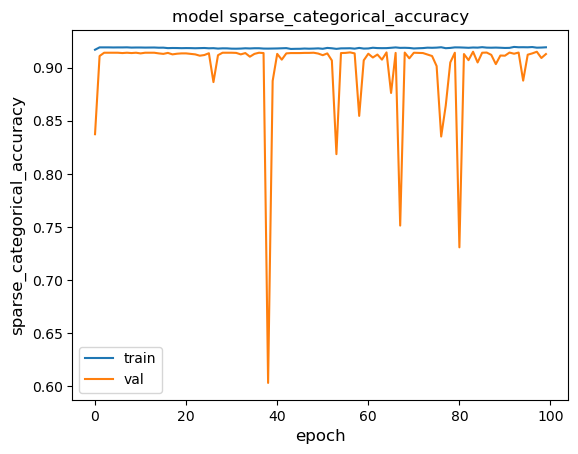

In [95]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

In [96]:
y_pred = model.predict(X_full_test)

252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


In [97]:
y_pred = np.argmax(y_pred, axis=1)
y_pred
# y_pred = np.where(y_pred == 0, 0, 1)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [98]:
print(classification_report(y_test, y_pred))
print('AUC: {:.3} --'.format(roc_auc_score(y_test,y_pred)), end='')

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7380
           1       0.54      0.04      0.07       657

    accuracy                           0.92      8037
   macro avg       0.73      0.52      0.51      8037
weighted avg       0.89      0.92      0.89      8037

AUC: 0.518 --

## LSTM

In [1236]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Flatten, Dense
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC, Recall
from sklearn.metrics import f1_score, recall_score, roc_auc_score

# Define input shape
input_shape = (1029, 1)  # (time steps, features)

# Lists to store the metrics for each fold
f1_scores = []
recall_scores = []
auc_scores = []
models = []
model_history = []
k_folds = 5

# Set up the KFold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


for i in range(5):
    model = Sequential([
            LSTM(64, return_sequences=True, input_shape=input_shape),
            Dropout(0.2),
            LSTM(32, return_sequences=False),
            Dropout(0.2),
            Flatten(),
            Dense(256, activation='relu'),
            Dropout(0.2),
            Dense(1, activation='softmax')
        ])
    
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=[AUC(name='auc'), Recall(name='recall')])
    
    models.append(model)
    


for i, (train_index, test_index) in enumerate(skf.split(df_red_processed, label_red)):
    print(f'Fold {i+1} / {k_folds}')

    # Split the data into training and validation sets for this fold
    X_train, X_val = df_red_processed.to_numpy()[train_index], df_red_processed.to_numpy()[test_index]
    y_train, y_val = label_red[train_index], label_red[test_index]

    history = model.fit(X_train, y_train, 
              epochs=50, 
              batch_size=100, 
              validation_data=(X_val, y_val),
              shuffle=True,
              verbose=1)
    
    y_val_pred = model.predict(X_val)
    y_val_pred_classes = np.argmax(y_val_pred, axis=1)

    f1 = f1_score(y_val, y_val_pred_classes, average='binary')
    recall = recall_score(y_val, y_val_pred_classes, pos_label=1)  # assuming '1' is the minority class label
    auc = roc_auc_score(y_val, y_val_pred_classes)

    print(f'F1 Score: {f1} - Recall: {recall} - AUC: {auc}')
    f1_scores.append(f1)
    recall_scores.append(recall)
    auc_scores.append(auc)
    model_history.append(history)
    print("-------------------")

# Calculate and print the average metrics across all folds
avg_f1 = np.mean(f1_scores)
avg_recall = np.mean(recall_scores)
avg_auc = np.mean(auc_scores)

print(f'Average F1 Score across 5 folds: {avg_f1}')
print(f'Average Recall (Minority Class) across 5 folds: {avg_recall}')
print(f'Average AUC across 5 folds: {avg_auc}')

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Print model summary
# model.summary()

# # Train the model
# history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=1)

# # Evaluate the model
# test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
# print(f"Test accuracy: {test_accuracy:.4f}")

c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Fold 1 / 5


C:\Users\DAIMA Researcher\AppData\Local\Temp\ipykernel_16140\3959785055.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = label_red[train_index], label_red[test_index]


Epoch 1/50


c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\keras\src\losses\losses.py:22: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


322/322 ━━━━━━━━━━━━━━━━━━━━ 810s 2s/step - auc: 0.5000 - loss: 0.0000e+00 - recall: 1.0000 - val_auc: 0.5000 - val_loss: 0.0000e+00 - val_recall: 1.0000
Epoch 2/50
322/322 ━━━━━━━━━━━━━━━━━━━━ 766s 2s/step - auc: 0.5000 - loss: 0.0000e+00 - recall: 1.0000 - val_auc: 0.5000 - val_loss: 0.0000e+00 - val_recall: 1.0000
Epoch 3/50
322/322 ━━━━━━━━━━━━━━━━━━━━ 735s 2s/step - auc: 0.5000 - loss: 0.0000e+00 - recall: 1.0000 - val_auc: 0.5000 - val_loss: 0.0000e+00 - val_recall: 1.0000
Epoch 4/50
322/322 ━━━━━━━━━━━━━━━━━━━━ 711s 2s/step - auc: 0.5000 - loss: 0.0000e+00 - recall: 1.0000 - val_auc: 0.5000 - val_loss: 0.0000e+00 - val_recall: 1.0000
Epoch 5/50
322/322 ━━━━━━━━━━━━━━━━━━━━ 662s 2s/step - auc: 0.5000 - loss: 0.0000e+00 - recall: 1.0000 - val_auc: 0.5000 - val_loss: 0.0000e+00 - val_recall: 1.0000
Epoch 6/50
322/322 ━━━━━━━━━━━━━━━━━━━━ 698s 2s/step - auc: 0.5000 - loss: 0.0000e+00 - recall: 1.0000 - val_auc: 0.5000 - val_loss: 0.0000e+00 - val_recall: 1.0000
Epoch 7/50
322/322 ━━

KeyboardInterrupt: 

## Logistic Regression, RF, Gradient Boosting

In [1096]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

# Define the models you want to test
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Create a pipeline and evaluate each model using cross-validation
for name, model in models.items():
    pipeline = Pipeline([
        ('model', model)
    ])
    
    scores = cross_val_score(pipeline, X_full_train, y_train, cv=5, scoring='roc_auc')
    print(f"{name} ROC-AUC: {scores.mean():.2f} (+/- {scores.std():.2f})")

# Train the best model on the full training set and make predictions on the test set
best_model = GradientBoostingClassifier()  # Or the model with the highest ROC-AUC score
best_pipeline = Pipeline([
    ('model', best_model)
])
best_pipeline.fit(X_full_train, y_train)
y_pred = best_pipeline.predict(X_full_test)

c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

Logistic Regression ROC-AUC: 0.75 (+/- 0.01)
Random Forest ROC-AUC: 0.77 (+/- 0.01)
Gradient Boosting ROC-AUC: 0.80 (+/- 0.01)


In [1097]:
print(classification_report(y_test, y_pred))
print('AUC: {:.3} --'.format(roc_auc_score(y_test,y_pred)), end='')

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7380
           1       0.66      0.13      0.21       657

    accuracy                           0.92      8037
   macro avg       0.79      0.56      0.59      8037
weighted avg       0.91      0.92      0.90      8037

AUC: 0.56 --

## MLP, RNN, LSTM

In [1104]:
from sklearn.metrics import make_scorer, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from sklearn.base import BaseEstimator, ClassifierMixin

# Define custom RNN and LSTM wrappers
class RNNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, units=50, epochs=100, batch_size=32):
        self.units = units
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = None

    def fit(self, X, y):
        self.model = Sequential([
            SimpleRNN(self.units, input_shape=(X.shape[1], 1)),
            Dense(1, activation='sigmoid')
        ])
        self.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        self.model.fit(X.reshape(X.shape[0], X.shape[1], 1), y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self

    def predict(self, X):
        return (self.model.predict(X.reshape(X.shape[0], X.shape[1], 1)) > 0.5).astype(int).flatten()

class LSTMClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, units=50, epochs=100, batch_size=32):
        self.units = units
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = None

    def fit(self, X, y):
        self.model = Sequential([
            LSTM(self.units, input_shape=(X.shape[1], 1)),
            Dense(1, activation='sigmoid')
        ])
        self.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        self.model.fit(X.reshape(X.shape[0], X.shape[1], 1), y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self

    def predict(self, X):
        return (self.model.predict(X.reshape(X.shape[0], X.shape[1], 1)) > 0.5).astype(int).flatten()


# Define the models you want to test
models = {
    # 'Logistic Regression': LogisticRegression(class_weight='balanced'),
    # 'Random Forest': RandomForestClassifier(class_weight='balanced'),
    # 'Gradient Boosting': GradientBoostingClassifier(),
    'MLP': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000),
    'RNN': RNNClassifier(),
    'LSTM': LSTMClassifier()
}

# Define custom scorers
recall_scorer = make_scorer(recall_score, pos_label=1)  # 1 is the fraudulent class
f1_scorer = make_scorer(f1_score, pos_label=1)

# Create a pipeline and evaluate each model using cross-validation
for name, model in models.items():
    pipeline = Pipeline([
        ('model', model)
    ])
    
    recall_scores = cross_val_score(pipeline, X_full_train.to_numpy(), y_train, cv=5, scoring=recall_scorer)
    f1_scores = cross_val_score(pipeline, X_full_train.to_numpy(), y_train, cv=5, scoring=f1_scorer)
    
    print(f"{name}:")
    print(f"  Recall: {recall_scores.mean():.2f} (+/- {recall_scores.std():.2f})")
    print(f"  F1-score: {f1_scores.mean():.2f} (+/- {f1_scores.std():.2f})")

# Train the best model on the full training set and make predictions on the test set
# best_model = RandomForestClassifier(class_weight='balanced')  # Or the model with the highest F1-score
# best_pipeline = Pipeline([
#     ('model', best_model)
# ])
# best_pipeline.fit(X_full_train, y_train)
# y_pred = best_pipeline.predict(X_full_test)

# # Evaluate on the test set
# test_recall = recall_score(y_test, y_pred, pos_label=1)
# test_f1 = f1_score(y_test, y_pred, pos_label=1)
# print(f"Test set - Recall: {test_recall:.2f}, F1-score: {test_f1:.2f}")

MLP:
  Recall: 0.14 (+/- 0.07)
  F1-score: 0.25 (+/- 0.08)


c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


201/201 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step


c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


201/201 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step


c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


201/201 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step


c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
RNN:
  Recall: 0.00 (+/- 0.00)
  F1-score: 0.00 (+/- 0.00)


c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


KeyboardInterrupt: 

The results with logistic and random forest "balanced"
* Logistic Regression:
  Recall: 0.71 (+/- 0.01)
  F1-score: 0.25 (+/- 0.00)
  
* Random Forest:
  Recall: 0.04 (+/- 0.00)
  F1-score: 0.09 (+/- 0.01)

* MLP:
  Recall: 0.14 (+/- 0.07)
  F1-score: 0.25 (+/- 0.08)

* RNN:
  Recall: 0.00 (+/- 0.00)
  F1-score: 0.00 (+/- 0.00)

## PCA

In [3]:
from sklearn.decomposition import KernelPCA

In [4]:
# Apply KPCA
n_components = 100  # You can adjust this number
kpca = KernelPCA(n_components=n_components, kernel='rbf', fit_inverse_transform=True)  # 'rbf' is often a good default kernel
X_kpca = kpca.fit_transform(df_red_processed)

print(f"Shape after KPCA: {X_kpca.shape}")

Shape after KPCA: (40185, 100)


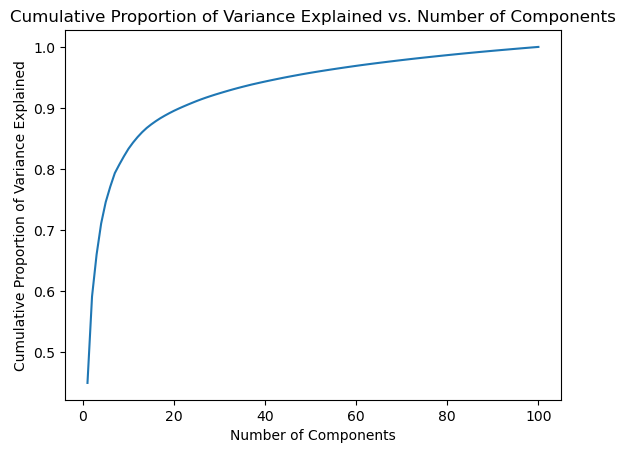

Number of components explaining 95% of variance: 45


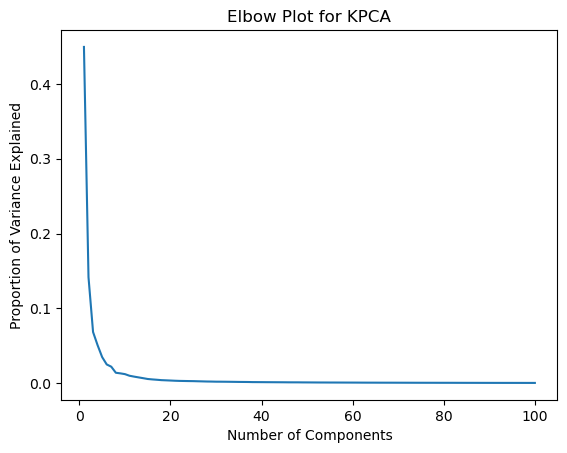

In [78]:
# Calculate the "explained variance" using the eigenvalues
eigenvalues = kpca.eigenvalues_
explained_variance_ratio = eigenvalues / eigenvalues.sum()

# Plot cumulative "explained variance" ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.plot(range(1, n_components + 1), cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.title('Cumulative Proportion of Variance Explained vs. Number of Components')
plt.show()

# Find the number of components that explain 95% of the variance
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"Number of components explaining 95% of variance: {n_components_95}")

# Elbow plot
plt.plot(range(1, n_components + 1), explained_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Proportion of Variance Explained')
plt.title('Elbow Plot for KPCA')
plt.show()

In [81]:
# Find the number of components that explain 95% of the variance
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.99) + 1
print(f"Number of components explaining 95% of variance: {n_components_95}")

Number of components explaining 95% of variance: 85


In [ ]:
# Plot cumulative explained variance ratio
plt.plot(component_range, np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.show()

# Find the number of components that explain 95% of the variance
n_components_95 = np.argmax(np.cumsum(explained_variance_ratio) >= 0.95) + 1
print(f"Number of components explaining 95% of variance: {n_components_95}")

In [380]:
X_train, X_test, y_train, y_test = train_test_split(X_kpca, label_red.values, test_size=0.2, random_state=42)

# SKTIME Trainings

Format for SKTime Algorithms:
* numpy3D = 3D np.ndarray with index (instance, variable, time)

In [3]:
# !pip install sktime

## Split

In [3]:
import numpy as np

df_red_processed_reshaped = np.reshape(df_red_processed.values, (40185, 1, 1029))
df_red_processed_reshaped.shape

(40185, 1, 1029)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                                df_red_processed_reshaped,
                                                label_red.values,
                                                test_size=.2,
                                                random_state=42,
                                                stratify= label_red.values,
                                                shuffle=True)

## Time Series Forest Classifier

In [5]:
X_train.shape

(32148, 1, 1029)

In [6]:
from sktime.classification.interval_based import TimeSeriesForestClassifier
clf = TimeSeriesForestClassifier(n_estimators=100, min_interval=7, random_state=42)
clf.fit(X_train, y_train)

KeyboardInterrupt: 

In [113]:
y_pred = clf.predict(X_test)

matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print('AUC: {:.3} --'.format(roc_auc_score(y_test,y_pred)), end='')

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7380
           1       0.81      0.07      0.12       657

    accuracy                           0.92      8037
   macro avg       0.87      0.53      0.54      8037
weighted avg       0.91      0.92      0.89      8037

AUC: 0.533 --

In [115]:
clf.feature_importances_

mean       std     slope
0     0.000011  0.000013  0.000008
1     0.000021  0.000021  0.000017
2     0.000033  0.000033  0.000027
3     0.000042  0.000039  0.000031
4     0.000063  0.000057  0.000058
...        ...       ...       ...
1024  0.000149  0.000218  0.000260
1025  0.000112  0.000158  0.000191
1026  0.000082  0.000115  0.000142
1027  0.000014  0.000017  0.000019
1028  0.000000  0.000000  0.000000

[1029 rows x 3 columns]

## HIVE-COTE

In [7]:
from sktime.classification.hybrid._hivecote_v2 import HIVECOTEV2

classifier = HIVECOTEV2(verbose=1, random_state=42)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print('AUC: {:.3} --'.format(roc_auc_score(y_test,y_pred)), end='')

## KNeighbors TS

In [23]:
# step 3 - specify the classifier
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier

# example 1 - 3-NN with simple dynamic time warping distance (requires numba)
clf = KNeighborsTimeSeriesClassifier(n_neighbors=3)

# example 2 - custom distance:
# 3-nearest neighbour classifier with Euclidean distance (on flattened time series)
# (requires scipy)
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
from sktime.dists_kernels import FlatDist, ScipyDist

eucl_dist = FlatDist(ScipyDist())
clf = KNeighborsTimeSeriesClassifier(n_neighbors=3, distance=eucl_dist)

In [24]:
# step 4 - fit/train the classifier
clf.fit(X_train, y_train)

KNeighborsTimeSeriesClassifier(distance=FlatDist(transformer=ScipyDist()),
                               n_neighbors=3)

In [25]:
# the classifier is now fitted
clf.is_fitted

True

In [26]:
y_pred = clf.predict(X_test)

matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print('AUC: {:.3} --'.format(roc_auc_score(y_test,y_pred)), end='')

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7380
           1       0.32      0.17      0.22       657

    accuracy                           0.90      8037
   macro avg       0.63      0.57      0.58      8037
weighted avg       0.88      0.90      0.89      8037

AUC: 0.568 --

## LSTMFCNClassifier

In [30]:
from sktime.classification.deep_learning import LSTMFCNClassifier

In [31]:
lstmfcn = LSTMFCNClassifier(n_epochs=20,batch_size=100, verbose=1, random_state=42, dropout=0.5)

In [32]:
X_train.shape

(32148, 7, 147)

In [33]:
# step 4 - fit/train the classifier
lstmfcn.fit(X_train, y_train)

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 147, 7)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_6 (Conv1D)   │ (None, 147, 128)  │      7,296 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 128)  │        512 │ conv1d_6[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_6        │ (None, 147, 128)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_7 (Conv1D)   │ (None, 147, 256)  │    164,096 │ activation_6[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 256)  │      1,024 │ conv1d_7[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_7        │ (None, 147, 256)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_8 (Conv1D)   │ (None, 147, 128)  │     98,432 │ activation_7[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ permute_2 (Permute) │ (None, 7, 147)    │          0 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 128)  │        512 │ conv1d_8[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 8)         │      4,992 │ permute_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_8        │ (None, 147, 128)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 8)         │          0 │ lstm_2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ activation_8[0][… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 136)       │          0 │ dropout_2[0][0],  │
│ (Concatenate)       │                   │            │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 2)         │        274 │ concatenate_2[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 277,138 (1.06 MB)

 Trainable params: 276,114 (1.05 MB)

 Non-trainable params: 1,024 (4.00 KB)

Epoch 1/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 55s 157ms/step - accuracy: 0.8536 - loss: 0.3595
Epoch 2/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 90s 278ms/step - accuracy: 0.9192 - loss: 0.2619
Epoch 3/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 88s 272ms/step - accuracy: 0.9199 - loss: 0.2580
Epoch 4/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 42s 131ms/step - accuracy: 0.9205 - loss: 0.2542
Epoch 5/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.9210 - loss: 0.2508
Epoch 6/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.9215 - loss: 0.2478
Epoch 7/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.9226 - loss: 0.2451
Epoch 8/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.9225 - loss: 0.2425
Epoch 9/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.9238 - loss: 0.2399
Epoch 10/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.9241 - loss: 0.2379
Epoch 11/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.9253 - loss: 0.2358
Epoch 12/20
322/322 ━━━━━━

LSTMFCNClassifier(batch_size=100, dropout=0.5, n_epochs=20, random_state=42,
                  verbose=1)

In [34]:
lstmfcn.is_fitted

True

In [35]:
y_pred = lstmfcn.predict(X_test)

matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print('AUC: {:.3} --'.format(roc_auc_score(y_test,y_pred)), end='')

81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7380
           1       0.65      0.11      0.19       657

    accuracy                           0.92      8037
   macro avg       0.79      0.55      0.57      8037
weighted avg       0.90      0.92      0.90      8037

AUC: 0.551 --

## MLP

In [1269]:
from sktime.classification.deep_learning.mlp import MLPClassifier
mlp = MLPClassifier(n_epochs=100,batch_size=100)
mlp.fit(X_train, y_train)
mlp.is_fitted

True

In [1270]:
y_pred = mlp.predict(X_test)

matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print('AUC: {:.3} --'.format(roc_auc_score(y_test,y_pred)), end='')

81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7380
           1       0.00      0.00      0.00       657

    accuracy                           0.92      8037
   macro avg       0.46      0.50      0.48      8037
weighted avg       0.84      0.92      0.88      8037

AUC: 0.5 --

c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\DAIMA Researcher\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## CNN

In [1272]:
from sktime.classification.deep_learning.cnn import CNNClassifier

cnn = CNNClassifier(n_epochs=100,batch_size=100)
cnn.fit(X_train, y_train)
cnn.is_fitted

True

In [1273]:
y_pred = cnn.predict(X_test)

matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print('AUC: {:.3} --'.format(roc_auc_score(y_test,y_pred)), end='')

81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7380
           1       0.47      0.11      0.17       657

    accuracy                           0.92      8037
   macro avg       0.70      0.55      0.56      8037
weighted avg       0.89      0.92      0.89      8037

AUC: 0.547 --

## RocketClassifier

In [1276]:
from sktime.classification.kernel_based import RocketClassifier

clf_rc = RocketClassifier(num_kernels=500, random_state=42)
clf_rc.fit(X_train, y_train)
clf_rc.is_fitted

True

In [1277]:
y_pred = clf_rc.predict(X_test)

matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print('AUC: {:.3} --'.format(roc_auc_score(y_test,y_pred)), end='')

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7380
           1       1.00      0.00      0.00       657

    accuracy                           0.92      8037
   macro avg       0.96      0.50      0.48      8037
weighted avg       0.93      0.92      0.88      8037

AUC: 0.501 --

## ShapeletTransformClassifier

In [1278]:
from sktime.classification.shapelet_based import ShapeletTransformClassifier
from sktime.classification.sklearn import RotationForest
clf = ShapeletTransformClassifier(
    estimator=RotationForest(n_estimators=3),
    n_shapelet_samples=100,
    # max_shapelets=10,
    batch_size=100,
) 
clf.fit(X_train, y_train) 

In [ ]:
y_pred = clf.predict(X_test)

matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print('AUC: {:.3} --'.format(roc_auc_score(y_test,y_pred)), end='')

## Baseline

In [18]:
from sktime.transformations.panel.segment import IntervalSegmenter
from sktime.transformations.panel.tsfresh import TSFreshFeatureExtractor
from sktime.transformations.panel.pca import PCATransformer
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sktime.classification.kernel_based import RocketClassifier
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
from sktime.transformations.panel.tsfresh import TSFreshFeatureExtractor
from sktime.classification.deep_learning import InceptionTimeClassifier
# from sktime.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Assuming X is your 40185 x 1029 array and y is your labels
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('transformer', 'passthrough'),
    ('classifier', 'passthrough')
])

# Define the parameter grid
param_grid = {
    'transformer': [
        TSFreshFeatureExtractor(default_fc_parameters="minimal"),
        IntervalSegmenter(),
        'passthrough'  # Option to skip transformation
    ],
    'classifier': [
        TimeSeriesForestClassifier(n_estimators=100),
        RocketClassifier(num_kernels=2000),
        KNeighborsTimeSeriesClassifier(n_neighbors=1)
    ]
}

# Create the grid search object
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    n_jobs=-1,
    scoring='f1',  # You can change this to other metrics like 'accuracy', 'precision', 'recall'
    verbose=1
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test set score:", test_score)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


* First try: f1score: 0.15  -  Best model: Transformer: None, Model: TimeSeriesForestClassifier

In [10]:
y_pred = best_model.predict(X_test)

matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print('AUC: {:.3} --'.format(roc_auc_score(y_test,y_pred)), end='')

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7380
           1       0.84      0.08      0.15       657

    accuracy                           0.92      8037
   macro avg       0.88      0.54      0.55      8037
weighted avg       0.92      0.92      0.89      8037

AUC: 0.54 --

In [15]:
from sktime.datasets import load_airline
y = load_airline()
print(y.shape)
y

(144,)


Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Freq: M, Name: Number of airline passengers, Length: 144, dtype: float64

In [16]:
from sktime.transformations.series.detrend import Detrender
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.datasets import load_airline
y = load_airline()
transformer = Detrender(forecaster=PolynomialTrendForecaster(degree=1))
y_hat = transformer.fit_transform(y)
y_hat

Period
1949-01     21.690038
1949-02     25.032854
1949-03     36.375670
1949-04     30.718487
1949-05     20.061303
              ...    
1960-08    146.341475
1960-09     45.684291
1960-10     -3.972893
1960-11    -77.630077
1960-12    -38.287261
Freq: M, Name: Number of airline passengers, Length: 144, dtype: float64

# Data augmentation

In [44]:
#Testing the same strategy as the article
from collections import Counter
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_aug, y_train_aug = sm.fit_resample(X_train, y_train)

In [45]:
print('Resampled dataset shape %s' % Counter(y_train_aug))

Resampled dataset shape Counter({0: 29520, 1: 29520})


In [46]:
save_file(X_train_aug, 'datasets/sgcc_processed','X_train_aug')
save_file(y_train_aug, 'datasets/sgcc_processed','y_train_aug')
save_file(X_test, 'datasets/sgcc_processed','X_test')
save_file(y_test, 'datasets/sgcc_processed','y_test')

Data saved to datasets/sgcc_processed\X_train_aug.pkl
Data saved to datasets/sgcc_processed\y_train_aug.pkl
Data saved to datasets/sgcc_processed\X_test.pkl
Data saved to datasets/sgcc_processed\y_test.pkl


# Feature engineering

In [218]:
def transform_to_weekly(data):
    # Assuming data is a DataFrame with customers as rows and days (timestamps) as columns
    num_days = data.shape[1]
    num_weeks = num_days // 7
    
    # Reshape data into (num_customers, num_weeks, 7 days per week)
    weekly_data = []
    for i in range(data.shape[0]):
        customer_weekly_data = data.iloc[i, :num_weeks * 7].values.reshape(num_weeks, 7)
        weekly_data.append(customer_weekly_data)
        
    return np.array(weekly_data)

weekly_data = transform_to_weekly(X_train_aug)

In [220]:
weekly_data.shape

(61284, 147, 7)

In [ ]:
# Reshape for model input
weekly_data = weekly_data.reshape(-1, 7, 1)  # Shape: (num_windows, 7 days, 1 feature)

In [256]:
def reshape_data(X, y):
    X_array = X.values
    y_array = y.values
    
    num_samples = X_array.shape[0]
    print(num_samples)

    full_x = X_array.reshape(num_samples * 147, 7)
    full_y = np.repeat(y_array, 147)

    full_x_df = pd.DataFrame(full_x)
    full_y_df = pd.DataFrame(full_y, columns=['target'])
    
    return full_x_df, full_y_df

X_train_weeks, y_train_weeks = reshape_data(X_train, )
X_test_weeks, y_test_weeks = reshape_data(X_test, y_test)

62524
15631


In [268]:
# To convert the single-column dataframe into a one-dimensional array
y_train_weeks = y_train_weeks.squeeze()
y_test_weeks = y_test_weeks.squeeze()

## Checking values per week

In [269]:
print(X_train_weeks.shape)
print(y_train_weeks.shape)

(9191028, 7)
(9191028,)


In [251]:
user_idx = 32523
week_number = user_idx*147 #week are 0 to 146
print(f'week_number {week_number}')

week_number 4780881


In [252]:
X_train_weeks.iloc[week_number]

0    0.000000
1    0.000000
2    0.000000
3    0.000000
4    0.001896
5    0.000000
6    0.000000
Name: 4780881, dtype: float64

In [253]:
# X_train.iloc[0, (week_number*7):(week_number*7)+7]
week_n = 0
if(week_number > 0):
    week_n =  int(week_number / 146) -1
print(f"week_n {week_n}")
X_train.iloc[user_idx, 0:7]

week_n 32744


2014-01-06 00:00:00    0.000000
2014-01-07 00:00:00    0.000000
2014-01-08 00:00:00    0.000000
2014-01-09 00:00:00    0.000000
2014-01-10 00:00:00    0.001896
2014-01-11 00:00:00    0.000000
2014-01-12 00:00:00    0.000000
Name: 31190, dtype: float64

In [254]:
print(f"y in full_y_train: {y_train_weeks.iloc[week_number]}")
print(f"y in original_data: {y_train.iloc[user_idx]}")

y in full_y_train: target    0
Name: 4780881, dtype: int64
y in original_data: 0


# Save datasets as numpy arrays

In [205]:
path_data = 'datasets/sgcc_byweek/'
filename = 'sgcc_training.npy'
np.save(path_data+filename, X_train_weeks.to_numpy())

In [201]:
def plot_data(ax, df, column='Value'):
  if column is None:
    ax.plot(df)
  else:
    ax.plot(df[column])
  ax.xaxis.set_tick_params(rotation=45)
  ax.set_xlabel('Time')
  ax.set_ylabel('Energy (kWh)')
  ax.grid()

def calculate_daily_consumption(df, column='Value'):
  return df.groupby([df.index.date])[column].sum()

def plot_daily_consumption(ax, df):
  # Divide by 4 to convert 15 Wmin to 1 Wh
  ax.plot(df)
  ax.xaxis.set_tick_params(rotation=45)
  ax.set_xlabel('Day')
  ax.set_ylabel('Energy (kWh)')
  ax.set_title('Total daily consumption')
  ax.grid()

def calculate_mean_profile_weekday(df, column='Value'):
    # Ensure the index is a DatetimeIndex
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)
    # Group by the day of the year -> dayofyear
    # Weekday -> weekday
    mean_profile = df.groupby(df.index.weekday)[column].mean()
    # Create a new index based on day of the year
    mean_profile.index = mean_profile.index.map(lambda day: dt.datetime(year=1970, month=1, day=1) + dt.timedelta(days=day-1))
    return mean_profile

def calculate_mean_profile_day_year(df, column='Value'):
    # Ensure the index is a DatetimeIndex
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)
    # Group by the day of the year -> dayofyear
    # Weekday -> weekday
    mean_profile = df.groupby(df.index.dayofyear)[column].mean()
    # Create a new index based on day of the year
    mean_profile.index = mean_profile.index.map(lambda day: dt.datetime(year=1970, month=1, day=1) + dt.timedelta(days=day-1))
    return mean_profile

# def calculate_mean_profile(df, column='Value'):
#   mean_profile = df.groupby([df.index])[column].mean()
#   mean_profile.index = mean_profile.index.map(lambda t: dt.datetime.combine(dt.datetime(year=1970, month=1, day=1), t.time()))
#   return mean_profile

def plot_mean_profile(ax, mean_profile, title='Mean consumption profile'):
  ax.plot(mean_profile)
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%j'))
  ax.set_xlabel('Day')
  ax.set_ylabel('Energy (kWh)')
  ax.set_title(title)
  ax.grid()

In [202]:
df_raw_t = df_raw.T
df_raw_flag = df_raw.FLAG
df_raw_t.drop(['FLAG'], inplace=True)
df_raw_t

CONS_NO     0387DD8A07E07FDA6271170F86AD9151  \
2014-01-06                               NaN   
2014-01-07                               NaN   
2014-01-08                               NaN   
2014-01-09                               NaN   
2014-01-10                               NaN   
...                                      ...   
2016-10-27                              8.75   
2016-10-28                              9.30   
2016-10-29                              7.54   
2016-10-30                              9.16   
2016-10-31                              6.74   

CONS_NO     01D6177B5D4FFE0CABA9EF17DAFC2B84  \
2014-01-06                               NaN   
2014-01-07                               NaN   
2014-01-08                               NaN   
2014-01-09                               NaN   
2014-01-10                               NaN   
...                                      ...   
2016-10-27                               0.0   
2016-10-28                               0.0   
2016-10-29                               0.0   
2016-10-30                               0.0   
2016-10-31                               0.0   

CONS_NO     4B75AC4F2D8434CFF62DB64D0BB43103  \
2014-01-06                               NaN   
2014-01-07                               NaN   
2014-01-08                               NaN   
2014-01-09                               NaN   
2014-01-10                               NaN   
...                                      ...   
2016-10-27                             19.09   
2016-10-28                             18.56   
2016-10-29                             16.25   
2016-10-30                             14.20   
2016-10-31                             13.66   

CONS_NO     B32AC8CC6D5D805AC053557AB05F5343  \
2014-01-06                               NaN   
2014-01-07                               NaN   
2014-01-08                               NaN   
2014-01-09                               NaN   
2014-01-10                               NaN   
...                                      ...   
2016-10-27                             20.79   
2016-10-28                             17.95   
2016-10-29                             19.26   
2016-10-30                             14.46   
2016-10-31                             11.72   

CONS_NO     EDFC78B07BA2908B3395C4EB2304665E  \
2014-01-06                              5.35   
2014-01-07                              4.73   
2014-01-08                              3.68   
2014-01-09                              3.53   
2014-01-10                              3.42   
...                                      ...   
2016-10-27                              6.73   
2016-10-28                              7.52   
2016-10-29                             10.89   
2016-10-30                              9.86   
2016-10-31                              8.72   

CONS_NO     6BCFD78138BC72A9BA1BFB0B79382192  \
2014-01-06                               NaN   
2014-01-07                               NaN   
2014-01-08                               NaN   
2014-01-09                               NaN   
2014-01-10                               NaN   
...                                      ...   
2016-10-27                              0.42   
2016-10-28                              1.91   
2016-10-29                              0.42   
2016-10-30                              0.38   
2016-10-31                              0.61   

CONS_NO     34C1954AA3703C4F8BD8EAEA7C4B7B83  \
2014-01-06                              0.20   
2014-01-07                              0.14   
2014-01-08                              0.34   
2014-01-09                              0.23   
2014-01-10                              0.53   
...                                      ...   
2016-10-27                              1.18   
2016-10-28                              1.13   
2016-10-29                              1.34   
2016-10-30                              1.26   
2016-10-31

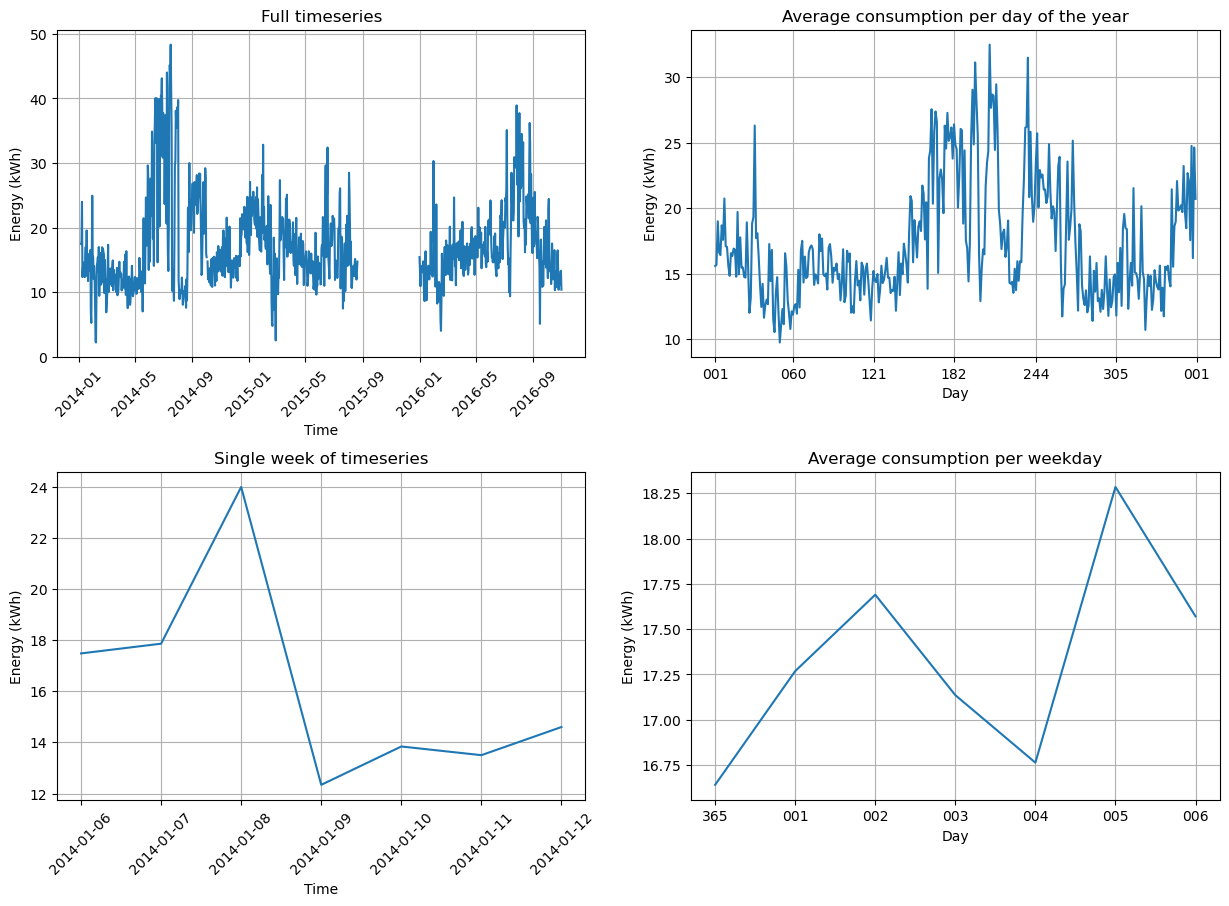

In [203]:
# define a figure with two columns and two rows
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.35)

id_sample = 'D9A6ADA018FA46A55D5438370456AA45'

# plot first graph
plot_data(ax[0, 0], df_raw_t, column=id_sample)
ax[0, 0].set_title('Full timeseries')

# plot the second graph
plot_mean_profile(ax[0, 1], calculate_mean_profile_day_year(df_raw_t, column=id_sample), title="Average consumption per day of the year")
# plot_daily_consumption(ax[0, 1], calculate_daily_consumption(df))

# plot the third graph
plot_data(ax[1, 0], df_raw_t.iloc[:7, :], column=id_sample)
ax[1, 0].set_title('Single week of timeseries')
# ax[1, 0].xaxis.set_major_formatter(mdates.DateFormatter("%a %d.%b."))
# ax[1, 0].xaxis.set_major_locator(mdates.AutoDateLocator())

# plot the fourth graph
plot_mean_profile(ax[1, 1], calculate_mean_profile_weekday(df_raw_t, column=id_sample), title="Average consumption per weekday")

In [204]:
df.groupby('FLAG')['CONS_NO'].count()

KeyError: 'FLAG'

# Alternatives

In [122]:
"""## Quantile transform"""
quantile = quantile_transform(df_red_processed.values, n_quantiles=10, random_state=0, copy=True, output_distribution='uniform')
df__ = pd.DataFrame(data=quantile, columns=df_red_processed.columns, index=df_red_processed.index)
df__['flags'] = label_red

df__

2014-01-06 00:00:00  2014-01-07 00:00:00  \
CONS_NO                                                                      
0387DD8A07E07FDA6271170F86AD9151             0.000000             0.000000   
01D6177B5D4FFE0CABA9EF17DAFC2B84             0.000000             0.000000   
B32AC8CC6D5D805AC053557AB05F5343             0.000000             0.000000   
EDFC78B07BA2908B3395C4EB2304665E             0.748669             0.735209   
34C1954AA3703C4F8BD8EAEA7C4B7B83             0.513889             0.522222   
...                                               ...                  ...   
F1472871E1AFF49D4289564B6377D76C             0.000000             0.000000   
F3C8BBCD2DC26C1E0249DEEF6A4256B7             0.764998             0.675325   
A9A0FE83467A680FBFB0DBFC910DF227             0.598856             0.584706   
D9A6ADA018FA46A55D5438370456AA45             0.889071             0.889006   
F3406636BAD1E6E0826E8EDDC9A1BF00             0.000000             0.000000   

                                  2014-01-08 00:00:00  2014-01-09 00:00:00  \
CONS_NO                                                                      
0387DD8A07E07FDA6271170F86AD9151             0.000000             0.000000   
01D6177B5D4FFE0CABA9EF17DAFC2B84             0.000000             0.000000   
B32AC8CC6D5D805AC053557AB05F5343             0.000000             0.000000   
EDFC78B07BA2908B3395C4EB2304665E             0.692891             0.690746   
34C1954AA3703C4F8BD8EAEA7C4B7B83             0.558049             0.561233   
...                                               ...                  ...   
F1472871E1AFF49D4289564B6377D76C             0.000000             0.000000   
F3C8BBCD2DC26C1E0249DEEF6A4256B7             0.705882             0.764706   
A9A0FE83467A680FBFB0DBFC910DF227             0.573012             0.601784   
D9A6ADA018FA46A55D5438370456AA45             0.889316             0.888932   
F3406636BAD1E6E0826E8EDDC9A1BF00             0.000000             0.000000   

                                  2014-01-10 00:00:00  2014-01-11 00:00:00  \
CONS_NO                                                                      
0387DD8A07E07FDA6271170F86AD9151             0.000000             0.000000   
01D6177B5D4FFE0CABA9EF17DAFC2B84             0.000000             0.000000   
B32AC8CC6D5D805AC053557AB05F5343             0.000000             0.000000   
EDFC78B07BA2908B3395C4EB2304665E             0.695549             0.706799   
34C1954AA3703C4F8BD8EAEA7C4B7B83             0.578470             0.574786   
...                                               ...                  ...   
F1472871E1AFF49D4289564B6377D76C             0.000000             0.000000   
F3C8BBCD2DC26C1E0249DEEF6A4256B7             0.728508             0.711443   
A9A0FE83467A680FBFB0DBFC910DF227             0.591872             0.624359   
D9A6ADA018FA46A55D5438370456AA45             0.888979             0.888962   
F3406636BAD1E6E0826E8EDDC9A1BF00             0.000000             0.000000   

                                  2014-01-12 00:00:00  2014-01-13 00:00:00  \
CONS_NO                                                                      
0387DD8A07E07FDA6271170F86AD9151             0.000000             0.000000   
01D6177B5D4FFE0CABA9EF17DAFC2B84             0.000000             0.000000   
B32AC8CC6D5D805AC053557AB05F5343             0.000000             0.000000   
EDFC78B07BA2908B3395C4EB2304665E             0.717142             0.681322   
34C1954AA3703C4F8BD8EAEA7C4B7B83             0.566982             0.594841   
...                                               ...                  ...   
F1472871E1AFF49D4289564B6377D76C             0.000000             0.000000   
F3C8BBCD2DC26C1E0249DEEF6A4256B7             0.000000             0.000000   
A9A0FE83467A680FBFB0DBFC910DF227             0.582348             0.566270   
D9A6ADA018FA46A55D5438370456AA45             0.888999             0.888893   
F3406636BAD1E6E0826E8EDDC9A1BF00             0.000000

In [123]:
save_file(df__, 'datasets/sgcc_processed_quantile', 'data')

Data saved to datasets/sgcc_processed_quantile\data.pkl
